In [6]:
import os
import time
import tensorflow as tf
import numpy as np
import glob
import datetime
import random
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
%matplotlib inline
import argparse
from ast import literal_eval

from keras.models import Sequential, Model, load_model
from keras.layers import UpSampling2D, Conv2D, Activation, BatchNormalization, Reshape, Dense, Input, LeakyReLU, Dropout, Flatten, ZeroPadding2D
from keras.optimizers import Adam    
from scipy.misc import imsave


Using TensorFlow backend.


In [14]:
upsample_layers = 5
starting_filters = 64
kernel_size = 5
channels = 3
discriminator_path = 'C:\\image_generator-master\\Descriminator_Weights'
generator_path = 'C:\\image_generator-master\\Generator_Weights'
output_directory = 'C:\\image_generator-master\\Output'
image_path = 'C:\\image_generator-master\\resized_64_64'
resized_image_path = 'C:\\image_generator-master\\resized_64_64'
img_size =(64, 64)

In [3]:
def resize_imgs(image_path):
    image_list = glob.glob(os.path.join(image_path, '*.png'))
    for i in range (0,len(image_list)-1):
        print(i, image_list[i])
        img = Image.open(image_list[i])
        img = ImageOps.fit(img, (img_size[0], img_size[1]), Image.ANTIALIAS)
        name = image_list[i].split("\\")[-1].split('.')[0]
        if not os.path.exists(f"resized_{img_size[0]}_{img_size[1]}"):
            os.makedirs(f"resized_{img_size[0]}_{img_size[1]}")
        img.save(f"resized_{img_size[0]}_{img_size[1]}/{name}.png")

In [41]:
resize_imgs(img_path)

0 C:\image_generator-master\simpsons-faces\cropped\1.png
1 C:\image_generator-master\simpsons-faces\cropped\10.png
2 C:\image_generator-master\simpsons-faces\cropped\100.png
3 C:\image_generator-master\simpsons-faces\cropped\1000.png
4 C:\image_generator-master\simpsons-faces\cropped\1001.png
5 C:\image_generator-master\simpsons-faces\cropped\1002.png
6 C:\image_generator-master\simpsons-faces\cropped\1003.png
7 C:\image_generator-master\simpsons-faces\cropped\1004.png
8 C:\image_generator-master\simpsons-faces\cropped\1005.png
9 C:\image_generator-master\simpsons-faces\cropped\1006.png
10 C:\image_generator-master\simpsons-faces\cropped\1007.png
11 C:\image_generator-master\simpsons-faces\cropped\1008.png
12 C:\image_generator-master\simpsons-faces\cropped\1009.png
13 C:\image_generator-master\simpsons-faces\cropped\101.png
14 C:\image_generator-master\simpsons-faces\cropped\1010.png
15 C:\image_generator-master\simpsons-faces\cropped\1011.png
16 C:\image_generator-master\simpsons-fac

142 C:\image_generator-master\simpsons-faces\cropped\1126.png
143 C:\image_generator-master\simpsons-faces\cropped\1127.png
144 C:\image_generator-master\simpsons-faces\cropped\1128.png
145 C:\image_generator-master\simpsons-faces\cropped\1129.png
146 C:\image_generator-master\simpsons-faces\cropped\113.png
147 C:\image_generator-master\simpsons-faces\cropped\1130.png
148 C:\image_generator-master\simpsons-faces\cropped\1131.png
149 C:\image_generator-master\simpsons-faces\cropped\1132.png
150 C:\image_generator-master\simpsons-faces\cropped\1133.png
151 C:\image_generator-master\simpsons-faces\cropped\1134.png
152 C:\image_generator-master\simpsons-faces\cropped\1135.png
153 C:\image_generator-master\simpsons-faces\cropped\1136.png
154 C:\image_generator-master\simpsons-faces\cropped\1137.png
155 C:\image_generator-master\simpsons-faces\cropped\1138.png
156 C:\image_generator-master\simpsons-faces\cropped\1139.png
157 C:\image_generator-master\simpsons-faces\cropped\114.png
158 C:\ima

292 C:\image_generator-master\simpsons-faces\cropped\1261.png
293 C:\image_generator-master\simpsons-faces\cropped\1262.png
294 C:\image_generator-master\simpsons-faces\cropped\1263.png
295 C:\image_generator-master\simpsons-faces\cropped\1264.png
296 C:\image_generator-master\simpsons-faces\cropped\1265.png
297 C:\image_generator-master\simpsons-faces\cropped\1266.png
298 C:\image_generator-master\simpsons-faces\cropped\1267.png
299 C:\image_generator-master\simpsons-faces\cropped\1268.png
300 C:\image_generator-master\simpsons-faces\cropped\1269.png
301 C:\image_generator-master\simpsons-faces\cropped\127.png
302 C:\image_generator-master\simpsons-faces\cropped\1270.png
303 C:\image_generator-master\simpsons-faces\cropped\1271.png
304 C:\image_generator-master\simpsons-faces\cropped\1272.png
305 C:\image_generator-master\simpsons-faces\cropped\1273.png
306 C:\image_generator-master\simpsons-faces\cropped\1274.png
307 C:\image_generator-master\simpsons-faces\cropped\1275.png
308 C:\im

427 C:\image_generator-master\simpsons-faces\cropped\1383.png
428 C:\image_generator-master\simpsons-faces\cropped\1384.png
429 C:\image_generator-master\simpsons-faces\cropped\1385.png
430 C:\image_generator-master\simpsons-faces\cropped\1386.png
431 C:\image_generator-master\simpsons-faces\cropped\1387.png
432 C:\image_generator-master\simpsons-faces\cropped\1388.png
433 C:\image_generator-master\simpsons-faces\cropped\1389.png
434 C:\image_generator-master\simpsons-faces\cropped\139.png
435 C:\image_generator-master\simpsons-faces\cropped\1390.png
436 C:\image_generator-master\simpsons-faces\cropped\1391.png
437 C:\image_generator-master\simpsons-faces\cropped\1392.png
438 C:\image_generator-master\simpsons-faces\cropped\1393.png
439 C:\image_generator-master\simpsons-faces\cropped\1394.png
440 C:\image_generator-master\simpsons-faces\cropped\1395.png
441 C:\image_generator-master\simpsons-faces\cropped\1396.png
442 C:\image_generator-master\simpsons-faces\cropped\1397.png
443 C:\im

578 C:\image_generator-master\simpsons-faces\cropped\1519.png
579 C:\image_generator-master\simpsons-faces\cropped\152.png
580 C:\image_generator-master\simpsons-faces\cropped\1520.png
581 C:\image_generator-master\simpsons-faces\cropped\1521.png
582 C:\image_generator-master\simpsons-faces\cropped\1522.png
583 C:\image_generator-master\simpsons-faces\cropped\1523.png
584 C:\image_generator-master\simpsons-faces\cropped\1524.png
585 C:\image_generator-master\simpsons-faces\cropped\1525.png
586 C:\image_generator-master\simpsons-faces\cropped\1526.png
587 C:\image_generator-master\simpsons-faces\cropped\1527.png
588 C:\image_generator-master\simpsons-faces\cropped\1528.png
589 C:\image_generator-master\simpsons-faces\cropped\1529.png
590 C:\image_generator-master\simpsons-faces\cropped\153.png
591 C:\image_generator-master\simpsons-faces\cropped\1530.png
592 C:\image_generator-master\simpsons-faces\cropped\1531.png
593 C:\image_generator-master\simpsons-faces\cropped\1532.png
594 C:\ima

714 C:\image_generator-master\simpsons-faces\cropped\1641.png
715 C:\image_generator-master\simpsons-faces\cropped\1642.png
716 C:\image_generator-master\simpsons-faces\cropped\1643.png
717 C:\image_generator-master\simpsons-faces\cropped\1644.png
718 C:\image_generator-master\simpsons-faces\cropped\1645.png
719 C:\image_generator-master\simpsons-faces\cropped\1646.png
720 C:\image_generator-master\simpsons-faces\cropped\1647.png
721 C:\image_generator-master\simpsons-faces\cropped\1648.png
722 C:\image_generator-master\simpsons-faces\cropped\1649.png
723 C:\image_generator-master\simpsons-faces\cropped\165.png
724 C:\image_generator-master\simpsons-faces\cropped\1650.png
725 C:\image_generator-master\simpsons-faces\cropped\1651.png
726 C:\image_generator-master\simpsons-faces\cropped\1652.png
727 C:\image_generator-master\simpsons-faces\cropped\1653.png
728 C:\image_generator-master\simpsons-faces\cropped\1654.png
729 C:\image_generator-master\simpsons-faces\cropped\1655.png
730 C:\im

849 C:\image_generator-master\simpsons-faces\cropped\1763.png
850 C:\image_generator-master\simpsons-faces\cropped\1764.png
851 C:\image_generator-master\simpsons-faces\cropped\1765.png
852 C:\image_generator-master\simpsons-faces\cropped\1766.png
853 C:\image_generator-master\simpsons-faces\cropped\1767.png
854 C:\image_generator-master\simpsons-faces\cropped\1768.png
855 C:\image_generator-master\simpsons-faces\cropped\1769.png
856 C:\image_generator-master\simpsons-faces\cropped\177.png
857 C:\image_generator-master\simpsons-faces\cropped\1770.png
858 C:\image_generator-master\simpsons-faces\cropped\1771.png
859 C:\image_generator-master\simpsons-faces\cropped\1772.png
860 C:\image_generator-master\simpsons-faces\cropped\1773.png
861 C:\image_generator-master\simpsons-faces\cropped\1774.png
862 C:\image_generator-master\simpsons-faces\cropped\1775.png
863 C:\image_generator-master\simpsons-faces\cropped\1776.png
864 C:\image_generator-master\simpsons-faces\cropped\1777.png
865 C:\im

986 C:\image_generator-master\simpsons-faces\cropped\1887.png
987 C:\image_generator-master\simpsons-faces\cropped\1888.png
988 C:\image_generator-master\simpsons-faces\cropped\1889.png
989 C:\image_generator-master\simpsons-faces\cropped\189.png
990 C:\image_generator-master\simpsons-faces\cropped\1890.png
991 C:\image_generator-master\simpsons-faces\cropped\1891.png
992 C:\image_generator-master\simpsons-faces\cropped\1892.png
993 C:\image_generator-master\simpsons-faces\cropped\1893.png
994 C:\image_generator-master\simpsons-faces\cropped\1894.png
995 C:\image_generator-master\simpsons-faces\cropped\1895.png
996 C:\image_generator-master\simpsons-faces\cropped\1896.png
997 C:\image_generator-master\simpsons-faces\cropped\1897.png
998 C:\image_generator-master\simpsons-faces\cropped\1898.png
999 C:\image_generator-master\simpsons-faces\cropped\1899.png
1000 C:\image_generator-master\simpsons-faces\cropped\19.png
1001 C:\image_generator-master\simpsons-faces\cropped\190.png
1002 C:\im

1119 C:\image_generator-master\simpsons-faces\cropped\2005.png
1120 C:\image_generator-master\simpsons-faces\cropped\2006.png
1121 C:\image_generator-master\simpsons-faces\cropped\2007.png
1122 C:\image_generator-master\simpsons-faces\cropped\2008.png
1123 C:\image_generator-master\simpsons-faces\cropped\2009.png
1124 C:\image_generator-master\simpsons-faces\cropped\201.png
1125 C:\image_generator-master\simpsons-faces\cropped\2010.png
1126 C:\image_generator-master\simpsons-faces\cropped\2011.png
1127 C:\image_generator-master\simpsons-faces\cropped\2012.png
1128 C:\image_generator-master\simpsons-faces\cropped\2013.png
1129 C:\image_generator-master\simpsons-faces\cropped\2014.png
1130 C:\image_generator-master\simpsons-faces\cropped\2015.png
1131 C:\image_generator-master\simpsons-faces\cropped\2016.png
1132 C:\image_generator-master\simpsons-faces\cropped\2017.png
1133 C:\image_generator-master\simpsons-faces\cropped\2018.png
1134 C:\image_generator-master\simpsons-faces\cropped\20

1260 C:\image_generator-master\simpsons-faces\cropped\2132.png
1261 C:\image_generator-master\simpsons-faces\cropped\2133.png
1262 C:\image_generator-master\simpsons-faces\cropped\2134.png
1263 C:\image_generator-master\simpsons-faces\cropped\2135.png
1264 C:\image_generator-master\simpsons-faces\cropped\2136.png
1265 C:\image_generator-master\simpsons-faces\cropped\2137.png
1266 C:\image_generator-master\simpsons-faces\cropped\2138.png
1267 C:\image_generator-master\simpsons-faces\cropped\2139.png
1268 C:\image_generator-master\simpsons-faces\cropped\214.png
1269 C:\image_generator-master\simpsons-faces\cropped\2140.png
1270 C:\image_generator-master\simpsons-faces\cropped\2141.png
1271 C:\image_generator-master\simpsons-faces\cropped\2142.png
1272 C:\image_generator-master\simpsons-faces\cropped\2143.png
1273 C:\image_generator-master\simpsons-faces\cropped\2144.png
1274 C:\image_generator-master\simpsons-faces\cropped\2145.png
1275 C:\image_generator-master\simpsons-faces\cropped\21

1405 C:\image_generator-master\simpsons-faces\cropped\2263.png
1406 C:\image_generator-master\simpsons-faces\cropped\2264.png
1407 C:\image_generator-master\simpsons-faces\cropped\2265.png
1408 C:\image_generator-master\simpsons-faces\cropped\2266.png
1409 C:\image_generator-master\simpsons-faces\cropped\2267.png
1410 C:\image_generator-master\simpsons-faces\cropped\2268.png
1411 C:\image_generator-master\simpsons-faces\cropped\2269.png
1412 C:\image_generator-master\simpsons-faces\cropped\227.png
1413 C:\image_generator-master\simpsons-faces\cropped\2270.png
1414 C:\image_generator-master\simpsons-faces\cropped\2271.png
1415 C:\image_generator-master\simpsons-faces\cropped\2272.png
1416 C:\image_generator-master\simpsons-faces\cropped\2273.png
1417 C:\image_generator-master\simpsons-faces\cropped\2274.png
1418 C:\image_generator-master\simpsons-faces\cropped\2275.png
1419 C:\image_generator-master\simpsons-faces\cropped\2276.png
1420 C:\image_generator-master\simpsons-faces\cropped\22

1553 C:\image_generator-master\simpsons-faces\cropped\2397.png
1554 C:\image_generator-master\simpsons-faces\cropped\2398.png
1555 C:\image_generator-master\simpsons-faces\cropped\2399.png
1556 C:\image_generator-master\simpsons-faces\cropped\24.png
1557 C:\image_generator-master\simpsons-faces\cropped\240.png
1558 C:\image_generator-master\simpsons-faces\cropped\2400.png
1559 C:\image_generator-master\simpsons-faces\cropped\2401.png
1560 C:\image_generator-master\simpsons-faces\cropped\2402.png
1561 C:\image_generator-master\simpsons-faces\cropped\2403.png
1562 C:\image_generator-master\simpsons-faces\cropped\2404.png
1563 C:\image_generator-master\simpsons-faces\cropped\2405.png
1564 C:\image_generator-master\simpsons-faces\cropped\2406.png
1565 C:\image_generator-master\simpsons-faces\cropped\2407.png
1566 C:\image_generator-master\simpsons-faces\cropped\2408.png
1567 C:\image_generator-master\simpsons-faces\cropped\2409.png
1568 C:\image_generator-master\simpsons-faces\cropped\241.

1702 C:\image_generator-master\simpsons-faces\cropped\2530.png
1703 C:\image_generator-master\simpsons-faces\cropped\2531.png
1704 C:\image_generator-master\simpsons-faces\cropped\2532.png
1705 C:\image_generator-master\simpsons-faces\cropped\2533.png
1706 C:\image_generator-master\simpsons-faces\cropped\2534.png
1707 C:\image_generator-master\simpsons-faces\cropped\2535.png
1708 C:\image_generator-master\simpsons-faces\cropped\2536.png
1709 C:\image_generator-master\simpsons-faces\cropped\2537.png
1710 C:\image_generator-master\simpsons-faces\cropped\2538.png
1711 C:\image_generator-master\simpsons-faces\cropped\2539.png
1712 C:\image_generator-master\simpsons-faces\cropped\254.png
1713 C:\image_generator-master\simpsons-faces\cropped\2540.png
1714 C:\image_generator-master\simpsons-faces\cropped\2541.png
1715 C:\image_generator-master\simpsons-faces\cropped\2542.png
1716 C:\image_generator-master\simpsons-faces\cropped\2543.png
1717 C:\image_generator-master\simpsons-faces\cropped\25

1837 C:\image_generator-master\simpsons-faces\cropped\2652.png
1838 C:\image_generator-master\simpsons-faces\cropped\2653.png
1839 C:\image_generator-master\simpsons-faces\cropped\2654.png
1840 C:\image_generator-master\simpsons-faces\cropped\2655.png
1841 C:\image_generator-master\simpsons-faces\cropped\2656.png
1842 C:\image_generator-master\simpsons-faces\cropped\2657.png
1843 C:\image_generator-master\simpsons-faces\cropped\2658.png
1844 C:\image_generator-master\simpsons-faces\cropped\2659.png
1845 C:\image_generator-master\simpsons-faces\cropped\266.png
1846 C:\image_generator-master\simpsons-faces\cropped\2660.png
1847 C:\image_generator-master\simpsons-faces\cropped\2661.png
1848 C:\image_generator-master\simpsons-faces\cropped\2662.png
1849 C:\image_generator-master\simpsons-faces\cropped\2663.png
1850 C:\image_generator-master\simpsons-faces\cropped\2664.png
1851 C:\image_generator-master\simpsons-faces\cropped\2665.png
1852 C:\image_generator-master\simpsons-faces\cropped\26

1989 C:\image_generator-master\simpsons-faces\cropped\279.png
1990 C:\image_generator-master\simpsons-faces\cropped\2790.png
1991 C:\image_generator-master\simpsons-faces\cropped\2791.png
1992 C:\image_generator-master\simpsons-faces\cropped\2792.png
1993 C:\image_generator-master\simpsons-faces\cropped\2793.png
1994 C:\image_generator-master\simpsons-faces\cropped\2794.png
1995 C:\image_generator-master\simpsons-faces\cropped\2795.png
1996 C:\image_generator-master\simpsons-faces\cropped\2796.png
1997 C:\image_generator-master\simpsons-faces\cropped\2797.png
1998 C:\image_generator-master\simpsons-faces\cropped\2798.png
1999 C:\image_generator-master\simpsons-faces\cropped\2799.png
2000 C:\image_generator-master\simpsons-faces\cropped\28.png
2001 C:\image_generator-master\simpsons-faces\cropped\280.png
2002 C:\image_generator-master\simpsons-faces\cropped\2800.png
2003 C:\image_generator-master\simpsons-faces\cropped\2801.png
2004 C:\image_generator-master\simpsons-faces\cropped\2802.

2124 C:\image_generator-master\simpsons-faces\cropped\2910.png
2125 C:\image_generator-master\simpsons-faces\cropped\2911.png
2126 C:\image_generator-master\simpsons-faces\cropped\2912.png
2127 C:\image_generator-master\simpsons-faces\cropped\2913.png
2128 C:\image_generator-master\simpsons-faces\cropped\2914.png
2129 C:\image_generator-master\simpsons-faces\cropped\2915.png
2130 C:\image_generator-master\simpsons-faces\cropped\2916.png
2131 C:\image_generator-master\simpsons-faces\cropped\2917.png
2132 C:\image_generator-master\simpsons-faces\cropped\2918.png
2133 C:\image_generator-master\simpsons-faces\cropped\2919.png
2134 C:\image_generator-master\simpsons-faces\cropped\292.png
2135 C:\image_generator-master\simpsons-faces\cropped\2920.png
2136 C:\image_generator-master\simpsons-faces\cropped\2921.png
2137 C:\image_generator-master\simpsons-faces\cropped\2922.png
2138 C:\image_generator-master\simpsons-faces\cropped\2923.png
2139 C:\image_generator-master\simpsons-faces\cropped\29

2262 C:\image_generator-master\simpsons-faces\cropped\3034.png
2263 C:\image_generator-master\simpsons-faces\cropped\3035.png
2264 C:\image_generator-master\simpsons-faces\cropped\3036.png
2265 C:\image_generator-master\simpsons-faces\cropped\3037.png
2266 C:\image_generator-master\simpsons-faces\cropped\3038.png
2267 C:\image_generator-master\simpsons-faces\cropped\3039.png
2268 C:\image_generator-master\simpsons-faces\cropped\304.png
2269 C:\image_generator-master\simpsons-faces\cropped\3040.png
2270 C:\image_generator-master\simpsons-faces\cropped\3041.png
2271 C:\image_generator-master\simpsons-faces\cropped\3042.png
2272 C:\image_generator-master\simpsons-faces\cropped\3043.png
2273 C:\image_generator-master\simpsons-faces\cropped\3044.png
2274 C:\image_generator-master\simpsons-faces\cropped\3045.png
2275 C:\image_generator-master\simpsons-faces\cropped\3046.png
2276 C:\image_generator-master\simpsons-faces\cropped\3047.png
2277 C:\image_generator-master\simpsons-faces\cropped\30

2409 C:\image_generator-master\simpsons-faces\cropped\3167.png
2410 C:\image_generator-master\simpsons-faces\cropped\3168.png
2411 C:\image_generator-master\simpsons-faces\cropped\3169.png
2412 C:\image_generator-master\simpsons-faces\cropped\317.png
2413 C:\image_generator-master\simpsons-faces\cropped\3170.png
2414 C:\image_generator-master\simpsons-faces\cropped\3171.png
2415 C:\image_generator-master\simpsons-faces\cropped\3172.png
2416 C:\image_generator-master\simpsons-faces\cropped\3173.png
2417 C:\image_generator-master\simpsons-faces\cropped\3174.png
2418 C:\image_generator-master\simpsons-faces\cropped\3175.png
2419 C:\image_generator-master\simpsons-faces\cropped\3176.png
2420 C:\image_generator-master\simpsons-faces\cropped\3177.png
2421 C:\image_generator-master\simpsons-faces\cropped\3178.png
2422 C:\image_generator-master\simpsons-faces\cropped\3179.png
2423 C:\image_generator-master\simpsons-faces\cropped\318.png
2424 C:\image_generator-master\simpsons-faces\cropped\318

2552 C:\image_generator-master\simpsons-faces\cropped\3296.png
2553 C:\image_generator-master\simpsons-faces\cropped\3297.png
2554 C:\image_generator-master\simpsons-faces\cropped\3298.png
2555 C:\image_generator-master\simpsons-faces\cropped\3299.png
2556 C:\image_generator-master\simpsons-faces\cropped\33.png
2557 C:\image_generator-master\simpsons-faces\cropped\330.png
2558 C:\image_generator-master\simpsons-faces\cropped\3300.png
2559 C:\image_generator-master\simpsons-faces\cropped\3301.png
2560 C:\image_generator-master\simpsons-faces\cropped\3302.png
2561 C:\image_generator-master\simpsons-faces\cropped\3303.png
2562 C:\image_generator-master\simpsons-faces\cropped\3304.png
2563 C:\image_generator-master\simpsons-faces\cropped\3305.png
2564 C:\image_generator-master\simpsons-faces\cropped\3306.png
2565 C:\image_generator-master\simpsons-faces\cropped\3307.png
2566 C:\image_generator-master\simpsons-faces\cropped\3308.png
2567 C:\image_generator-master\simpsons-faces\cropped\3309

2689 C:\image_generator-master\simpsons-faces\cropped\3419.png
2690 C:\image_generator-master\simpsons-faces\cropped\342.png
2691 C:\image_generator-master\simpsons-faces\cropped\3420.png
2692 C:\image_generator-master\simpsons-faces\cropped\3421.png
2693 C:\image_generator-master\simpsons-faces\cropped\3422.png
2694 C:\image_generator-master\simpsons-faces\cropped\3423.png
2695 C:\image_generator-master\simpsons-faces\cropped\3424.png
2696 C:\image_generator-master\simpsons-faces\cropped\3425.png
2697 C:\image_generator-master\simpsons-faces\cropped\3426.png
2698 C:\image_generator-master\simpsons-faces\cropped\3427.png
2699 C:\image_generator-master\simpsons-faces\cropped\3428.png
2700 C:\image_generator-master\simpsons-faces\cropped\3429.png
2701 C:\image_generator-master\simpsons-faces\cropped\343.png
2702 C:\image_generator-master\simpsons-faces\cropped\3430.png
2703 C:\image_generator-master\simpsons-faces\cropped\3431.png
2704 C:\image_generator-master\simpsons-faces\cropped\343

2829 C:\image_generator-master\simpsons-faces\cropped\3545.png
2830 C:\image_generator-master\simpsons-faces\cropped\3546.png
2831 C:\image_generator-master\simpsons-faces\cropped\3547.png
2832 C:\image_generator-master\simpsons-faces\cropped\3548.png
2833 C:\image_generator-master\simpsons-faces\cropped\3549.png
2834 C:\image_generator-master\simpsons-faces\cropped\355.png
2835 C:\image_generator-master\simpsons-faces\cropped\3550.png
2836 C:\image_generator-master\simpsons-faces\cropped\3551.png
2837 C:\image_generator-master\simpsons-faces\cropped\3552.png
2838 C:\image_generator-master\simpsons-faces\cropped\3553.png
2839 C:\image_generator-master\simpsons-faces\cropped\3554.png
2840 C:\image_generator-master\simpsons-faces\cropped\3555.png
2841 C:\image_generator-master\simpsons-faces\cropped\3556.png
2842 C:\image_generator-master\simpsons-faces\cropped\3557.png
2843 C:\image_generator-master\simpsons-faces\cropped\3558.png
2844 C:\image_generator-master\simpsons-faces\cropped\35

2976 C:\image_generator-master\simpsons-faces\cropped\3678.png
2977 C:\image_generator-master\simpsons-faces\cropped\3679.png
2978 C:\image_generator-master\simpsons-faces\cropped\368.png
2979 C:\image_generator-master\simpsons-faces\cropped\3680.png
2980 C:\image_generator-master\simpsons-faces\cropped\3681.png
2981 C:\image_generator-master\simpsons-faces\cropped\3682.png
2982 C:\image_generator-master\simpsons-faces\cropped\3683.png
2983 C:\image_generator-master\simpsons-faces\cropped\3684.png
2984 C:\image_generator-master\simpsons-faces\cropped\3685.png
2985 C:\image_generator-master\simpsons-faces\cropped\3686.png
2986 C:\image_generator-master\simpsons-faces\cropped\3687.png
2987 C:\image_generator-master\simpsons-faces\cropped\3688.png
2988 C:\image_generator-master\simpsons-faces\cropped\3689.png
2989 C:\image_generator-master\simpsons-faces\cropped\369.png
2990 C:\image_generator-master\simpsons-faces\cropped\3690.png
2991 C:\image_generator-master\simpsons-faces\cropped\369

3125 C:\image_generator-master\simpsons-faces\cropped\3811.png
3126 C:\image_generator-master\simpsons-faces\cropped\3812.png
3127 C:\image_generator-master\simpsons-faces\cropped\3813.png
3128 C:\image_generator-master\simpsons-faces\cropped\3814.png
3129 C:\image_generator-master\simpsons-faces\cropped\3815.png
3130 C:\image_generator-master\simpsons-faces\cropped\3816.png
3131 C:\image_generator-master\simpsons-faces\cropped\3817.png
3132 C:\image_generator-master\simpsons-faces\cropped\3818.png
3133 C:\image_generator-master\simpsons-faces\cropped\3819.png
3134 C:\image_generator-master\simpsons-faces\cropped\382.png
3135 C:\image_generator-master\simpsons-faces\cropped\3820.png
3136 C:\image_generator-master\simpsons-faces\cropped\3821.png
3137 C:\image_generator-master\simpsons-faces\cropped\3822.png
3138 C:\image_generator-master\simpsons-faces\cropped\3823.png
3139 C:\image_generator-master\simpsons-faces\cropped\3824.png
3140 C:\image_generator-master\simpsons-faces\cropped\38

3276 C:\image_generator-master\simpsons-faces\cropped\3948.png
3277 C:\image_generator-master\simpsons-faces\cropped\3949.png
3278 C:\image_generator-master\simpsons-faces\cropped\395.png
3279 C:\image_generator-master\simpsons-faces\cropped\3950.png
3280 C:\image_generator-master\simpsons-faces\cropped\3951.png
3281 C:\image_generator-master\simpsons-faces\cropped\3952.png
3282 C:\image_generator-master\simpsons-faces\cropped\3953.png
3283 C:\image_generator-master\simpsons-faces\cropped\3954.png
3284 C:\image_generator-master\simpsons-faces\cropped\3955.png
3285 C:\image_generator-master\simpsons-faces\cropped\3956.png
3286 C:\image_generator-master\simpsons-faces\cropped\3957.png
3287 C:\image_generator-master\simpsons-faces\cropped\3958.png
3288 C:\image_generator-master\simpsons-faces\cropped\3959.png
3289 C:\image_generator-master\simpsons-faces\cropped\396.png
3290 C:\image_generator-master\simpsons-faces\cropped\3960.png
3291 C:\image_generator-master\simpsons-faces\cropped\396

3418 C:\image_generator-master\simpsons-faces\cropped\4075.png
3419 C:\image_generator-master\simpsons-faces\cropped\4076.png
3420 C:\image_generator-master\simpsons-faces\cropped\4077.png
3421 C:\image_generator-master\simpsons-faces\cropped\4078.png
3422 C:\image_generator-master\simpsons-faces\cropped\4079.png
3423 C:\image_generator-master\simpsons-faces\cropped\408.png
3424 C:\image_generator-master\simpsons-faces\cropped\4080.png
3425 C:\image_generator-master\simpsons-faces\cropped\4081.png
3426 C:\image_generator-master\simpsons-faces\cropped\4082.png
3427 C:\image_generator-master\simpsons-faces\cropped\4083.png
3428 C:\image_generator-master\simpsons-faces\cropped\4084.png
3429 C:\image_generator-master\simpsons-faces\cropped\4085.png
3430 C:\image_generator-master\simpsons-faces\cropped\4086.png
3431 C:\image_generator-master\simpsons-faces\cropped\4087.png
3432 C:\image_generator-master\simpsons-faces\cropped\4088.png
3433 C:\image_generator-master\simpsons-faces\cropped\40

3557 C:\image_generator-master\simpsons-faces\cropped\420.png
3558 C:\image_generator-master\simpsons-faces\cropped\4200.png
3559 C:\image_generator-master\simpsons-faces\cropped\4201.png
3560 C:\image_generator-master\simpsons-faces\cropped\4202.png
3561 C:\image_generator-master\simpsons-faces\cropped\4203.png
3562 C:\image_generator-master\simpsons-faces\cropped\4204.png
3563 C:\image_generator-master\simpsons-faces\cropped\4205.png
3564 C:\image_generator-master\simpsons-faces\cropped\4206.png
3565 C:\image_generator-master\simpsons-faces\cropped\4207.png
3566 C:\image_generator-master\simpsons-faces\cropped\4208.png
3567 C:\image_generator-master\simpsons-faces\cropped\4209.png
3568 C:\image_generator-master\simpsons-faces\cropped\421.png
3569 C:\image_generator-master\simpsons-faces\cropped\4210.png
3570 C:\image_generator-master\simpsons-faces\cropped\4211.png
3571 C:\image_generator-master\simpsons-faces\cropped\4212.png
3572 C:\image_generator-master\simpsons-faces\cropped\421

3695 C:\image_generator-master\simpsons-faces\cropped\4324.png
3696 C:\image_generator-master\simpsons-faces\cropped\4325.png
3697 C:\image_generator-master\simpsons-faces\cropped\4326.png
3698 C:\image_generator-master\simpsons-faces\cropped\4327.png
3699 C:\image_generator-master\simpsons-faces\cropped\4328.png
3700 C:\image_generator-master\simpsons-faces\cropped\4329.png
3701 C:\image_generator-master\simpsons-faces\cropped\433.png
3702 C:\image_generator-master\simpsons-faces\cropped\4330.png
3703 C:\image_generator-master\simpsons-faces\cropped\4331.png
3704 C:\image_generator-master\simpsons-faces\cropped\4332.png
3705 C:\image_generator-master\simpsons-faces\cropped\4333.png
3706 C:\image_generator-master\simpsons-faces\cropped\4334.png
3707 C:\image_generator-master\simpsons-faces\cropped\4335.png
3708 C:\image_generator-master\simpsons-faces\cropped\4336.png
3709 C:\image_generator-master\simpsons-faces\cropped\4337.png
3710 C:\image_generator-master\simpsons-faces\cropped\43

3837 C:\image_generator-master\simpsons-faces\cropped\4452.png
3838 C:\image_generator-master\simpsons-faces\cropped\4453.png
3839 C:\image_generator-master\simpsons-faces\cropped\4454.png
3840 C:\image_generator-master\simpsons-faces\cropped\4455.png
3841 C:\image_generator-master\simpsons-faces\cropped\4456.png
3842 C:\image_generator-master\simpsons-faces\cropped\4457.png
3843 C:\image_generator-master\simpsons-faces\cropped\4458.png
3844 C:\image_generator-master\simpsons-faces\cropped\4459.png
3845 C:\image_generator-master\simpsons-faces\cropped\446.png
3846 C:\image_generator-master\simpsons-faces\cropped\4460.png
3847 C:\image_generator-master\simpsons-faces\cropped\4461.png
3848 C:\image_generator-master\simpsons-faces\cropped\4462.png
3849 C:\image_generator-master\simpsons-faces\cropped\4463.png
3850 C:\image_generator-master\simpsons-faces\cropped\4464.png
3851 C:\image_generator-master\simpsons-faces\cropped\4465.png
3852 C:\image_generator-master\simpsons-faces\cropped\44

3977 C:\image_generator-master\simpsons-faces\cropped\4579.png
3978 C:\image_generator-master\simpsons-faces\cropped\458.png
3979 C:\image_generator-master\simpsons-faces\cropped\4580.png
3980 C:\image_generator-master\simpsons-faces\cropped\4581.png
3981 C:\image_generator-master\simpsons-faces\cropped\4582.png
3982 C:\image_generator-master\simpsons-faces\cropped\4583.png
3983 C:\image_generator-master\simpsons-faces\cropped\4584.png
3984 C:\image_generator-master\simpsons-faces\cropped\4585.png
3985 C:\image_generator-master\simpsons-faces\cropped\4586.png
3986 C:\image_generator-master\simpsons-faces\cropped\4587.png
3987 C:\image_generator-master\simpsons-faces\cropped\4588.png
3988 C:\image_generator-master\simpsons-faces\cropped\4589.png
3989 C:\image_generator-master\simpsons-faces\cropped\459.png
3990 C:\image_generator-master\simpsons-faces\cropped\4590.png
3991 C:\image_generator-master\simpsons-faces\cropped\4591.png
3992 C:\image_generator-master\simpsons-faces\cropped\459

4116 C:\image_generator-master\simpsons-faces\cropped\4703.png
4117 C:\image_generator-master\simpsons-faces\cropped\4704.png
4118 C:\image_generator-master\simpsons-faces\cropped\4705.png
4119 C:\image_generator-master\simpsons-faces\cropped\4706.png
4120 C:\image_generator-master\simpsons-faces\cropped\4707.png
4121 C:\image_generator-master\simpsons-faces\cropped\4708.png
4122 C:\image_generator-master\simpsons-faces\cropped\4709.png
4123 C:\image_generator-master\simpsons-faces\cropped\471.png
4124 C:\image_generator-master\simpsons-faces\cropped\4710.png
4125 C:\image_generator-master\simpsons-faces\cropped\4711.png
4126 C:\image_generator-master\simpsons-faces\cropped\4712.png
4127 C:\image_generator-master\simpsons-faces\cropped\4713.png
4128 C:\image_generator-master\simpsons-faces\cropped\4714.png
4129 C:\image_generator-master\simpsons-faces\cropped\4715.png
4130 C:\image_generator-master\simpsons-faces\cropped\4716.png
4131 C:\image_generator-master\simpsons-faces\cropped\47

4252 C:\image_generator-master\simpsons-faces\cropped\4826.png
4253 C:\image_generator-master\simpsons-faces\cropped\4827.png
4254 C:\image_generator-master\simpsons-faces\cropped\4828.png
4255 C:\image_generator-master\simpsons-faces\cropped\4829.png
4256 C:\image_generator-master\simpsons-faces\cropped\483.png
4257 C:\image_generator-master\simpsons-faces\cropped\4830.png
4258 C:\image_generator-master\simpsons-faces\cropped\4831.png
4259 C:\image_generator-master\simpsons-faces\cropped\4832.png
4260 C:\image_generator-master\simpsons-faces\cropped\4833.png
4261 C:\image_generator-master\simpsons-faces\cropped\4834.png
4262 C:\image_generator-master\simpsons-faces\cropped\4835.png
4263 C:\image_generator-master\simpsons-faces\cropped\4836.png
4264 C:\image_generator-master\simpsons-faces\cropped\4837.png
4265 C:\image_generator-master\simpsons-faces\cropped\4838.png
4266 C:\image_generator-master\simpsons-faces\cropped\4839.png
4267 C:\image_generator-master\simpsons-faces\cropped\48

4404 C:\image_generator-master\simpsons-faces\cropped\4963.png
4405 C:\image_generator-master\simpsons-faces\cropped\4964.png
4406 C:\image_generator-master\simpsons-faces\cropped\4965.png
4407 C:\image_generator-master\simpsons-faces\cropped\4966.png
4408 C:\image_generator-master\simpsons-faces\cropped\4967.png
4409 C:\image_generator-master\simpsons-faces\cropped\4968.png
4410 C:\image_generator-master\simpsons-faces\cropped\4969.png
4411 C:\image_generator-master\simpsons-faces\cropped\497.png
4412 C:\image_generator-master\simpsons-faces\cropped\4970.png
4413 C:\image_generator-master\simpsons-faces\cropped\4971.png
4414 C:\image_generator-master\simpsons-faces\cropped\4972.png
4415 C:\image_generator-master\simpsons-faces\cropped\4973.png
4416 C:\image_generator-master\simpsons-faces\cropped\4974.png
4417 C:\image_generator-master\simpsons-faces\cropped\4975.png
4418 C:\image_generator-master\simpsons-faces\cropped\4976.png
4419 C:\image_generator-master\simpsons-faces\cropped\49

4542 C:\image_generator-master\simpsons-faces\cropped\5087.png
4543 C:\image_generator-master\simpsons-faces\cropped\5088.png
4544 C:\image_generator-master\simpsons-faces\cropped\5089.png
4545 C:\image_generator-master\simpsons-faces\cropped\509.png
4546 C:\image_generator-master\simpsons-faces\cropped\5090.png
4547 C:\image_generator-master\simpsons-faces\cropped\5091.png
4548 C:\image_generator-master\simpsons-faces\cropped\5092.png
4549 C:\image_generator-master\simpsons-faces\cropped\5093.png
4550 C:\image_generator-master\simpsons-faces\cropped\5094.png
4551 C:\image_generator-master\simpsons-faces\cropped\5095.png
4552 C:\image_generator-master\simpsons-faces\cropped\5096.png
4553 C:\image_generator-master\simpsons-faces\cropped\5097.png
4554 C:\image_generator-master\simpsons-faces\cropped\5098.png
4555 C:\image_generator-master\simpsons-faces\cropped\5099.png
4556 C:\image_generator-master\simpsons-faces\cropped\51.png
4557 C:\image_generator-master\simpsons-faces\cropped\510.

4688 C:\image_generator-master\simpsons-faces\cropped\5218.png
4689 C:\image_generator-master\simpsons-faces\cropped\5219.png
4690 C:\image_generator-master\simpsons-faces\cropped\522.png
4691 C:\image_generator-master\simpsons-faces\cropped\5220.png
4692 C:\image_generator-master\simpsons-faces\cropped\5221.png
4693 C:\image_generator-master\simpsons-faces\cropped\5222.png
4694 C:\image_generator-master\simpsons-faces\cropped\5223.png
4695 C:\image_generator-master\simpsons-faces\cropped\5224.png
4696 C:\image_generator-master\simpsons-faces\cropped\5225.png
4697 C:\image_generator-master\simpsons-faces\cropped\5226.png
4698 C:\image_generator-master\simpsons-faces\cropped\5227.png
4699 C:\image_generator-master\simpsons-faces\cropped\5228.png
4700 C:\image_generator-master\simpsons-faces\cropped\5229.png
4701 C:\image_generator-master\simpsons-faces\cropped\523.png
4702 C:\image_generator-master\simpsons-faces\cropped\5230.png
4703 C:\image_generator-master\simpsons-faces\cropped\523

4830 C:\image_generator-master\simpsons-faces\cropped\5346.png
4831 C:\image_generator-master\simpsons-faces\cropped\5347.png
4832 C:\image_generator-master\simpsons-faces\cropped\5348.png
4833 C:\image_generator-master\simpsons-faces\cropped\5349.png
4834 C:\image_generator-master\simpsons-faces\cropped\535.png
4835 C:\image_generator-master\simpsons-faces\cropped\5350.png
4836 C:\image_generator-master\simpsons-faces\cropped\5351.png
4837 C:\image_generator-master\simpsons-faces\cropped\5352.png
4838 C:\image_generator-master\simpsons-faces\cropped\5353.png
4839 C:\image_generator-master\simpsons-faces\cropped\5354.png
4840 C:\image_generator-master\simpsons-faces\cropped\5355.png
4841 C:\image_generator-master\simpsons-faces\cropped\5356.png
4842 C:\image_generator-master\simpsons-faces\cropped\5357.png
4843 C:\image_generator-master\simpsons-faces\cropped\5358.png
4844 C:\image_generator-master\simpsons-faces\cropped\5359.png
4845 C:\image_generator-master\simpsons-faces\cropped\53

4971 C:\image_generator-master\simpsons-faces\cropped\5473.png
4972 C:\image_generator-master\simpsons-faces\cropped\5474.png
4973 C:\image_generator-master\simpsons-faces\cropped\5475.png
4974 C:\image_generator-master\simpsons-faces\cropped\5476.png
4975 C:\image_generator-master\simpsons-faces\cropped\5477.png
4976 C:\image_generator-master\simpsons-faces\cropped\5478.png
4977 C:\image_generator-master\simpsons-faces\cropped\5479.png
4978 C:\image_generator-master\simpsons-faces\cropped\548.png
4979 C:\image_generator-master\simpsons-faces\cropped\5480.png
4980 C:\image_generator-master\simpsons-faces\cropped\5481.png
4981 C:\image_generator-master\simpsons-faces\cropped\5482.png
4982 C:\image_generator-master\simpsons-faces\cropped\5483.png
4983 C:\image_generator-master\simpsons-faces\cropped\5484.png
4984 C:\image_generator-master\simpsons-faces\cropped\5485.png
4985 C:\image_generator-master\simpsons-faces\cropped\5486.png
4986 C:\image_generator-master\simpsons-faces\cropped\54

5119 C:\image_generator-master\simpsons-faces\cropped\5606.png
5120 C:\image_generator-master\simpsons-faces\cropped\5607.png
5121 C:\image_generator-master\simpsons-faces\cropped\5608.png
5122 C:\image_generator-master\simpsons-faces\cropped\5609.png
5123 C:\image_generator-master\simpsons-faces\cropped\561.png
5124 C:\image_generator-master\simpsons-faces\cropped\5610.png
5125 C:\image_generator-master\simpsons-faces\cropped\5611.png
5126 C:\image_generator-master\simpsons-faces\cropped\5612.png
5127 C:\image_generator-master\simpsons-faces\cropped\5613.png
5128 C:\image_generator-master\simpsons-faces\cropped\5614.png
5129 C:\image_generator-master\simpsons-faces\cropped\5615.png
5130 C:\image_generator-master\simpsons-faces\cropped\5616.png
5131 C:\image_generator-master\simpsons-faces\cropped\5617.png
5132 C:\image_generator-master\simpsons-faces\cropped\5618.png
5133 C:\image_generator-master\simpsons-faces\cropped\5619.png
5134 C:\image_generator-master\simpsons-faces\cropped\56

5265 C:\image_generator-master\simpsons-faces\cropped\5738.png
5266 C:\image_generator-master\simpsons-faces\cropped\5739.png
5267 C:\image_generator-master\simpsons-faces\cropped\574.png
5268 C:\image_generator-master\simpsons-faces\cropped\5740.png
5269 C:\image_generator-master\simpsons-faces\cropped\5741.png
5270 C:\image_generator-master\simpsons-faces\cropped\5742.png
5271 C:\image_generator-master\simpsons-faces\cropped\5743.png
5272 C:\image_generator-master\simpsons-faces\cropped\5744.png
5273 C:\image_generator-master\simpsons-faces\cropped\5745.png
5274 C:\image_generator-master\simpsons-faces\cropped\5746.png
5275 C:\image_generator-master\simpsons-faces\cropped\5747.png
5276 C:\image_generator-master\simpsons-faces\cropped\5748.png
5277 C:\image_generator-master\simpsons-faces\cropped\5749.png
5278 C:\image_generator-master\simpsons-faces\cropped\575.png
5279 C:\image_generator-master\simpsons-faces\cropped\5750.png
5280 C:\image_generator-master\simpsons-faces\cropped\575

5411 C:\image_generator-master\simpsons-faces\cropped\587.png
5412 C:\image_generator-master\simpsons-faces\cropped\5870.png
5413 C:\image_generator-master\simpsons-faces\cropped\5871.png
5414 C:\image_generator-master\simpsons-faces\cropped\5872.png
5415 C:\image_generator-master\simpsons-faces\cropped\5873.png
5416 C:\image_generator-master\simpsons-faces\cropped\5874.png
5417 C:\image_generator-master\simpsons-faces\cropped\5875.png
5418 C:\image_generator-master\simpsons-faces\cropped\5876.png
5419 C:\image_generator-master\simpsons-faces\cropped\5877.png
5420 C:\image_generator-master\simpsons-faces\cropped\5878.png
5421 C:\image_generator-master\simpsons-faces\cropped\5879.png
5422 C:\image_generator-master\simpsons-faces\cropped\588.png
5423 C:\image_generator-master\simpsons-faces\cropped\5880.png
5424 C:\image_generator-master\simpsons-faces\cropped\5881.png
5425 C:\image_generator-master\simpsons-faces\cropped\5882.png
5426 C:\image_generator-master\simpsons-faces\cropped\588

5560 C:\image_generator-master\simpsons-faces\cropped\6002.png
5561 C:\image_generator-master\simpsons-faces\cropped\6003.png
5562 C:\image_generator-master\simpsons-faces\cropped\6004.png
5563 C:\image_generator-master\simpsons-faces\cropped\6005.png
5564 C:\image_generator-master\simpsons-faces\cropped\6006.png
5565 C:\image_generator-master\simpsons-faces\cropped\6007.png
5566 C:\image_generator-master\simpsons-faces\cropped\6008.png
5567 C:\image_generator-master\simpsons-faces\cropped\6009.png
5568 C:\image_generator-master\simpsons-faces\cropped\601.png
5569 C:\image_generator-master\simpsons-faces\cropped\6010.png
5570 C:\image_generator-master\simpsons-faces\cropped\6011.png
5571 C:\image_generator-master\simpsons-faces\cropped\6012.png
5572 C:\image_generator-master\simpsons-faces\cropped\6013.png
5573 C:\image_generator-master\simpsons-faces\cropped\6014.png
5574 C:\image_generator-master\simpsons-faces\cropped\6015.png
5575 C:\image_generator-master\simpsons-faces\cropped\60

5704 C:\image_generator-master\simpsons-faces\cropped\6132.png
5705 C:\image_generator-master\simpsons-faces\cropped\6133.png
5706 C:\image_generator-master\simpsons-faces\cropped\6134.png
5707 C:\image_generator-master\simpsons-faces\cropped\6135.png
5708 C:\image_generator-master\simpsons-faces\cropped\6136.png
5709 C:\image_generator-master\simpsons-faces\cropped\6137.png
5710 C:\image_generator-master\simpsons-faces\cropped\6138.png
5711 C:\image_generator-master\simpsons-faces\cropped\6139.png
5712 C:\image_generator-master\simpsons-faces\cropped\614.png
5713 C:\image_generator-master\simpsons-faces\cropped\6140.png
5714 C:\image_generator-master\simpsons-faces\cropped\6141.png
5715 C:\image_generator-master\simpsons-faces\cropped\6142.png
5716 C:\image_generator-master\simpsons-faces\cropped\6143.png
5717 C:\image_generator-master\simpsons-faces\cropped\6144.png
5718 C:\image_generator-master\simpsons-faces\cropped\6145.png
5719 C:\image_generator-master\simpsons-faces\cropped\61

5839 C:\image_generator-master\simpsons-faces\cropped\6254.png
5840 C:\image_generator-master\simpsons-faces\cropped\6255.png
5841 C:\image_generator-master\simpsons-faces\cropped\6256.png
5842 C:\image_generator-master\simpsons-faces\cropped\6257.png
5843 C:\image_generator-master\simpsons-faces\cropped\6258.png
5844 C:\image_generator-master\simpsons-faces\cropped\6259.png
5845 C:\image_generator-master\simpsons-faces\cropped\626.png
5846 C:\image_generator-master\simpsons-faces\cropped\6260.png
5847 C:\image_generator-master\simpsons-faces\cropped\6261.png
5848 C:\image_generator-master\simpsons-faces\cropped\6262.png
5849 C:\image_generator-master\simpsons-faces\cropped\6263.png
5850 C:\image_generator-master\simpsons-faces\cropped\6264.png
5851 C:\image_generator-master\simpsons-faces\cropped\6265.png
5852 C:\image_generator-master\simpsons-faces\cropped\6266.png
5853 C:\image_generator-master\simpsons-faces\cropped\6267.png
5854 C:\image_generator-master\simpsons-faces\cropped\62

5975 C:\image_generator-master\simpsons-faces\cropped\6377.png
5976 C:\image_generator-master\simpsons-faces\cropped\6378.png
5977 C:\image_generator-master\simpsons-faces\cropped\6379.png
5978 C:\image_generator-master\simpsons-faces\cropped\638.png
5979 C:\image_generator-master\simpsons-faces\cropped\6380.png
5980 C:\image_generator-master\simpsons-faces\cropped\6381.png
5981 C:\image_generator-master\simpsons-faces\cropped\6382.png
5982 C:\image_generator-master\simpsons-faces\cropped\6383.png
5983 C:\image_generator-master\simpsons-faces\cropped\6384.png
5984 C:\image_generator-master\simpsons-faces\cropped\6385.png
5985 C:\image_generator-master\simpsons-faces\cropped\6386.png
5986 C:\image_generator-master\simpsons-faces\cropped\6387.png
5987 C:\image_generator-master\simpsons-faces\cropped\6388.png
5988 C:\image_generator-master\simpsons-faces\cropped\6389.png
5989 C:\image_generator-master\simpsons-faces\cropped\639.png
5990 C:\image_generator-master\simpsons-faces\cropped\639

6112 C:\image_generator-master\simpsons-faces\cropped\650.png
6113 C:\image_generator-master\simpsons-faces\cropped\6500.png
6114 C:\image_generator-master\simpsons-faces\cropped\6501.png
6115 C:\image_generator-master\simpsons-faces\cropped\6502.png
6116 C:\image_generator-master\simpsons-faces\cropped\6503.png
6117 C:\image_generator-master\simpsons-faces\cropped\6504.png
6118 C:\image_generator-master\simpsons-faces\cropped\6505.png
6119 C:\image_generator-master\simpsons-faces\cropped\6506.png
6120 C:\image_generator-master\simpsons-faces\cropped\6507.png
6121 C:\image_generator-master\simpsons-faces\cropped\6508.png
6122 C:\image_generator-master\simpsons-faces\cropped\6509.png
6123 C:\image_generator-master\simpsons-faces\cropped\651.png
6124 C:\image_generator-master\simpsons-faces\cropped\6510.png
6125 C:\image_generator-master\simpsons-faces\cropped\6511.png
6126 C:\image_generator-master\simpsons-faces\cropped\6512.png
6127 C:\image_generator-master\simpsons-faces\cropped\651

6256 C:\image_generator-master\simpsons-faces\cropped\663.png
6257 C:\image_generator-master\simpsons-faces\cropped\6630.png
6258 C:\image_generator-master\simpsons-faces\cropped\6631.png
6259 C:\image_generator-master\simpsons-faces\cropped\6632.png
6260 C:\image_generator-master\simpsons-faces\cropped\6633.png
6261 C:\image_generator-master\simpsons-faces\cropped\6634.png
6262 C:\image_generator-master\simpsons-faces\cropped\6635.png
6263 C:\image_generator-master\simpsons-faces\cropped\6636.png
6264 C:\image_generator-master\simpsons-faces\cropped\6637.png
6265 C:\image_generator-master\simpsons-faces\cropped\6638.png
6266 C:\image_generator-master\simpsons-faces\cropped\6639.png
6267 C:\image_generator-master\simpsons-faces\cropped\664.png
6268 C:\image_generator-master\simpsons-faces\cropped\6640.png
6269 C:\image_generator-master\simpsons-faces\cropped\6641.png
6270 C:\image_generator-master\simpsons-faces\cropped\6642.png
6271 C:\image_generator-master\simpsons-faces\cropped\664

6393 C:\image_generator-master\simpsons-faces\cropped\6753.png
6394 C:\image_generator-master\simpsons-faces\cropped\6754.png
6395 C:\image_generator-master\simpsons-faces\cropped\6755.png
6396 C:\image_generator-master\simpsons-faces\cropped\6756.png
6397 C:\image_generator-master\simpsons-faces\cropped\6757.png
6398 C:\image_generator-master\simpsons-faces\cropped\6758.png
6399 C:\image_generator-master\simpsons-faces\cropped\6759.png
6400 C:\image_generator-master\simpsons-faces\cropped\676.png
6401 C:\image_generator-master\simpsons-faces\cropped\6760.png
6402 C:\image_generator-master\simpsons-faces\cropped\6761.png
6403 C:\image_generator-master\simpsons-faces\cropped\6762.png
6404 C:\image_generator-master\simpsons-faces\cropped\6763.png
6405 C:\image_generator-master\simpsons-faces\cropped\6764.png
6406 C:\image_generator-master\simpsons-faces\cropped\6765.png
6407 C:\image_generator-master\simpsons-faces\cropped\6766.png
6408 C:\image_generator-master\simpsons-faces\cropped\67

6535 C:\image_generator-master\simpsons-faces\cropped\6881.png
6536 C:\image_generator-master\simpsons-faces\cropped\6882.png
6537 C:\image_generator-master\simpsons-faces\cropped\6883.png
6538 C:\image_generator-master\simpsons-faces\cropped\6884.png
6539 C:\image_generator-master\simpsons-faces\cropped\6885.png
6540 C:\image_generator-master\simpsons-faces\cropped\6886.png
6541 C:\image_generator-master\simpsons-faces\cropped\6887.png
6542 C:\image_generator-master\simpsons-faces\cropped\6888.png
6543 C:\image_generator-master\simpsons-faces\cropped\6889.png
6544 C:\image_generator-master\simpsons-faces\cropped\689.png
6545 C:\image_generator-master\simpsons-faces\cropped\6890.png
6546 C:\image_generator-master\simpsons-faces\cropped\6891.png
6547 C:\image_generator-master\simpsons-faces\cropped\6892.png
6548 C:\image_generator-master\simpsons-faces\cropped\6893.png
6549 C:\image_generator-master\simpsons-faces\cropped\6894.png
6550 C:\image_generator-master\simpsons-faces\cropped\68

6672 C:\image_generator-master\simpsons-faces\cropped\7003.png
6673 C:\image_generator-master\simpsons-faces\cropped\7004.png
6674 C:\image_generator-master\simpsons-faces\cropped\7005.png
6675 C:\image_generator-master\simpsons-faces\cropped\7006.png
6676 C:\image_generator-master\simpsons-faces\cropped\7007.png
6677 C:\image_generator-master\simpsons-faces\cropped\7008.png
6678 C:\image_generator-master\simpsons-faces\cropped\7009.png
6679 C:\image_generator-master\simpsons-faces\cropped\701.png
6680 C:\image_generator-master\simpsons-faces\cropped\7010.png
6681 C:\image_generator-master\simpsons-faces\cropped\7011.png
6682 C:\image_generator-master\simpsons-faces\cropped\7012.png
6683 C:\image_generator-master\simpsons-faces\cropped\7013.png
6684 C:\image_generator-master\simpsons-faces\cropped\7014.png
6685 C:\image_generator-master\simpsons-faces\cropped\7015.png
6686 C:\image_generator-master\simpsons-faces\cropped\7016.png
6687 C:\image_generator-master\simpsons-faces\cropped\70

6816 C:\image_generator-master\simpsons-faces\cropped\7133.png
6817 C:\image_generator-master\simpsons-faces\cropped\7134.png
6818 C:\image_generator-master\simpsons-faces\cropped\7135.png
6819 C:\image_generator-master\simpsons-faces\cropped\7136.png
6820 C:\image_generator-master\simpsons-faces\cropped\7137.png
6821 C:\image_generator-master\simpsons-faces\cropped\7138.png
6822 C:\image_generator-master\simpsons-faces\cropped\7139.png
6823 C:\image_generator-master\simpsons-faces\cropped\714.png
6824 C:\image_generator-master\simpsons-faces\cropped\7140.png
6825 C:\image_generator-master\simpsons-faces\cropped\7141.png
6826 C:\image_generator-master\simpsons-faces\cropped\7142.png
6827 C:\image_generator-master\simpsons-faces\cropped\7143.png
6828 C:\image_generator-master\simpsons-faces\cropped\7144.png
6829 C:\image_generator-master\simpsons-faces\cropped\7145.png
6830 C:\image_generator-master\simpsons-faces\cropped\7146.png
6831 C:\image_generator-master\simpsons-faces\cropped\71

6959 C:\image_generator-master\simpsons-faces\cropped\7262.png
6960 C:\image_generator-master\simpsons-faces\cropped\7263.png
6961 C:\image_generator-master\simpsons-faces\cropped\7264.png
6962 C:\image_generator-master\simpsons-faces\cropped\7265.png
6963 C:\image_generator-master\simpsons-faces\cropped\7266.png
6964 C:\image_generator-master\simpsons-faces\cropped\7267.png
6965 C:\image_generator-master\simpsons-faces\cropped\7268.png
6966 C:\image_generator-master\simpsons-faces\cropped\7269.png
6967 C:\image_generator-master\simpsons-faces\cropped\727.png
6968 C:\image_generator-master\simpsons-faces\cropped\7270.png
6969 C:\image_generator-master\simpsons-faces\cropped\7271.png
6970 C:\image_generator-master\simpsons-faces\cropped\7272.png
6971 C:\image_generator-master\simpsons-faces\cropped\7273.png
6972 C:\image_generator-master\simpsons-faces\cropped\7274.png
6973 C:\image_generator-master\simpsons-faces\cropped\7275.png
6974 C:\image_generator-master\simpsons-faces\cropped\72

7091 C:\image_generator-master\simpsons-faces\cropped\7381.png
7092 C:\image_generator-master\simpsons-faces\cropped\7382.png
7093 C:\image_generator-master\simpsons-faces\cropped\7383.png
7094 C:\image_generator-master\simpsons-faces\cropped\7384.png
7095 C:\image_generator-master\simpsons-faces\cropped\7385.png
7096 C:\image_generator-master\simpsons-faces\cropped\7386.png
7097 C:\image_generator-master\simpsons-faces\cropped\7387.png
7098 C:\image_generator-master\simpsons-faces\cropped\7388.png
7099 C:\image_generator-master\simpsons-faces\cropped\7389.png
7100 C:\image_generator-master\simpsons-faces\cropped\739.png
7101 C:\image_generator-master\simpsons-faces\cropped\7390.png
7102 C:\image_generator-master\simpsons-faces\cropped\7391.png
7103 C:\image_generator-master\simpsons-faces\cropped\7392.png
7104 C:\image_generator-master\simpsons-faces\cropped\7393.png
7105 C:\image_generator-master\simpsons-faces\cropped\7394.png
7106 C:\image_generator-master\simpsons-faces\cropped\73

7225 C:\image_generator-master\simpsons-faces\cropped\7501.png
7226 C:\image_generator-master\simpsons-faces\cropped\7502.png
7227 C:\image_generator-master\simpsons-faces\cropped\7503.png
7228 C:\image_generator-master\simpsons-faces\cropped\7504.png
7229 C:\image_generator-master\simpsons-faces\cropped\7505.png
7230 C:\image_generator-master\simpsons-faces\cropped\7506.png
7231 C:\image_generator-master\simpsons-faces\cropped\7507.png
7232 C:\image_generator-master\simpsons-faces\cropped\7508.png
7233 C:\image_generator-master\simpsons-faces\cropped\7509.png
7234 C:\image_generator-master\simpsons-faces\cropped\751.png
7235 C:\image_generator-master\simpsons-faces\cropped\7510.png
7236 C:\image_generator-master\simpsons-faces\cropped\7511.png
7237 C:\image_generator-master\simpsons-faces\cropped\7512.png
7238 C:\image_generator-master\simpsons-faces\cropped\7513.png
7239 C:\image_generator-master\simpsons-faces\cropped\7514.png
7240 C:\image_generator-master\simpsons-faces\cropped\75

7356 C:\image_generator-master\simpsons-faces\cropped\762.png
7357 C:\image_generator-master\simpsons-faces\cropped\7620.png
7358 C:\image_generator-master\simpsons-faces\cropped\7621.png
7359 C:\image_generator-master\simpsons-faces\cropped\7622.png
7360 C:\image_generator-master\simpsons-faces\cropped\7623.png
7361 C:\image_generator-master\simpsons-faces\cropped\7624.png
7362 C:\image_generator-master\simpsons-faces\cropped\7625.png
7363 C:\image_generator-master\simpsons-faces\cropped\7626.png
7364 C:\image_generator-master\simpsons-faces\cropped\7627.png
7365 C:\image_generator-master\simpsons-faces\cropped\7628.png
7366 C:\image_generator-master\simpsons-faces\cropped\7629.png
7367 C:\image_generator-master\simpsons-faces\cropped\763.png
7368 C:\image_generator-master\simpsons-faces\cropped\7630.png
7369 C:\image_generator-master\simpsons-faces\cropped\7631.png
7370 C:\image_generator-master\simpsons-faces\cropped\7632.png
7371 C:\image_generator-master\simpsons-faces\cropped\763

7505 C:\image_generator-master\simpsons-faces\cropped\7754.png
7506 C:\image_generator-master\simpsons-faces\cropped\7755.png
7507 C:\image_generator-master\simpsons-faces\cropped\7756.png
7508 C:\image_generator-master\simpsons-faces\cropped\7757.png
7509 C:\image_generator-master\simpsons-faces\cropped\7758.png
7510 C:\image_generator-master\simpsons-faces\cropped\7759.png
7511 C:\image_generator-master\simpsons-faces\cropped\776.png
7512 C:\image_generator-master\simpsons-faces\cropped\7760.png
7513 C:\image_generator-master\simpsons-faces\cropped\7761.png
7514 C:\image_generator-master\simpsons-faces\cropped\7762.png
7515 C:\image_generator-master\simpsons-faces\cropped\7763.png
7516 C:\image_generator-master\simpsons-faces\cropped\7764.png
7517 C:\image_generator-master\simpsons-faces\cropped\7765.png
7518 C:\image_generator-master\simpsons-faces\cropped\7766.png
7519 C:\image_generator-master\simpsons-faces\cropped\7767.png
7520 C:\image_generator-master\simpsons-faces\cropped\77

7651 C:\image_generator-master\simpsons-faces\cropped\7886.png
7652 C:\image_generator-master\simpsons-faces\cropped\7887.png
7653 C:\image_generator-master\simpsons-faces\cropped\7888.png
7654 C:\image_generator-master\simpsons-faces\cropped\7889.png
7655 C:\image_generator-master\simpsons-faces\cropped\789.png
7656 C:\image_generator-master\simpsons-faces\cropped\7890.png
7657 C:\image_generator-master\simpsons-faces\cropped\7891.png
7658 C:\image_generator-master\simpsons-faces\cropped\7892.png
7659 C:\image_generator-master\simpsons-faces\cropped\7893.png
7660 C:\image_generator-master\simpsons-faces\cropped\7894.png
7661 C:\image_generator-master\simpsons-faces\cropped\7895.png
7662 C:\image_generator-master\simpsons-faces\cropped\7896.png
7663 C:\image_generator-master\simpsons-faces\cropped\7897.png
7664 C:\image_generator-master\simpsons-faces\cropped\7898.png
7665 C:\image_generator-master\simpsons-faces\cropped\7899.png
7666 C:\image_generator-master\simpsons-faces\cropped\79

7799 C:\image_generator-master\simpsons-faces\cropped\8018.png
7800 C:\image_generator-master\simpsons-faces\cropped\8019.png
7801 C:\image_generator-master\simpsons-faces\cropped\802.png
7802 C:\image_generator-master\simpsons-faces\cropped\8020.png
7803 C:\image_generator-master\simpsons-faces\cropped\8021.png
7804 C:\image_generator-master\simpsons-faces\cropped\8022.png
7805 C:\image_generator-master\simpsons-faces\cropped\8023.png
7806 C:\image_generator-master\simpsons-faces\cropped\8024.png
7807 C:\image_generator-master\simpsons-faces\cropped\8025.png
7808 C:\image_generator-master\simpsons-faces\cropped\8026.png
7809 C:\image_generator-master\simpsons-faces\cropped\8027.png
7810 C:\image_generator-master\simpsons-faces\cropped\8028.png
7811 C:\image_generator-master\simpsons-faces\cropped\8029.png
7812 C:\image_generator-master\simpsons-faces\cropped\803.png
7813 C:\image_generator-master\simpsons-faces\cropped\8030.png
7814 C:\image_generator-master\simpsons-faces\cropped\803

7943 C:\image_generator-master\simpsons-faces\cropped\8148.png
7944 C:\image_generator-master\simpsons-faces\cropped\8149.png
7945 C:\image_generator-master\simpsons-faces\cropped\815.png
7946 C:\image_generator-master\simpsons-faces\cropped\8150.png
7947 C:\image_generator-master\simpsons-faces\cropped\8151.png
7948 C:\image_generator-master\simpsons-faces\cropped\8152.png
7949 C:\image_generator-master\simpsons-faces\cropped\8153.png
7950 C:\image_generator-master\simpsons-faces\cropped\8154.png
7951 C:\image_generator-master\simpsons-faces\cropped\8155.png
7952 C:\image_generator-master\simpsons-faces\cropped\8156.png
7953 C:\image_generator-master\simpsons-faces\cropped\8157.png
7954 C:\image_generator-master\simpsons-faces\cropped\8158.png
7955 C:\image_generator-master\simpsons-faces\cropped\8159.png
7956 C:\image_generator-master\simpsons-faces\cropped\816.png
7957 C:\image_generator-master\simpsons-faces\cropped\8160.png
7958 C:\image_generator-master\simpsons-faces\cropped\816

8090 C:\image_generator-master\simpsons-faces\cropped\8280.png
8091 C:\image_generator-master\simpsons-faces\cropped\8281.png
8092 C:\image_generator-master\simpsons-faces\cropped\8282.png
8093 C:\image_generator-master\simpsons-faces\cropped\8283.png
8094 C:\image_generator-master\simpsons-faces\cropped\8284.png
8095 C:\image_generator-master\simpsons-faces\cropped\8285.png
8096 C:\image_generator-master\simpsons-faces\cropped\8286.png
8097 C:\image_generator-master\simpsons-faces\cropped\8287.png
8098 C:\image_generator-master\simpsons-faces\cropped\8288.png
8099 C:\image_generator-master\simpsons-faces\cropped\8289.png
8100 C:\image_generator-master\simpsons-faces\cropped\829.png
8101 C:\image_generator-master\simpsons-faces\cropped\8290.png
8102 C:\image_generator-master\simpsons-faces\cropped\8291.png
8103 C:\image_generator-master\simpsons-faces\cropped\8292.png
8104 C:\image_generator-master\simpsons-faces\cropped\8293.png
8105 C:\image_generator-master\simpsons-faces\cropped\82

8235 C:\image_generator-master\simpsons-faces\cropped\8410.png
8236 C:\image_generator-master\simpsons-faces\cropped\8411.png
8237 C:\image_generator-master\simpsons-faces\cropped\8412.png
8238 C:\image_generator-master\simpsons-faces\cropped\8413.png
8239 C:\image_generator-master\simpsons-faces\cropped\8414.png
8240 C:\image_generator-master\simpsons-faces\cropped\8415.png
8241 C:\image_generator-master\simpsons-faces\cropped\8416.png
8242 C:\image_generator-master\simpsons-faces\cropped\8417.png
8243 C:\image_generator-master\simpsons-faces\cropped\8418.png
8244 C:\image_generator-master\simpsons-faces\cropped\8419.png
8245 C:\image_generator-master\simpsons-faces\cropped\842.png
8246 C:\image_generator-master\simpsons-faces\cropped\8420.png
8247 C:\image_generator-master\simpsons-faces\cropped\8421.png
8248 C:\image_generator-master\simpsons-faces\cropped\8422.png
8249 C:\image_generator-master\simpsons-faces\cropped\8423.png
8250 C:\image_generator-master\simpsons-faces\cropped\84

8373 C:\image_generator-master\simpsons-faces\cropped\8535.png
8374 C:\image_generator-master\simpsons-faces\cropped\8536.png
8375 C:\image_generator-master\simpsons-faces\cropped\8537.png
8376 C:\image_generator-master\simpsons-faces\cropped\8538.png
8377 C:\image_generator-master\simpsons-faces\cropped\8539.png
8378 C:\image_generator-master\simpsons-faces\cropped\854.png
8379 C:\image_generator-master\simpsons-faces\cropped\8540.png
8380 C:\image_generator-master\simpsons-faces\cropped\8541.png
8381 C:\image_generator-master\simpsons-faces\cropped\8542.png
8382 C:\image_generator-master\simpsons-faces\cropped\8543.png
8383 C:\image_generator-master\simpsons-faces\cropped\8544.png
8384 C:\image_generator-master\simpsons-faces\cropped\8545.png
8385 C:\image_generator-master\simpsons-faces\cropped\8546.png
8386 C:\image_generator-master\simpsons-faces\cropped\8547.png
8387 C:\image_generator-master\simpsons-faces\cropped\8548.png
8388 C:\image_generator-master\simpsons-faces\cropped\85

8514 C:\image_generator-master\simpsons-faces\cropped\8662.png
8515 C:\image_generator-master\simpsons-faces\cropped\8663.png
8516 C:\image_generator-master\simpsons-faces\cropped\8664.png
8517 C:\image_generator-master\simpsons-faces\cropped\8665.png
8518 C:\image_generator-master\simpsons-faces\cropped\8666.png
8519 C:\image_generator-master\simpsons-faces\cropped\8667.png
8520 C:\image_generator-master\simpsons-faces\cropped\8668.png
8521 C:\image_generator-master\simpsons-faces\cropped\8669.png
8522 C:\image_generator-master\simpsons-faces\cropped\867.png
8523 C:\image_generator-master\simpsons-faces\cropped\8670.png
8524 C:\image_generator-master\simpsons-faces\cropped\8671.png
8525 C:\image_generator-master\simpsons-faces\cropped\8672.png
8526 C:\image_generator-master\simpsons-faces\cropped\8673.png
8527 C:\image_generator-master\simpsons-faces\cropped\8674.png
8528 C:\image_generator-master\simpsons-faces\cropped\8675.png
8529 C:\image_generator-master\simpsons-faces\cropped\86

8646 C:\image_generator-master\simpsons-faces\cropped\8781.png
8647 C:\image_generator-master\simpsons-faces\cropped\8782.png
8648 C:\image_generator-master\simpsons-faces\cropped\8783.png
8649 C:\image_generator-master\simpsons-faces\cropped\8784.png
8650 C:\image_generator-master\simpsons-faces\cropped\8785.png
8651 C:\image_generator-master\simpsons-faces\cropped\8786.png
8652 C:\image_generator-master\simpsons-faces\cropped\8787.png
8653 C:\image_generator-master\simpsons-faces\cropped\8788.png
8654 C:\image_generator-master\simpsons-faces\cropped\8789.png
8655 C:\image_generator-master\simpsons-faces\cropped\879.png
8656 C:\image_generator-master\simpsons-faces\cropped\8790.png
8657 C:\image_generator-master\simpsons-faces\cropped\8791.png
8658 C:\image_generator-master\simpsons-faces\cropped\8792.png
8659 C:\image_generator-master\simpsons-faces\cropped\8793.png
8660 C:\image_generator-master\simpsons-faces\cropped\8794.png
8661 C:\image_generator-master\simpsons-faces\cropped\87

8785 C:\image_generator-master\simpsons-faces\cropped\8906.png
8786 C:\image_generator-master\simpsons-faces\cropped\8907.png
8787 C:\image_generator-master\simpsons-faces\cropped\8908.png
8788 C:\image_generator-master\simpsons-faces\cropped\8909.png
8789 C:\image_generator-master\simpsons-faces\cropped\891.png
8790 C:\image_generator-master\simpsons-faces\cropped\8910.png
8791 C:\image_generator-master\simpsons-faces\cropped\8911.png
8792 C:\image_generator-master\simpsons-faces\cropped\8912.png
8793 C:\image_generator-master\simpsons-faces\cropped\8913.png
8794 C:\image_generator-master\simpsons-faces\cropped\8914.png
8795 C:\image_generator-master\simpsons-faces\cropped\8915.png
8796 C:\image_generator-master\simpsons-faces\cropped\8916.png
8797 C:\image_generator-master\simpsons-faces\cropped\8917.png
8798 C:\image_generator-master\simpsons-faces\cropped\8918.png
8799 C:\image_generator-master\simpsons-faces\cropped\8919.png
8800 C:\image_generator-master\simpsons-faces\cropped\89

8925 C:\image_generator-master\simpsons-faces\cropped\9031.png
8926 C:\image_generator-master\simpsons-faces\cropped\9032.png
8927 C:\image_generator-master\simpsons-faces\cropped\9033.png
8928 C:\image_generator-master\simpsons-faces\cropped\9034.png
8929 C:\image_generator-master\simpsons-faces\cropped\9035.png
8930 C:\image_generator-master\simpsons-faces\cropped\9036.png
8931 C:\image_generator-master\simpsons-faces\cropped\9037.png
8932 C:\image_generator-master\simpsons-faces\cropped\9038.png
8933 C:\image_generator-master\simpsons-faces\cropped\9039.png
8934 C:\image_generator-master\simpsons-faces\cropped\904.png
8935 C:\image_generator-master\simpsons-faces\cropped\9040.png
8936 C:\image_generator-master\simpsons-faces\cropped\9041.png
8937 C:\image_generator-master\simpsons-faces\cropped\9042.png
8938 C:\image_generator-master\simpsons-faces\cropped\9043.png
8939 C:\image_generator-master\simpsons-faces\cropped\9044.png
8940 C:\image_generator-master\simpsons-faces\cropped\90

9060 C:\image_generator-master\simpsons-faces\cropped\9153.png
9061 C:\image_generator-master\simpsons-faces\cropped\9154.png
9062 C:\image_generator-master\simpsons-faces\cropped\9155.png
9063 C:\image_generator-master\simpsons-faces\cropped\9156.png
9064 C:\image_generator-master\simpsons-faces\cropped\9157.png
9065 C:\image_generator-master\simpsons-faces\cropped\9158.png
9066 C:\image_generator-master\simpsons-faces\cropped\9159.png
9067 C:\image_generator-master\simpsons-faces\cropped\916.png
9068 C:\image_generator-master\simpsons-faces\cropped\9160.png
9069 C:\image_generator-master\simpsons-faces\cropped\9161.png
9070 C:\image_generator-master\simpsons-faces\cropped\9162.png
9071 C:\image_generator-master\simpsons-faces\cropped\9163.png
9072 C:\image_generator-master\simpsons-faces\cropped\9164.png
9073 C:\image_generator-master\simpsons-faces\cropped\9165.png
9074 C:\image_generator-master\simpsons-faces\cropped\9166.png
9075 C:\image_generator-master\simpsons-faces\cropped\91

9191 C:\image_generator-master\simpsons-faces\cropped\9271.png
9192 C:\image_generator-master\simpsons-faces\cropped\9272.png
9193 C:\image_generator-master\simpsons-faces\cropped\9273.png
9194 C:\image_generator-master\simpsons-faces\cropped\9274.png
9195 C:\image_generator-master\simpsons-faces\cropped\9275.png
9196 C:\image_generator-master\simpsons-faces\cropped\9276.png
9197 C:\image_generator-master\simpsons-faces\cropped\9277.png
9198 C:\image_generator-master\simpsons-faces\cropped\9278.png
9199 C:\image_generator-master\simpsons-faces\cropped\9279.png
9200 C:\image_generator-master\simpsons-faces\cropped\928.png
9201 C:\image_generator-master\simpsons-faces\cropped\9280.png
9202 C:\image_generator-master\simpsons-faces\cropped\9281.png
9203 C:\image_generator-master\simpsons-faces\cropped\9282.png
9204 C:\image_generator-master\simpsons-faces\cropped\9283.png
9205 C:\image_generator-master\simpsons-faces\cropped\9284.png
9206 C:\image_generator-master\simpsons-faces\cropped\92

9337 C:\image_generator-master\simpsons-faces\cropped\9402.png
9338 C:\image_generator-master\simpsons-faces\cropped\9403.png
9339 C:\image_generator-master\simpsons-faces\cropped\9404.png
9340 C:\image_generator-master\simpsons-faces\cropped\9405.png
9341 C:\image_generator-master\simpsons-faces\cropped\9406.png
9342 C:\image_generator-master\simpsons-faces\cropped\9407.png
9343 C:\image_generator-master\simpsons-faces\cropped\9408.png
9344 C:\image_generator-master\simpsons-faces\cropped\9409.png
9345 C:\image_generator-master\simpsons-faces\cropped\941.png
9346 C:\image_generator-master\simpsons-faces\cropped\9410.png
9347 C:\image_generator-master\simpsons-faces\cropped\9411.png
9348 C:\image_generator-master\simpsons-faces\cropped\9412.png
9349 C:\image_generator-master\simpsons-faces\cropped\9413.png
9350 C:\image_generator-master\simpsons-faces\cropped\9414.png
9351 C:\image_generator-master\simpsons-faces\cropped\9415.png
9352 C:\image_generator-master\simpsons-faces\cropped\94

9482 C:\image_generator-master\simpsons-faces\cropped\9533.png
9483 C:\image_generator-master\simpsons-faces\cropped\9534.png
9484 C:\image_generator-master\simpsons-faces\cropped\9535.png
9485 C:\image_generator-master\simpsons-faces\cropped\9536.png
9486 C:\image_generator-master\simpsons-faces\cropped\9537.png
9487 C:\image_generator-master\simpsons-faces\cropped\9538.png
9488 C:\image_generator-master\simpsons-faces\cropped\9539.png
9489 C:\image_generator-master\simpsons-faces\cropped\954.png
9490 C:\image_generator-master\simpsons-faces\cropped\9540.png
9491 C:\image_generator-master\simpsons-faces\cropped\9541.png
9492 C:\image_generator-master\simpsons-faces\cropped\9542.png
9493 C:\image_generator-master\simpsons-faces\cropped\9543.png
9494 C:\image_generator-master\simpsons-faces\cropped\9544.png
9495 C:\image_generator-master\simpsons-faces\cropped\9545.png
9496 C:\image_generator-master\simpsons-faces\cropped\9546.png
9497 C:\image_generator-master\simpsons-faces\cropped\95

9615 C:\image_generator-master\simpsons-faces\cropped\9653.png
9616 C:\image_generator-master\simpsons-faces\cropped\9654.png
9617 C:\image_generator-master\simpsons-faces\cropped\9655.png
9618 C:\image_generator-master\simpsons-faces\cropped\9656.png
9619 C:\image_generator-master\simpsons-faces\cropped\9657.png
9620 C:\image_generator-master\simpsons-faces\cropped\9658.png
9621 C:\image_generator-master\simpsons-faces\cropped\9659.png
9622 C:\image_generator-master\simpsons-faces\cropped\966.png
9623 C:\image_generator-master\simpsons-faces\cropped\9660.png
9624 C:\image_generator-master\simpsons-faces\cropped\9661.png
9625 C:\image_generator-master\simpsons-faces\cropped\9662.png
9626 C:\image_generator-master\simpsons-faces\cropped\9663.png
9627 C:\image_generator-master\simpsons-faces\cropped\9664.png
9628 C:\image_generator-master\simpsons-faces\cropped\9665.png
9629 C:\image_generator-master\simpsons-faces\cropped\9666.png
9630 C:\image_generator-master\simpsons-faces\cropped\96

9756 C:\image_generator-master\simpsons-faces\cropped\9780.png
9757 C:\image_generator-master\simpsons-faces\cropped\9781.png
9758 C:\image_generator-master\simpsons-faces\cropped\9782.png
9759 C:\image_generator-master\simpsons-faces\cropped\9783.png
9760 C:\image_generator-master\simpsons-faces\cropped\9784.png
9761 C:\image_generator-master\simpsons-faces\cropped\9785.png
9762 C:\image_generator-master\simpsons-faces\cropped\9786.png
9763 C:\image_generator-master\simpsons-faces\cropped\9787.png
9764 C:\image_generator-master\simpsons-faces\cropped\9788.png
9765 C:\image_generator-master\simpsons-faces\cropped\9789.png
9766 C:\image_generator-master\simpsons-faces\cropped\979.png
9767 C:\image_generator-master\simpsons-faces\cropped\9790.png
9768 C:\image_generator-master\simpsons-faces\cropped\9791.png
9769 C:\image_generator-master\simpsons-faces\cropped\9792.png
9770 C:\image_generator-master\simpsons-faces\cropped\9793.png
9771 C:\image_generator-master\simpsons-faces\cropped\97

In [4]:
#reset the image path to resized images folder
image_path = 'C:\image_generator-master\resized_64_64'

In [5]:
 def build_generator( ):
        
        noise_shape = (100,)
        model = Sequential()
        model.add(
            Dense(starting_filters * (img_size[0] // (2 ** upsample_layers))  *  (img_size[1] // (2 ** upsample_layers)),
                  activation="relu", input_shape=noise_shape))
        model.add(Reshape(((img_size[0] // (2 ** upsample_layers)),
                           (img_size[1] // (2 ** upsample_layers)),
                           starting_filters)))
        model.add(BatchNormalization(momentum=0.8))

        model.add(UpSampling2D())  # 6x8 -> 12x16
        model.add(Conv2D(1024, kernel_size=kernel_size, padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(momentum=0.8))

        model.add(UpSampling2D())  # 12x16 -> 24x32
        model.add(Conv2D(512, kernel_size=kernel_size, padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(momentum=0.8))

        model.add(UpSampling2D())  # 24x32 -> 48x64
        model.add(Conv2D(256, kernel_size=kernel_size, padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(momentum=0.8))

        model.add(UpSampling2D())  # 48x64 -> 96x128
        model.add(Conv2D(128, kernel_size=kernel_size, padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(momentum=0.8))

        model.add(UpSampling2D())  # 96x128 -> 192x256
        model.add(Conv2D(64, kernel_size=kernel_size, padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(momentum=0.8))

        model.add(Conv2D(32, kernel_size=kernel_size, padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(momentum=0.8))

        model.add(Conv2D(channels, kernel_size=kernel_size, padding="same"))
        model.add(Activation("tanh"))

        model.summary()

        noise = Input(shape=noise_shape)
        img = model(noise)

        return Model(noise, img)

In [6]:
    def build_discriminator():

        img_shape = (img_size[0], img_size[1], channels)

        model = Sequential()

        model.add(Conv2D(32, kernel_size=kernel_size, strides=2, input_shape=img_shape, padding="same"))  
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))

        model.add(Conv2D(64, kernel_size=kernel_size, strides=2, padding="same"))  
        model.add(ZeroPadding2D(padding=((0, 1), (0, 1))))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(BatchNormalization(momentum=0.8))

        model.add(Conv2D(128, kernel_size=kernel_size, strides=2, padding="same")) 
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(BatchNormalization(momentum=0.8))

        model.add(Conv2D(256, kernel_size=kernel_size, strides=1, padding="same")) 
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))

        model.add(Conv2D(512, kernel_size=kernel_size, strides=1, padding="same")) 
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))

        model.add(Flatten())
        model.add(Dense(1, activation='sigmoid'))

        model.summary()

        img = Input(shape=img_shape)
        validity = model(img)

        return Model(img, validity)


In [8]:
    def build_gan():
        optimizer = Adam(0.0002, 0.5)

        # See if the specified model paths exist, if they don't then we start training new models

        if os.path.exists(discriminator_path) and os.path.exists(generator_path):
            discriminator = load_model(discriminator_path)
            generator = load_model(generator_path)
            print("Loaded models...")
        else:
            discriminator = build_discriminator()
            discriminator.compile(loss='binary_crossentropy',
                                       optimizer=optimizer,
                                       metrics=['accuracy'])

            generator = build_generator()
            generator.compile(loss='binary_crossentropy', optimizer=optimizer)

        # These next few lines setup the training for the GAN model
        z = Input(shape=(100,))
        img = generator(z)

        discriminator.trainable = False

        valid = discriminator(img)

        combined = Model(z, valid)
        combined.compile(loss='binary_crossentropy', optimizer=optimizer)
        return (combined, generator, discriminator)

In [3]:
    def load_imgs(path):
        X_train = []
        image_list = glob.glob(os.path.join(path, '*.png'))
       # print(image_list)
        for i in range (0,len(image_list)-1):
            #print(i, image_list[i])
            img = Image.open(image_list[i])
            img = np.asarray(img)
            X_train.append(img)
        return np.asarray(X_train)
    
    def gene_imgs(count):
        # Generate images from the currently loaded model
        noise = np.random.normal(0, 1, (count, 100))
        return noise

    def save_imgs(epoch, generator):
        r, c = 5, 5

        # Generates r*c images from the model, saves them individually and as a gallery

        imgs =generator.predict( gene_imgs(r*c))
        imgs = 0.5 * imgs + 0.5

        for i, img_array in enumerate(imgs):
            path = f"{output_directory}/generated_{img_size[0]}x{img_size[1]}"
            if not os.path.exists(path):
                os.makedirs(path)
            imsave(path + f"/{epoch}_{i}.png", img_array)
            #show some samples image
            if i==1 or i==10:
                show_samples(img_array, "/{epoch}_{i}.png", epoch)

        nindex, height, width, intensity = imgs.shape
        nrows = nindex // c
        assert nindex == nrows * c
        # want result.shape = (height*nrows, width*ncols, intensity)
        gallery = (imgs.reshape(nrows, c, height, width, intensity)
                  .swapaxes(1, 2)
                  .reshape(height * nrows, width * c, intensity))

        path = f"{output_directory}/gallery_generated_{img_size[0]}x{img_size[1]}"
        if not os.path.exists(path):
            os.makedirs(path)
        imsave(path + f"/{epoch}.png", gallery)
    

In [4]:

def show_samples(sample_images, name, epoch):
    figure, axes = plt.subplots(1, len(sample_images), figsize = img_size)
    for index, axis in enumerate(axes):
        axis.axis('off')
        image_array = sample_images[index]
        axis.imshow(image_array)
        image = Image.fromarray(image_array)
    plt.savefig(name+"_"+str(epoch)+".png", bbox_inches='tight', pad_inches=0)
    plt.show()
    plt.close()

In [12]:
def train( epochs, image_path, batch_size=128, save_interval=50):
        combined, generator, discriminator = build_gan()
        X_train = load_imgs(image_path)
        print("Training Data Shape: ", X_train.shape)

        # Rescale images from -1 to 1
        X_train = (X_train.astype(np.float32) - 127.5) / 127.5

        half_batch = batch_size // 2

        for epoch in range(epochs):


            # Train Generator
            noise = np.random.normal(0, 1, (batch_size, 100))
            g_loss = combined.train_on_batch(noise, np.ones((batch_size, 1)))

            

            # Train Discriminator
            idx = np.random.randint(0, X_train.shape[0], half_batch)
            imgs = X_train[idx]

            # Sample noise and generate a half batch of new images
            noise = np.random.normal(0, 1, (half_batch, 100))
            gen_imgs = generator.predict(noise)

            # Train the discriminator (real classified as ones and generated as zeros)
            d_loss_real = discriminator.train_on_batch(imgs, np.ones((half_batch, 1)))
            d_loss_fake = discriminator.train_on_batch(gen_imgs, np.zeros((half_batch, 1)))
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # Print progress
            print(f"{epoch} [D loss: {d_loss[0]} | D Accuracy: {100 * d_loss[1]}] [G loss: {g_loss}]")

            # If at save interval => save generated image samples, save model files
            if epoch % (save_interval) == 0:

                save_imgs(epoch, generator)

                save_path = output_directory + "/models"
                if not os.path.exists(save_path):
                    os.makedirs(save_path)
                discriminator.save(save_path + "/discrim.h5")
                generator.save(save_path + "/generat.h5")
            fig, ax = plt.subplots()
            plt.plot(d_loss, label='Discriminator', alpha=0.6)
            plt.plot(g_loss, label='Generator', alpha=0.6)
            plt.title("Losses")
            plt.legend()
            plt.savefig(save_path + "losses_" + str(epoch) + ".png")
            plt.show()
            plt.close()
        

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        51264     
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 17, 17, 64)        0         
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 17, 17, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 17, 17, 64)        0         
__________

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


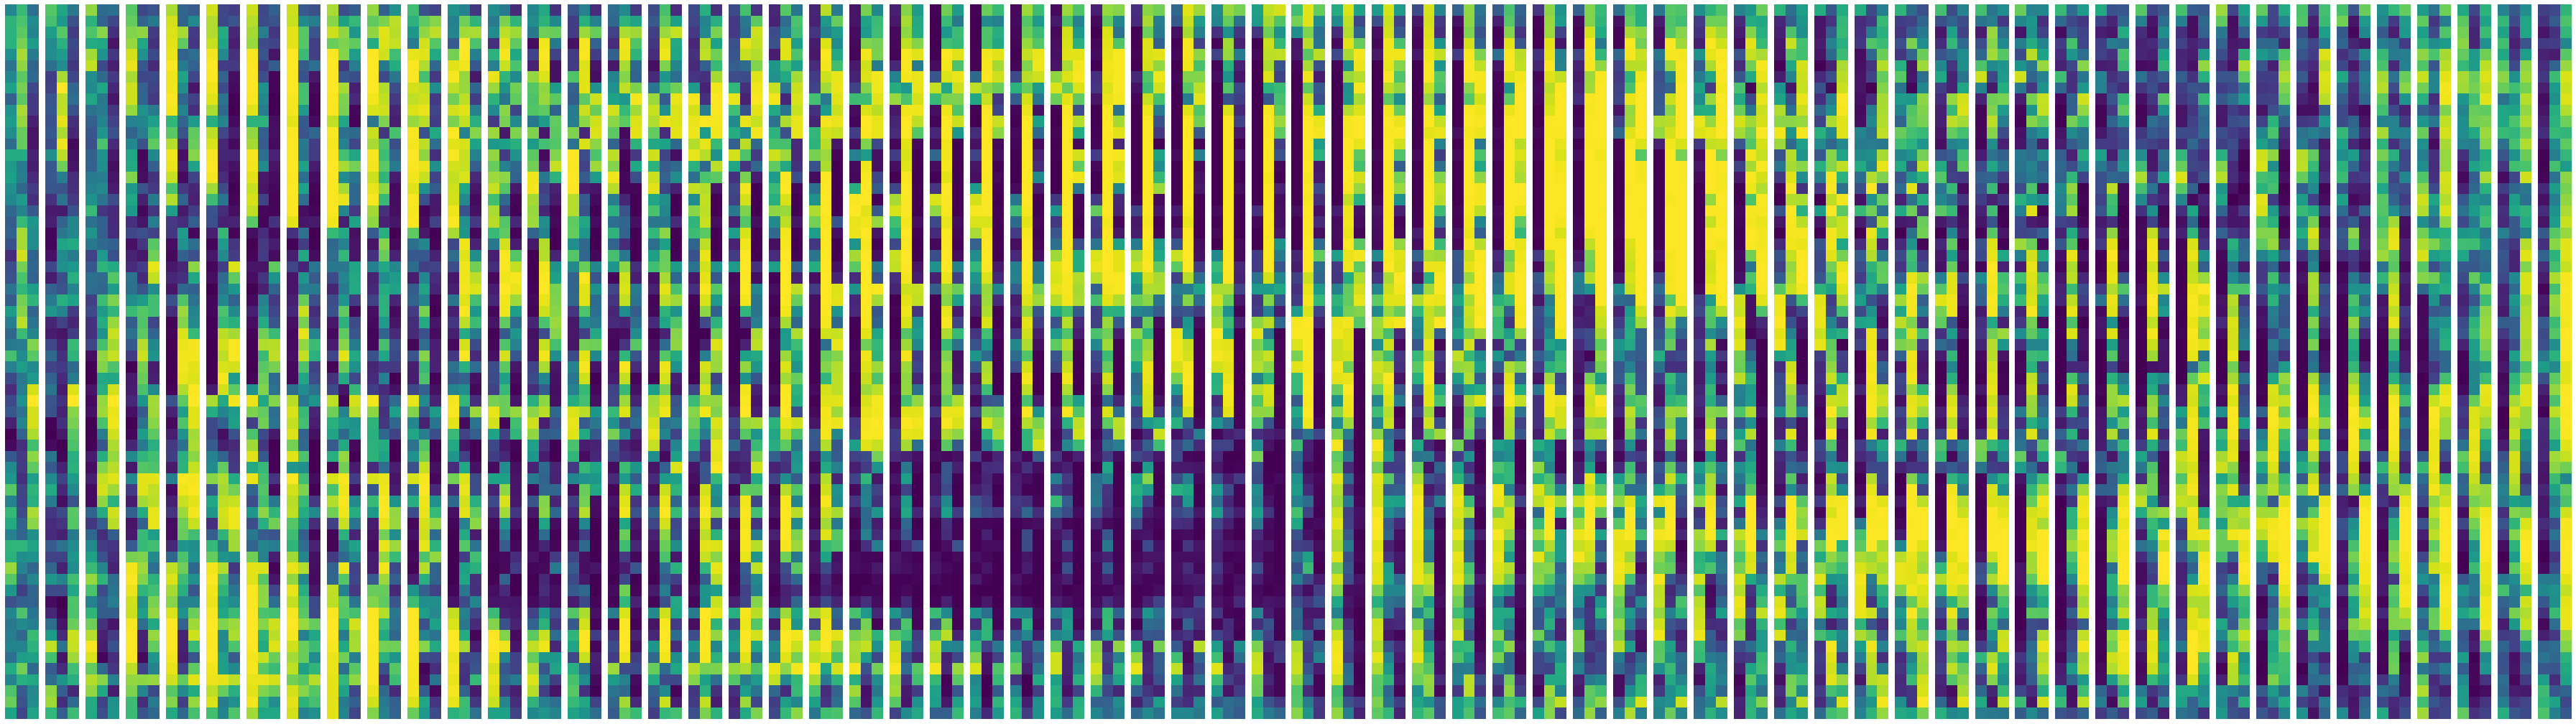

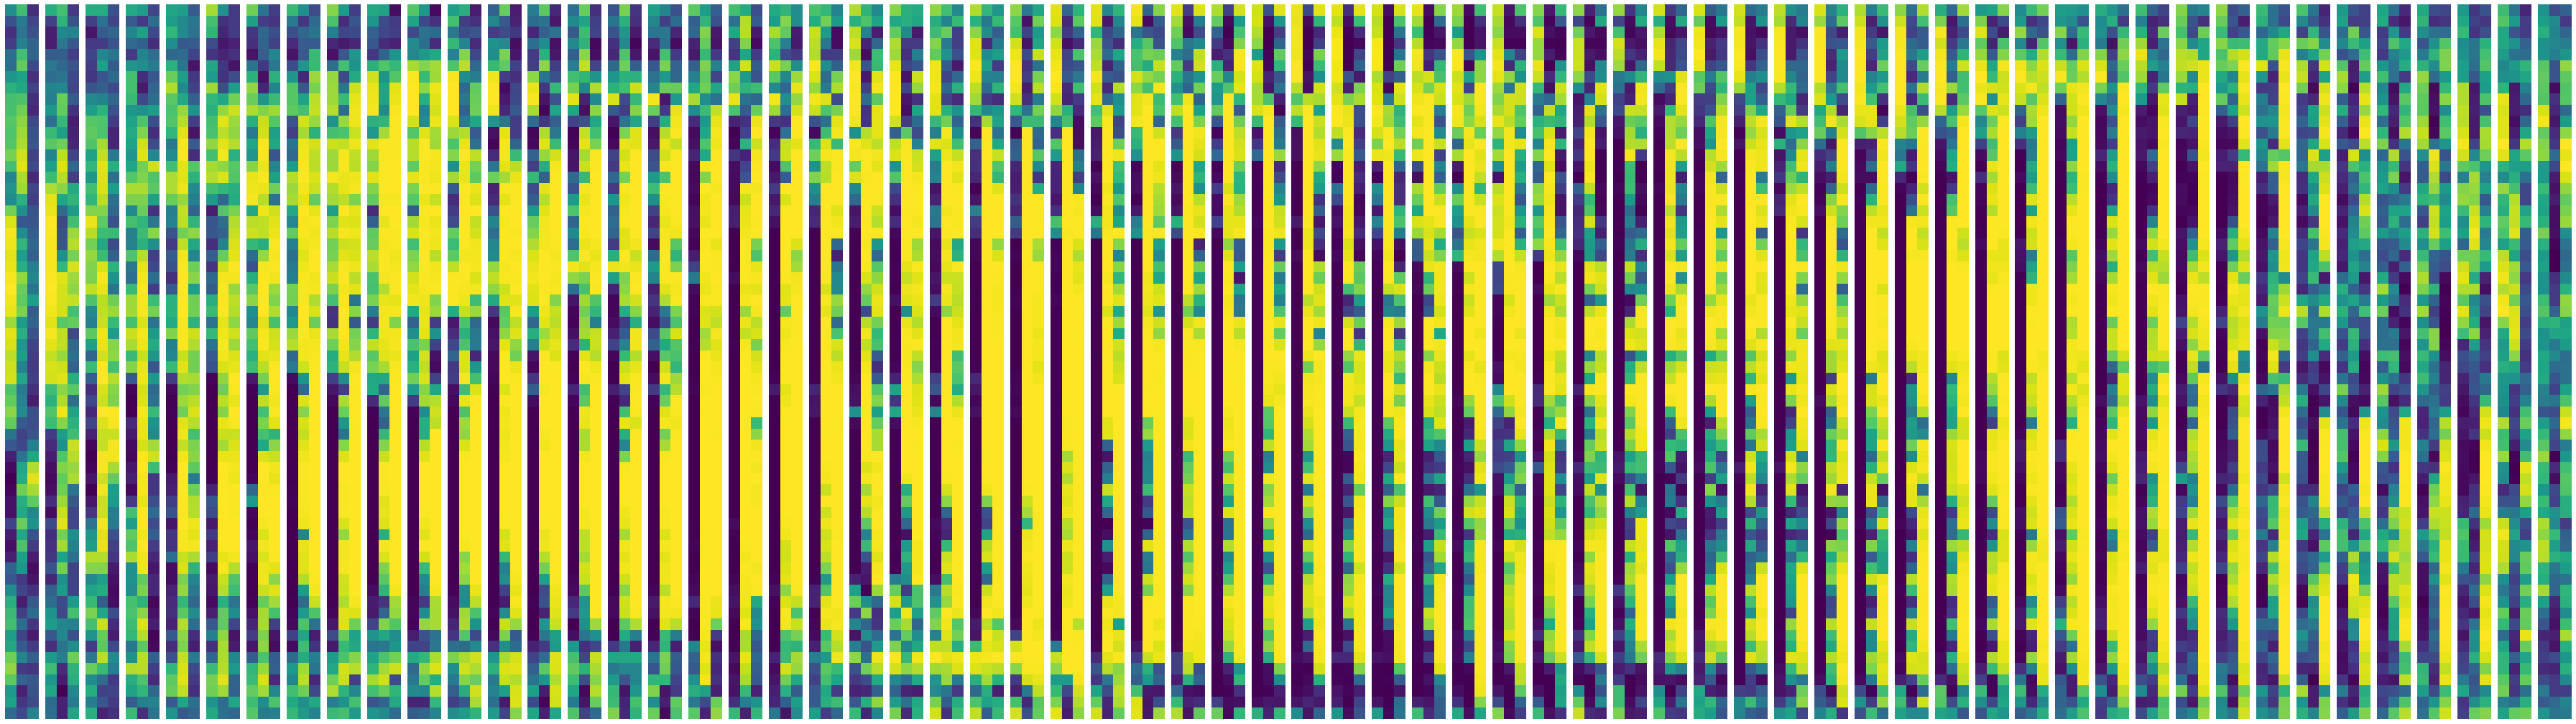

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


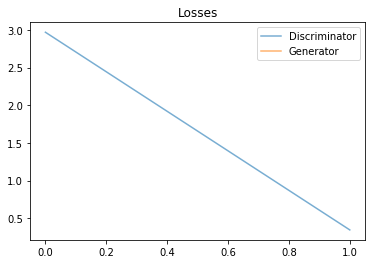

1 [D loss: 0.5198003053665161 | D Accuracy: 67.1875] [G loss: 0.1638166308403015]


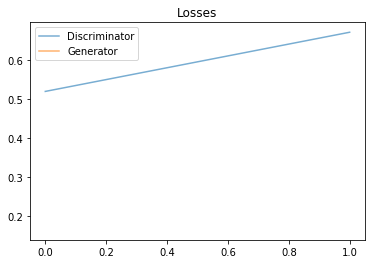

2 [D loss: 1.4709587097167969 | D Accuracy: 4.6875] [G loss: 2.703932762145996]


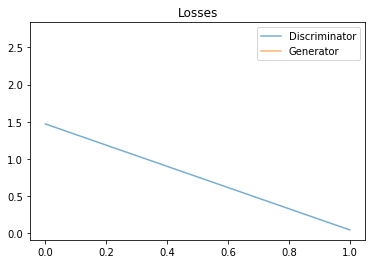

3 [D loss: 0.8803744316101074 | D Accuracy: 31.25] [G loss: 1.5500123500823975]


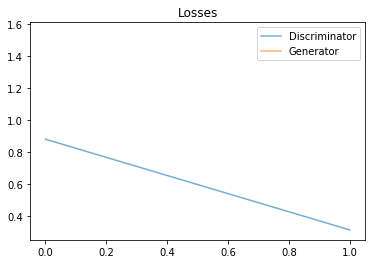

4 [D loss: 0.9233478903770447 | D Accuracy: 35.9375] [G loss: 2.4578733444213867]


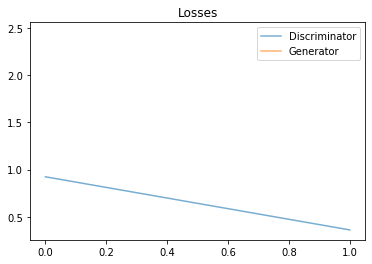

5 [D loss: 0.729549765586853 | D Accuracy: 53.125] [G loss: 2.0406248569488525]


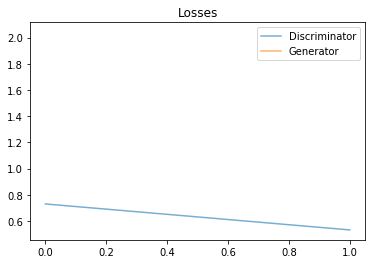

6 [D loss: 0.5570658445358276 | D Accuracy: 68.75] [G loss: 1.487706184387207]


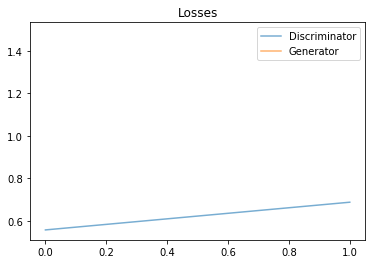

7 [D loss: 0.26537448167800903 | D Accuracy: 93.75] [G loss: 1.2124906778335571]


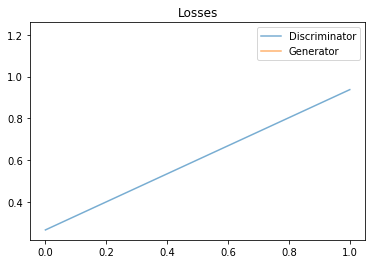

8 [D loss: 0.2340584099292755 | D Accuracy: 95.3125] [G loss: 1.7678065299987793]


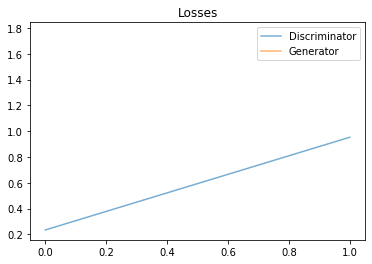

9 [D loss: 0.6072283387184143 | D Accuracy: 75.0] [G loss: 2.185774564743042]


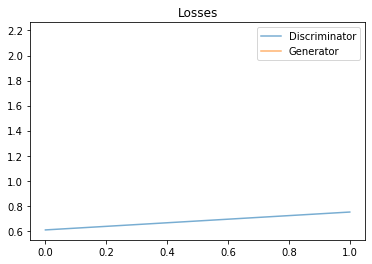

10 [D loss: 0.9088904857635498 | D Accuracy: 51.5625] [G loss: 2.4617204666137695]


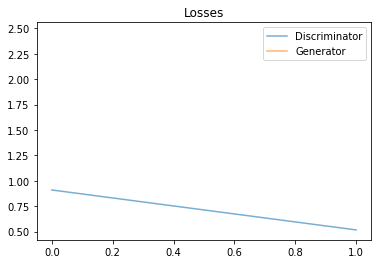

11 [D loss: 0.5419743061065674 | D Accuracy: 71.875] [G loss: 2.1107516288757324]


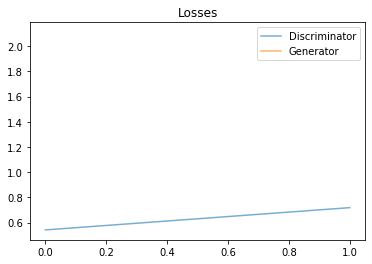

12 [D loss: 0.4011872112751007 | D Accuracy: 87.5] [G loss: 2.0956716537475586]


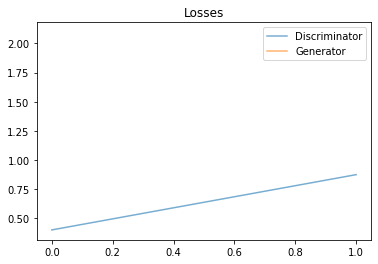

13 [D loss: 0.3337796628475189 | D Accuracy: 87.5] [G loss: 2.250854015350342]


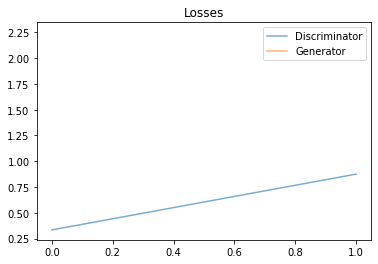

14 [D loss: 0.2531358599662781 | D Accuracy: 87.5] [G loss: 2.10233736038208]


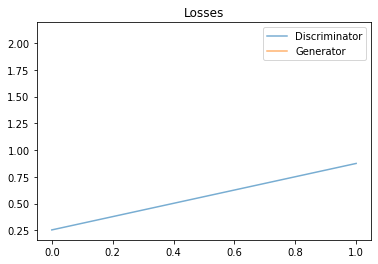

15 [D loss: 0.5439134836196899 | D Accuracy: 71.875] [G loss: 2.091108798980713]


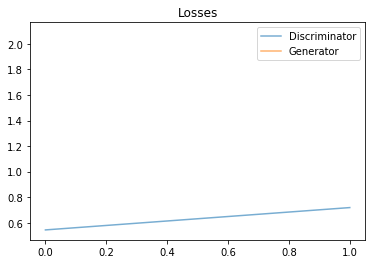

16 [D loss: 0.9395429491996765 | D Accuracy: 59.375] [G loss: 4.0432939529418945]


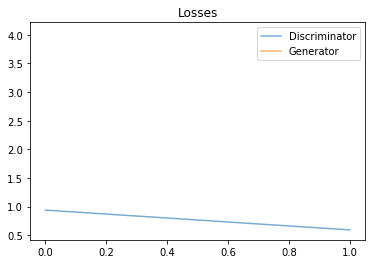

17 [D loss: 0.5189553499221802 | D Accuracy: 76.5625] [G loss: 4.6294755935668945]


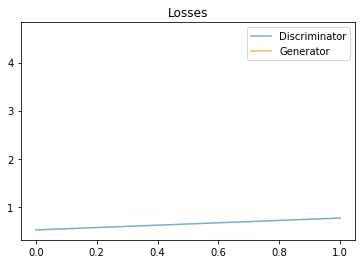

18 [D loss: 0.6214383244514465 | D Accuracy: 68.75] [G loss: 3.5116024017333984]


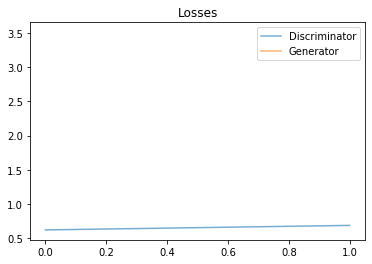

19 [D loss: 0.5251563787460327 | D Accuracy: 70.3125] [G loss: 2.137751579284668]


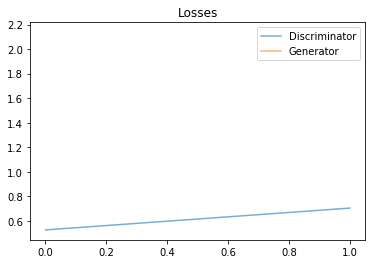

20 [D loss: 1.4691214561462402 | D Accuracy: 21.875] [G loss: 4.683246612548828]


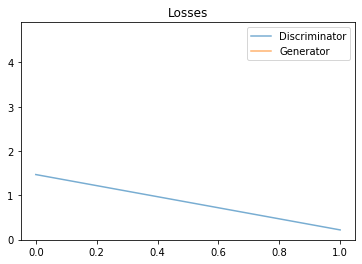

21 [D loss: 0.47854506969451904 | D Accuracy: 76.5625] [G loss: 3.073556900024414]


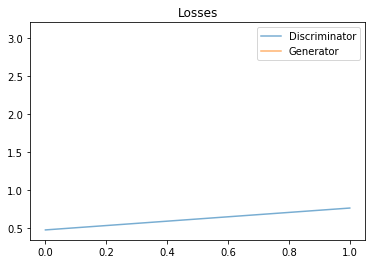

22 [D loss: 0.504033625125885 | D Accuracy: 76.5625] [G loss: 2.995354413986206]


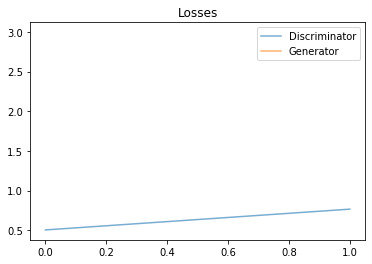

23 [D loss: 0.4260168969631195 | D Accuracy: 79.6875] [G loss: 1.7509512901306152]


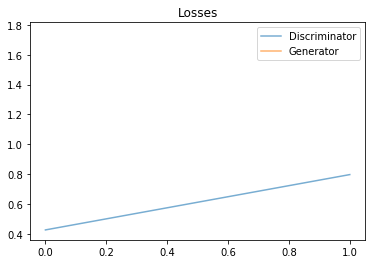

24 [D loss: 0.5125584602355957 | D Accuracy: 81.25] [G loss: 2.1503095626831055]


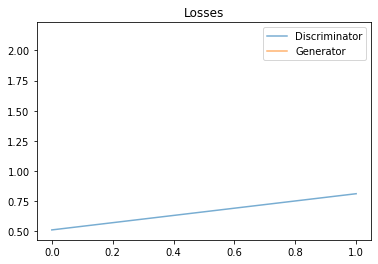

25 [D loss: 0.2398713231086731 | D Accuracy: 89.0625] [G loss: 3.454127788543701]


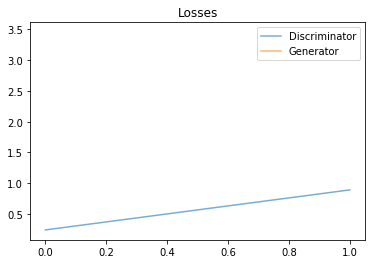

26 [D loss: 0.22269479930400848 | D Accuracy: 93.75] [G loss: 3.20635986328125]


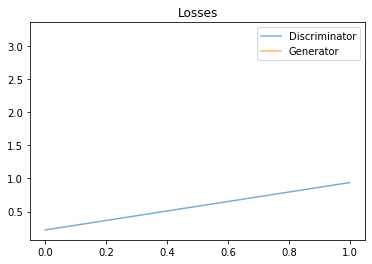

27 [D loss: 1.000380039215088 | D Accuracy: 57.8125] [G loss: 2.2971174716949463]


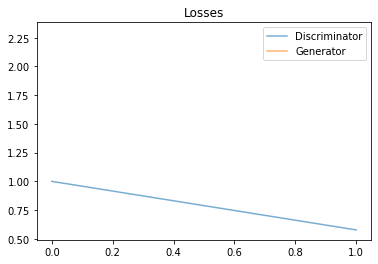

28 [D loss: 0.6859555840492249 | D Accuracy: 71.875] [G loss: 6.515353202819824]


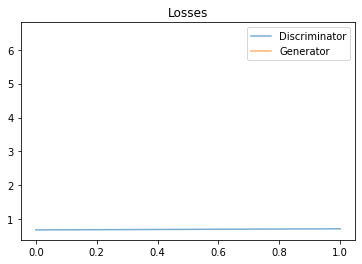

29 [D loss: 0.7265884876251221 | D Accuracy: 70.3125] [G loss: 2.1325180530548096]


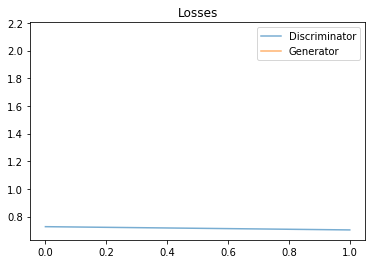

30 [D loss: 0.6286691427230835 | D Accuracy: 73.4375] [G loss: 2.700119972229004]


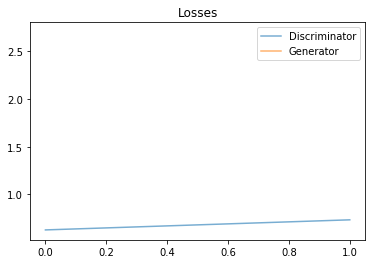

31 [D loss: 0.6946081519126892 | D Accuracy: 56.25] [G loss: 2.1861953735351562]


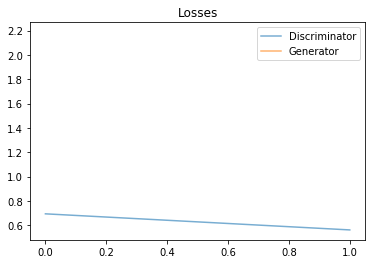

32 [D loss: 0.46730709075927734 | D Accuracy: 75.0] [G loss: 3.290055274963379]


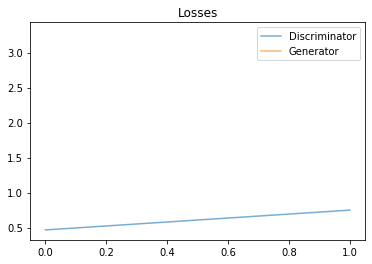

33 [D loss: 0.8617555499076843 | D Accuracy: 53.125] [G loss: 2.365046739578247]


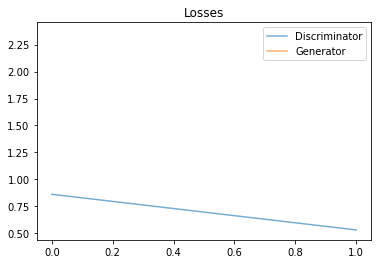

34 [D loss: 0.4899367690086365 | D Accuracy: 78.125] [G loss: 2.8212764263153076]


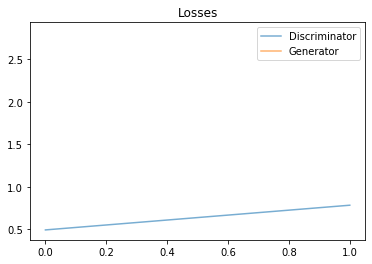

35 [D loss: 0.40352723002433777 | D Accuracy: 82.8125] [G loss: 2.0533061027526855]


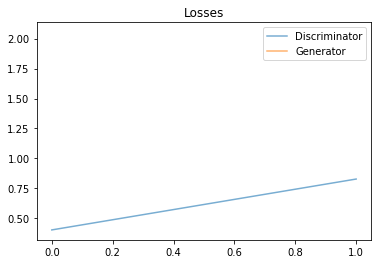

36 [D loss: 0.5469461679458618 | D Accuracy: 73.4375] [G loss: 1.6730711460113525]


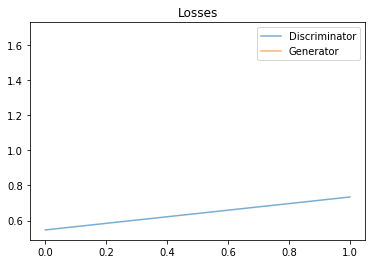

37 [D loss: 0.22763897478580475 | D Accuracy: 87.5] [G loss: 3.042001962661743]


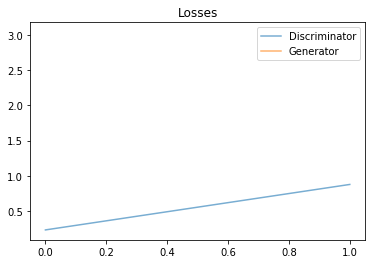

38 [D loss: 0.21688200533390045 | D Accuracy: 92.1875] [G loss: 3.46244740486145]


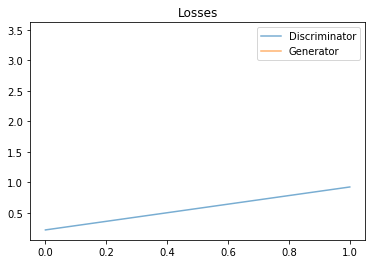

39 [D loss: 0.23799526691436768 | D Accuracy: 93.75] [G loss: 3.103658676147461]


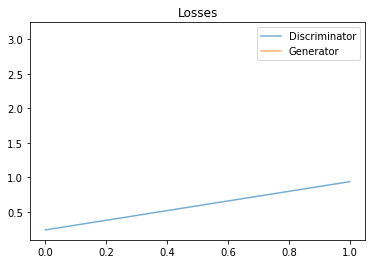

40 [D loss: 0.21655014157295227 | D Accuracy: 95.3125] [G loss: 3.034639835357666]


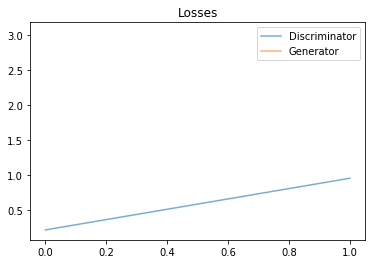

41 [D loss: 0.5891929268836975 | D Accuracy: 73.4375] [G loss: 3.3747503757476807]


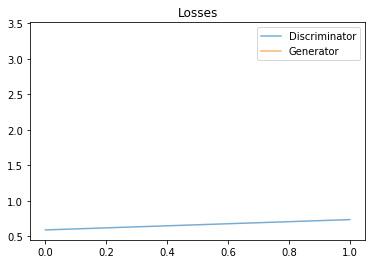

42 [D loss: 1.4962408542633057 | D Accuracy: 35.9375] [G loss: 5.959503650665283]


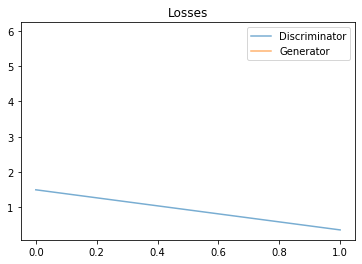

43 [D loss: 0.38704317808151245 | D Accuracy: 82.8125] [G loss: 2.1503891944885254]


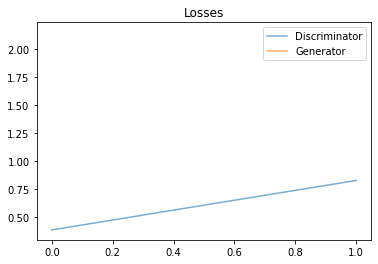

44 [D loss: 0.24276596307754517 | D Accuracy: 87.5] [G loss: 2.892810583114624]


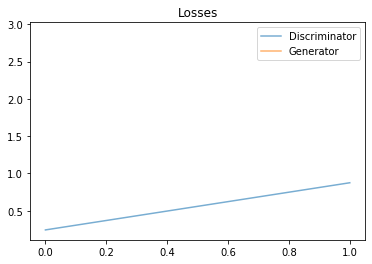

45 [D loss: 0.3043837249279022 | D Accuracy: 85.9375] [G loss: 3.606417417526245]


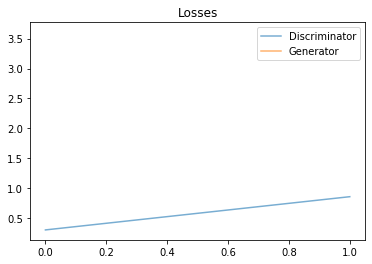

46 [D loss: 0.4044035077095032 | D Accuracy: 79.6875] [G loss: 2.5740935802459717]


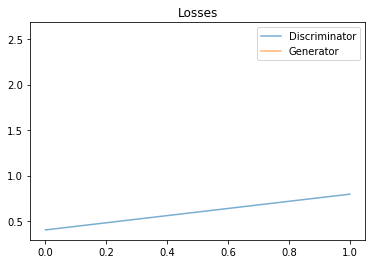

47 [D loss: 0.3870823383331299 | D Accuracy: 82.8125] [G loss: 3.6579232215881348]


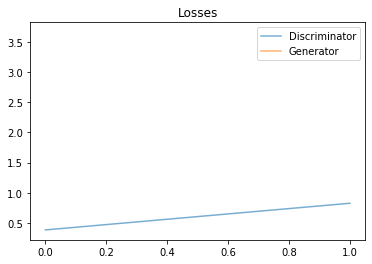

48 [D loss: 0.2735649645328522 | D Accuracy: 90.625] [G loss: 3.1745548248291016]


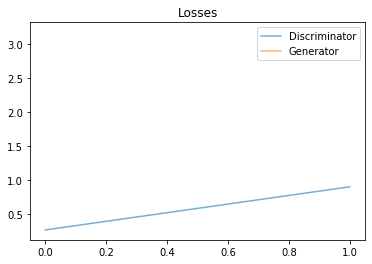

49 [D loss: 0.43687307834625244 | D Accuracy: 84.375] [G loss: 3.3774890899658203]


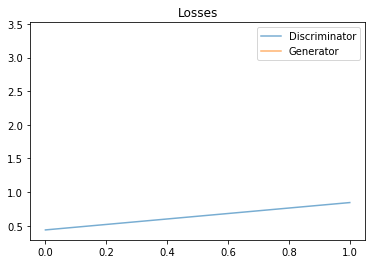

50 [D loss: 0.27269500494003296 | D Accuracy: 89.0625] [G loss: 3.712966203689575]


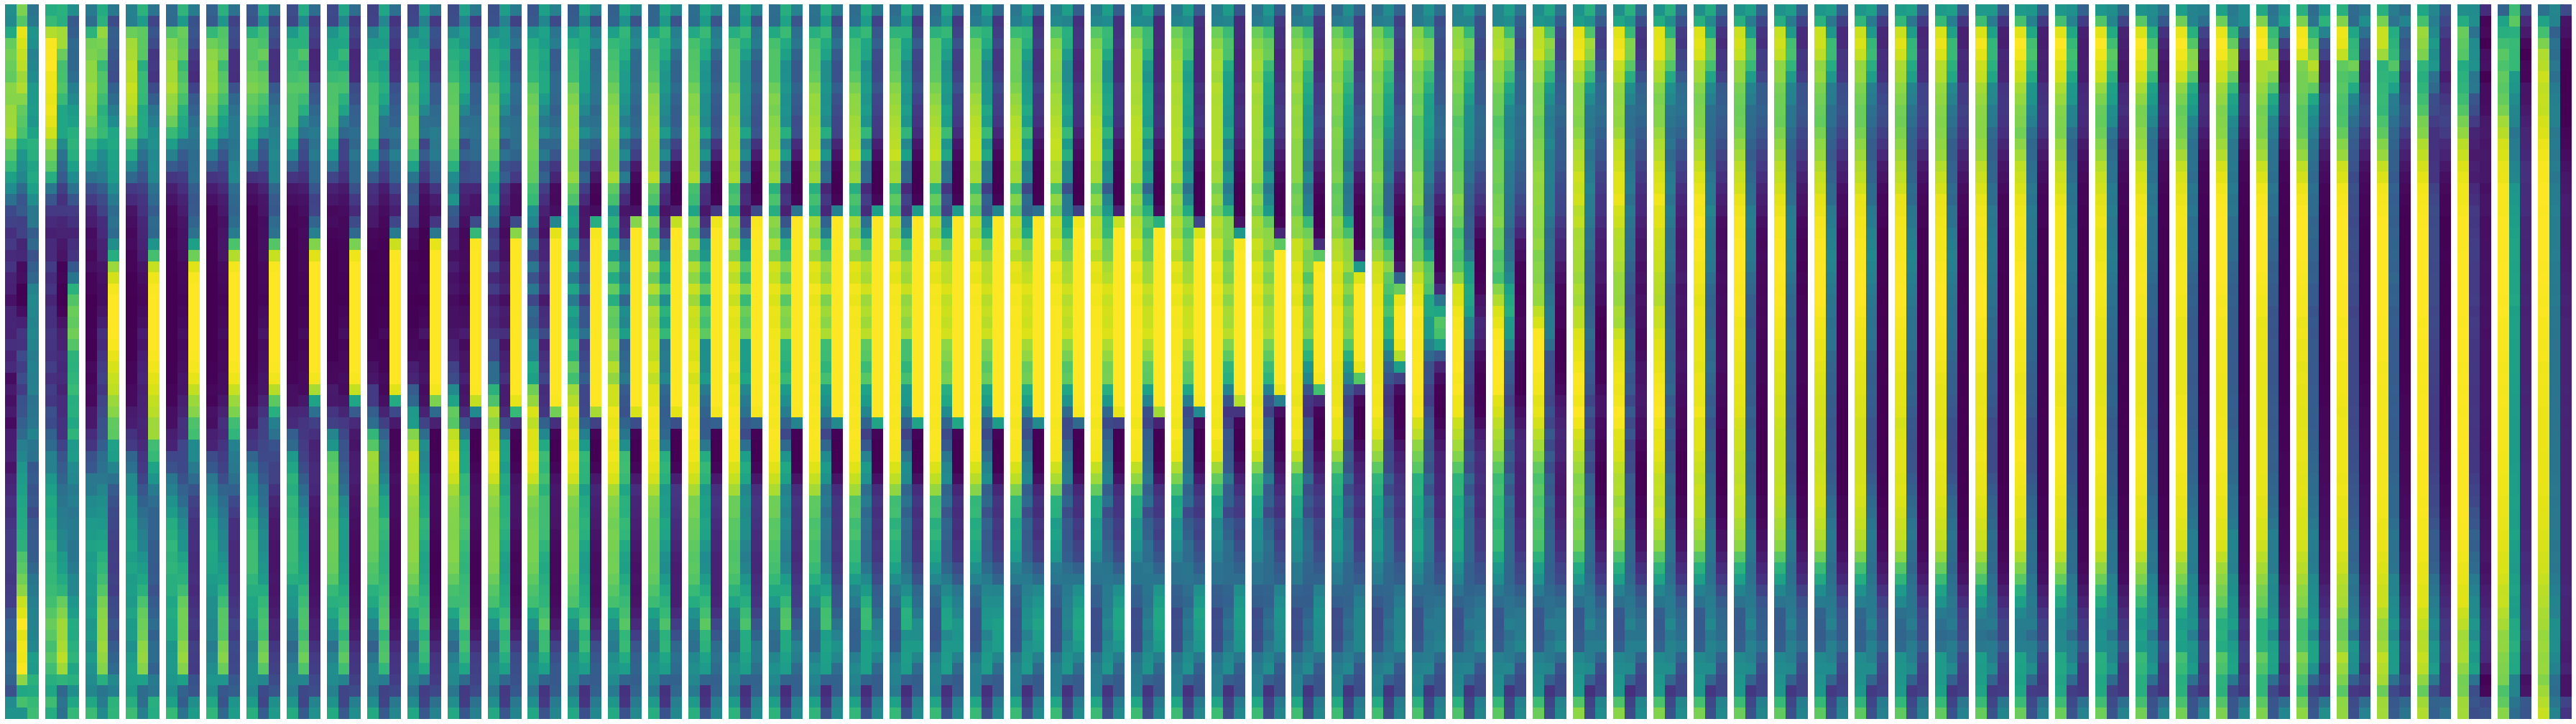

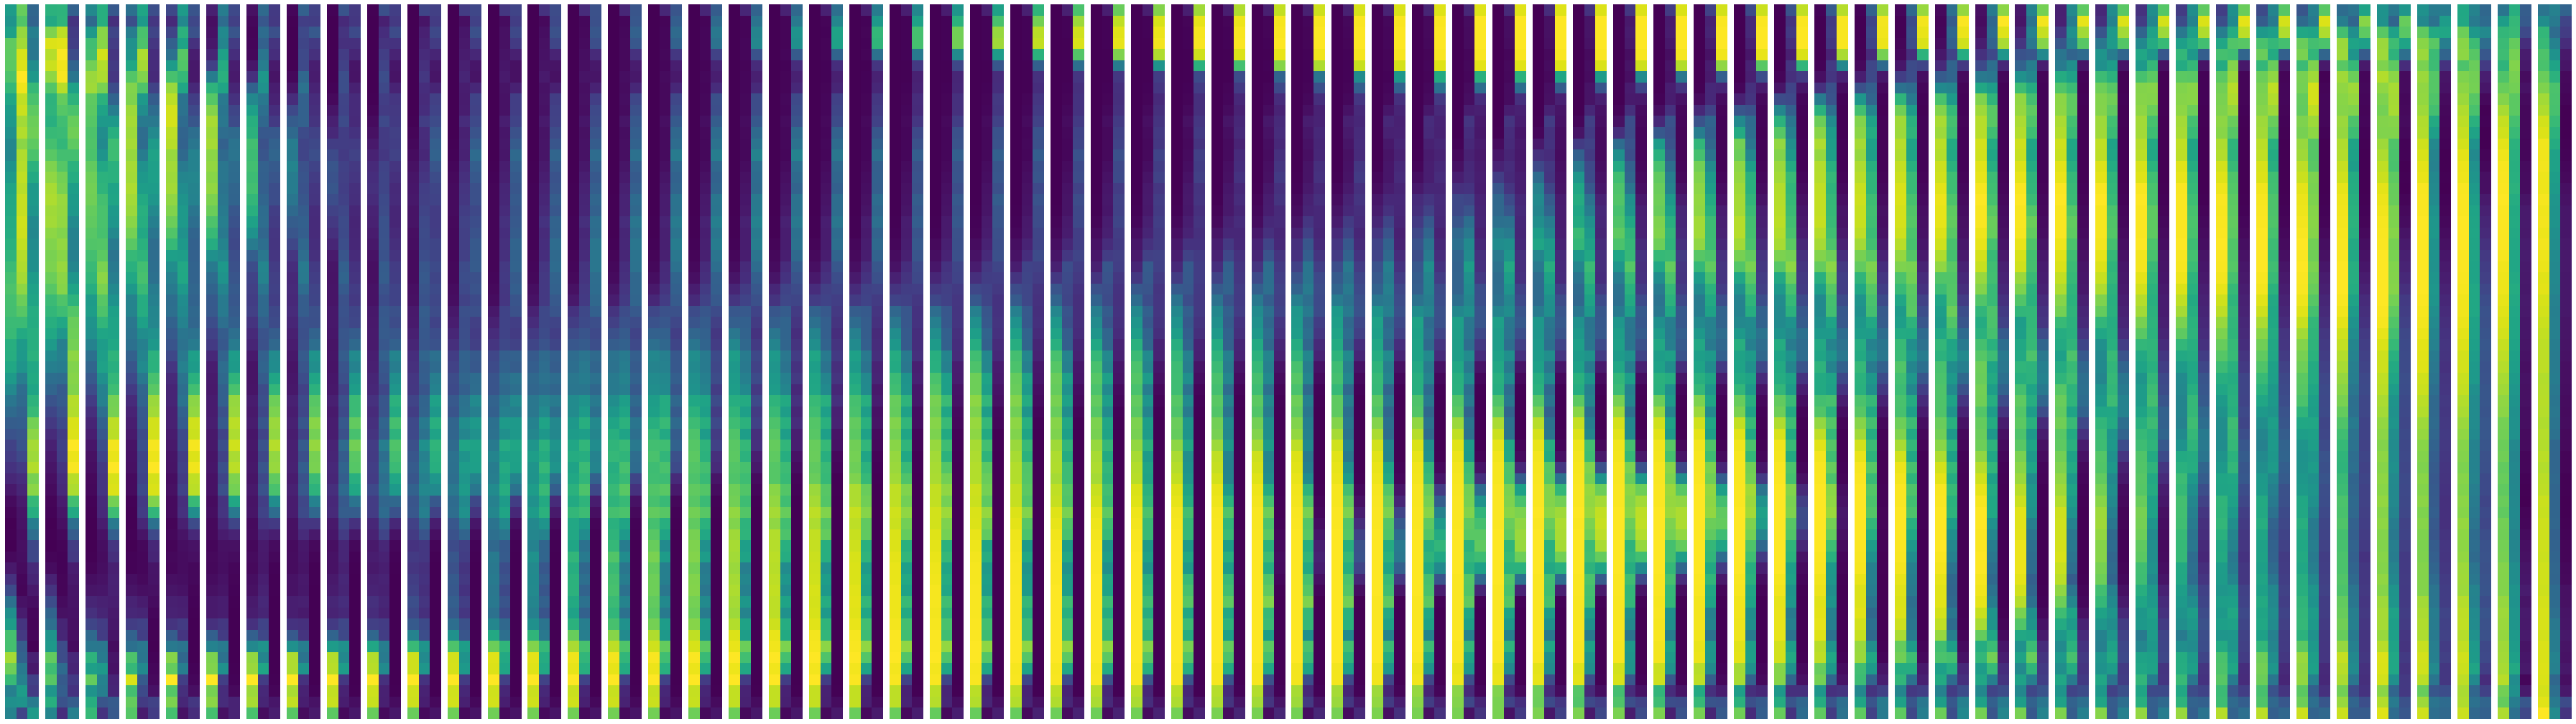

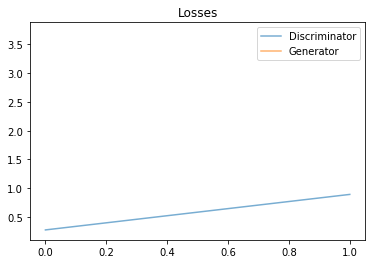

51 [D loss: 0.1753612905740738 | D Accuracy: 90.625] [G loss: 2.970418930053711]


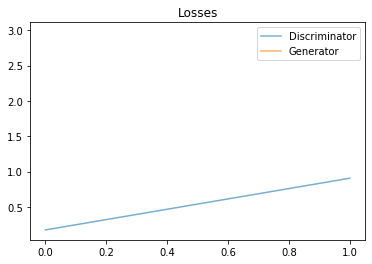

52 [D loss: 1.2953400611877441 | D Accuracy: 46.875] [G loss: 2.3662168979644775]


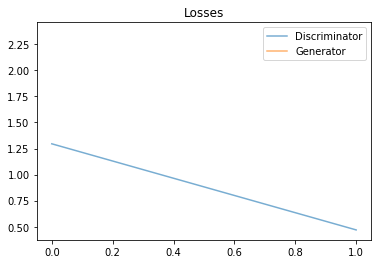

53 [D loss: 0.9859707951545715 | D Accuracy: 56.25] [G loss: 6.915187358856201]


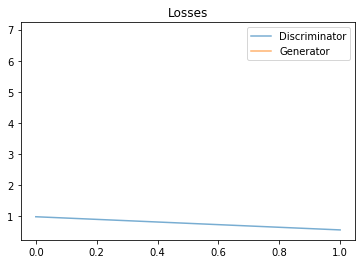

54 [D loss: 0.7730300426483154 | D Accuracy: 60.9375] [G loss: 2.818962574005127]


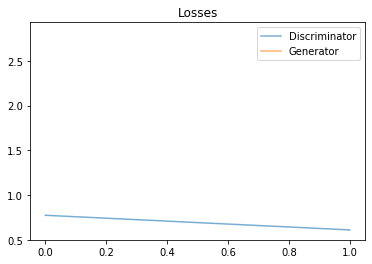

55 [D loss: 0.29804372787475586 | D Accuracy: 89.0625] [G loss: 3.493706703186035]


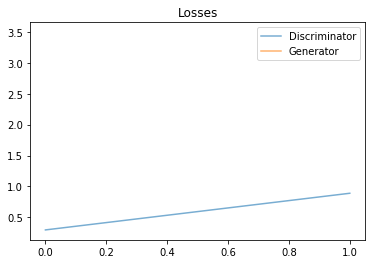

56 [D loss: 0.6111782789230347 | D Accuracy: 70.3125] [G loss: 4.207095146179199]


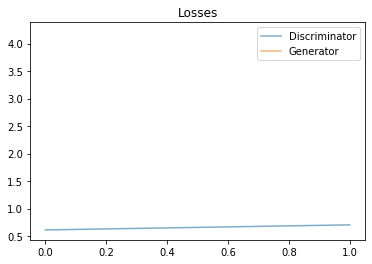

57 [D loss: 0.48094046115875244 | D Accuracy: 82.8125] [G loss: 1.9780166149139404]


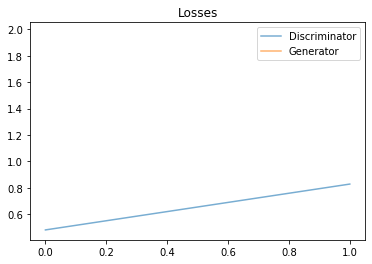

58 [D loss: 0.10051809251308441 | D Accuracy: 100.0] [G loss: 3.2227227687835693]


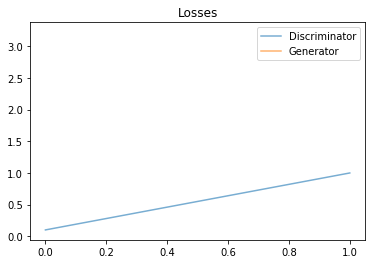

59 [D loss: 0.34960630536079407 | D Accuracy: 84.375] [G loss: 3.270866870880127]


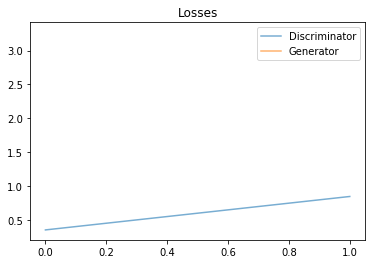

60 [D loss: 0.2570745348930359 | D Accuracy: 92.1875] [G loss: 3.0023741722106934]


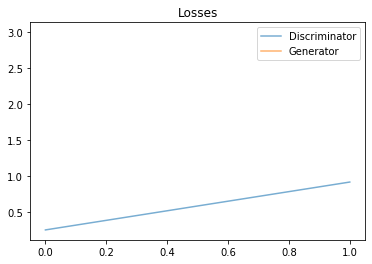

61 [D loss: 0.3652285933494568 | D Accuracy: 85.9375] [G loss: 2.1678671836853027]


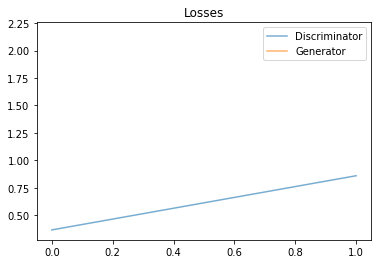

62 [D loss: 0.18342600762844086 | D Accuracy: 95.3125] [G loss: 3.0460917949676514]


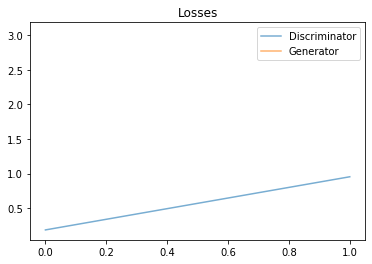

63 [D loss: 0.3584236204624176 | D Accuracy: 82.8125] [G loss: 3.387293577194214]


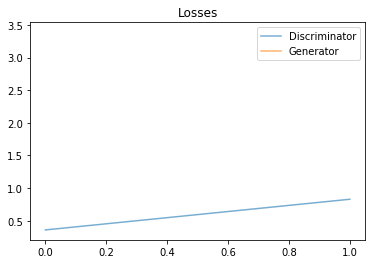

64 [D loss: 0.8156282305717468 | D Accuracy: 62.5] [G loss: 3.8939177989959717]


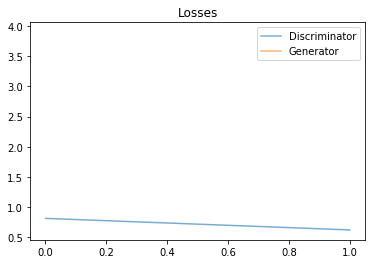

65 [D loss: 0.9702675342559814 | D Accuracy: 68.75] [G loss: 5.589447021484375]


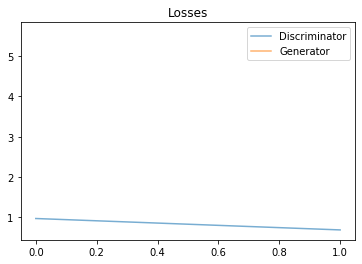

66 [D loss: 0.6816174983978271 | D Accuracy: 71.875] [G loss: 6.054080486297607]


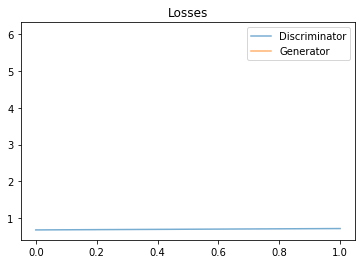

67 [D loss: 0.29008644819259644 | D Accuracy: 87.5] [G loss: 4.374429225921631]


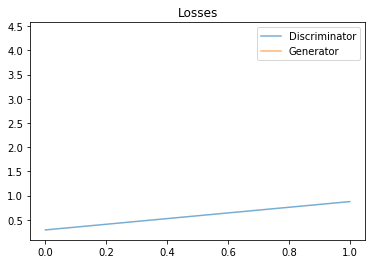

68 [D loss: 0.19930292665958405 | D Accuracy: 93.75] [G loss: 4.142514705657959]


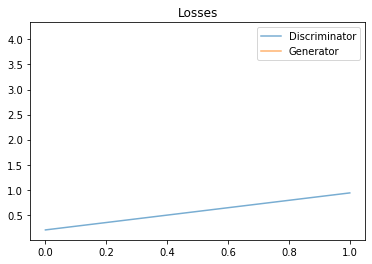

69 [D loss: 0.5262430906295776 | D Accuracy: 73.4375] [G loss: 3.116279125213623]


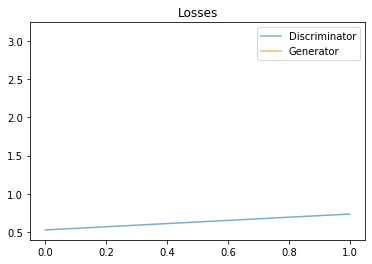

70 [D loss: 0.35295647382736206 | D Accuracy: 87.5] [G loss: 3.4115829467773438]


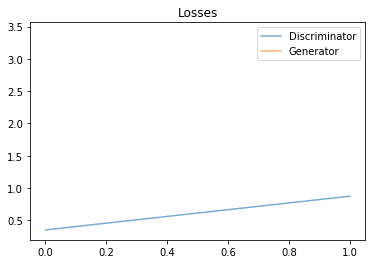

71 [D loss: 0.4713440239429474 | D Accuracy: 78.125] [G loss: 2.9930508136749268]


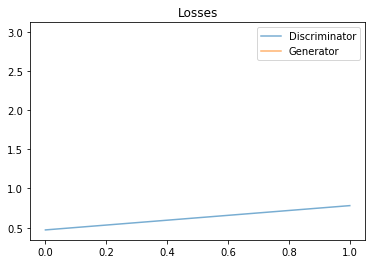

72 [D loss: 0.9652314782142639 | D Accuracy: 54.6875] [G loss: 4.556682586669922]


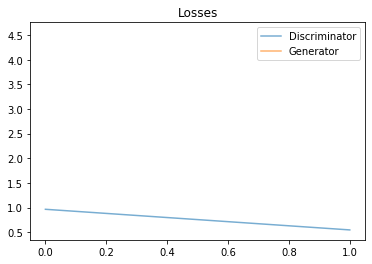

73 [D loss: 0.4615347981452942 | D Accuracy: 81.25] [G loss: 4.981066703796387]


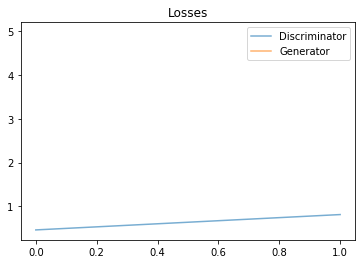

74 [D loss: 0.7445612549781799 | D Accuracy: 57.8125] [G loss: 3.7043092250823975]


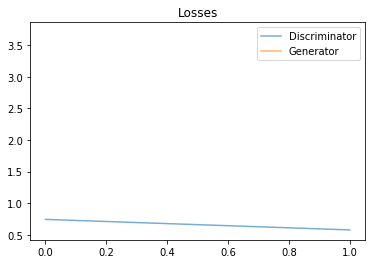

75 [D loss: 1.5899144411087036 | D Accuracy: 42.1875] [G loss: 5.544386863708496]


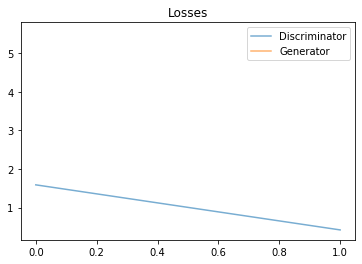

76 [D loss: 0.5425319671630859 | D Accuracy: 75.0] [G loss: 2.4274749755859375]


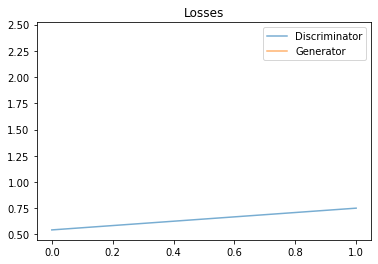

77 [D loss: 0.5709534287452698 | D Accuracy: 64.0625] [G loss: 1.772782802581787]


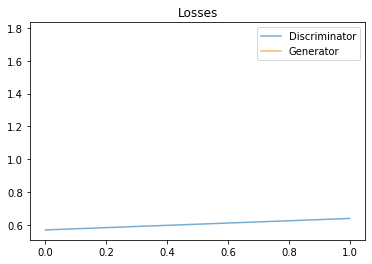

78 [D loss: 1.4327094554901123 | D Accuracy: 35.9375] [G loss: 1.9267380237579346]


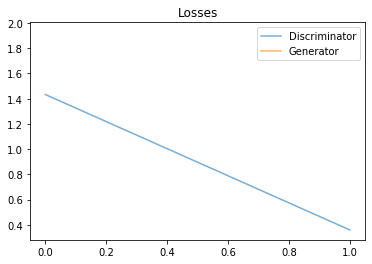

79 [D loss: 1.1162796020507812 | D Accuracy: 51.5625] [G loss: 2.2036359310150146]


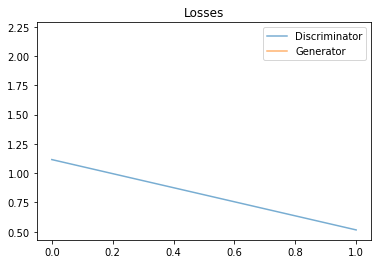

80 [D loss: 0.9070727825164795 | D Accuracy: 50.0] [G loss: 1.7934404611587524]


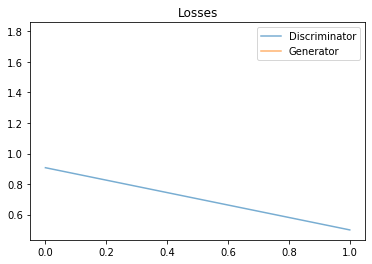

81 [D loss: 0.5821350812911987 | D Accuracy: 70.3125] [G loss: 1.7875310182571411]


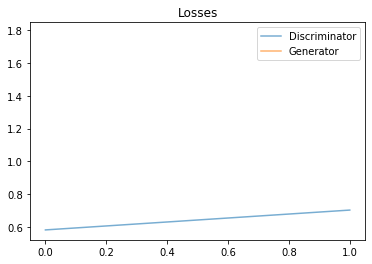

82 [D loss: 0.7826756834983826 | D Accuracy: 51.5625] [G loss: 2.332601547241211]


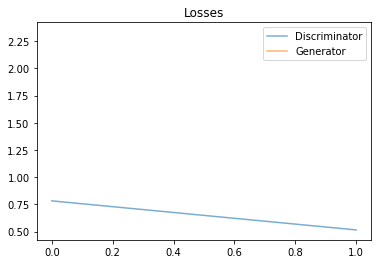

83 [D loss: 0.7951727509498596 | D Accuracy: 53.125] [G loss: 1.8901793956756592]


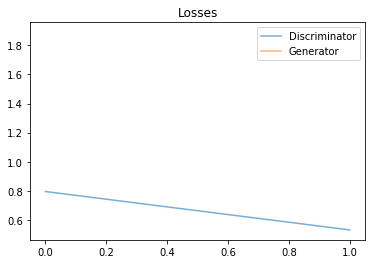

84 [D loss: 0.48313024640083313 | D Accuracy: 76.5625] [G loss: 2.2084739208221436]


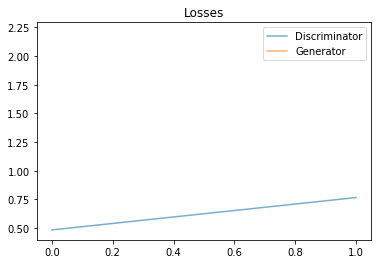

85 [D loss: 0.513759970664978 | D Accuracy: 76.5625] [G loss: 2.334866523742676]


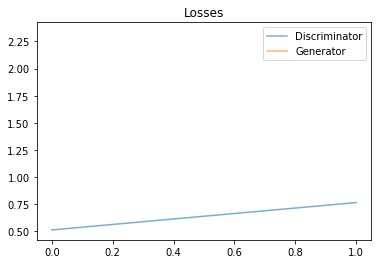

86 [D loss: 0.476045161485672 | D Accuracy: 75.0] [G loss: 1.7159717082977295]


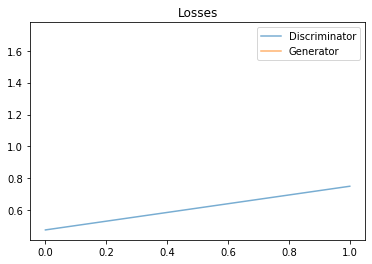

87 [D loss: 0.6644448041915894 | D Accuracy: 59.375] [G loss: 1.9432554244995117]


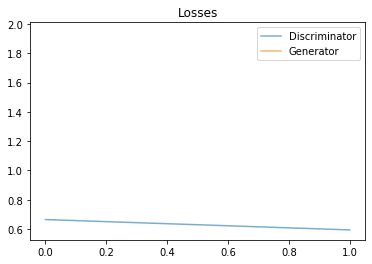

88 [D loss: 0.8046577572822571 | D Accuracy: 64.0625] [G loss: 2.451604127883911]


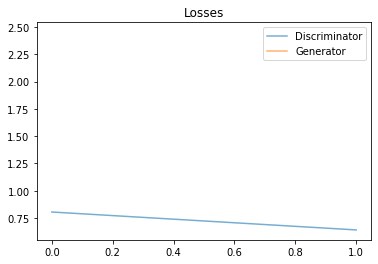

89 [D loss: 0.9158968925476074 | D Accuracy: 43.75] [G loss: 2.8583598136901855]


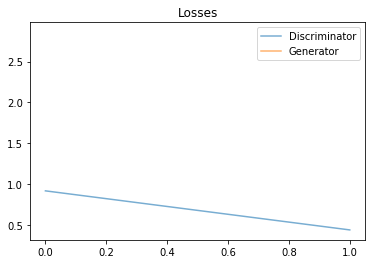

90 [D loss: 0.5082684755325317 | D Accuracy: 81.25] [G loss: 3.2977957725524902]


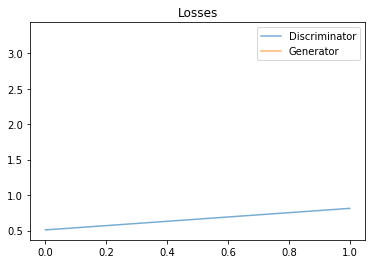

91 [D loss: 0.6945173144340515 | D Accuracy: 62.5] [G loss: 1.9793298244476318]


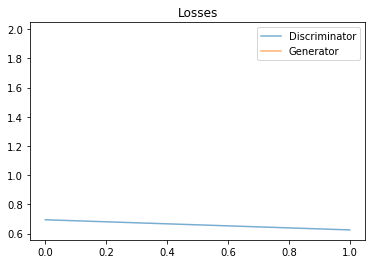

92 [D loss: 0.3136630654335022 | D Accuracy: 92.1875] [G loss: 1.5133206844329834]


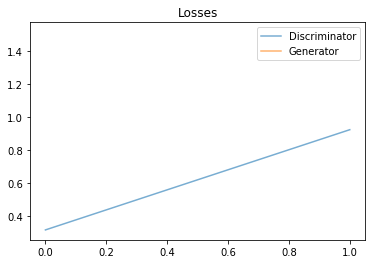

93 [D loss: 0.4091717302799225 | D Accuracy: 82.8125] [G loss: 1.2626953125]


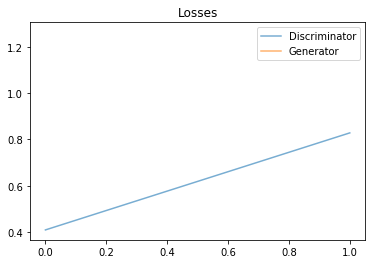

94 [D loss: 0.5900816321372986 | D Accuracy: 71.875] [G loss: 1.3667047023773193]


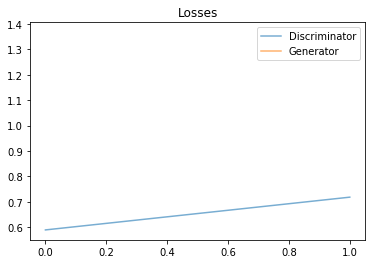

95 [D loss: 0.9458831548690796 | D Accuracy: 50.0] [G loss: 3.089937686920166]


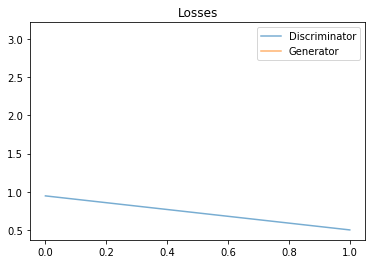

96 [D loss: 0.9639178514480591 | D Accuracy: 48.4375] [G loss: 2.8632659912109375]


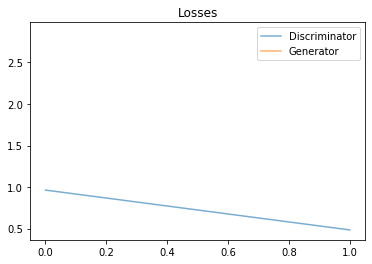

97 [D loss: 1.2206673622131348 | D Accuracy: 43.75] [G loss: 3.275527000427246]


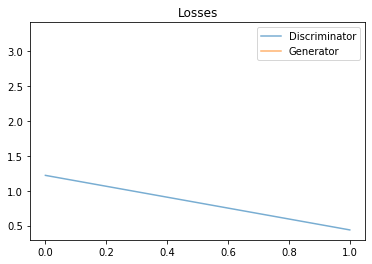

98 [D loss: 0.8265095949172974 | D Accuracy: 65.625] [G loss: 2.4325003623962402]


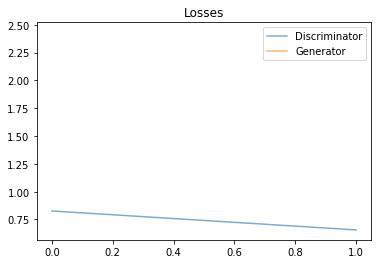

99 [D loss: 0.7529571652412415 | D Accuracy: 64.0625] [G loss: 2.5554471015930176]


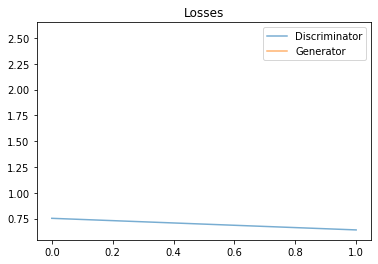

100 [D loss: 0.6534322500228882 | D Accuracy: 73.4375] [G loss: 2.2549610137939453]


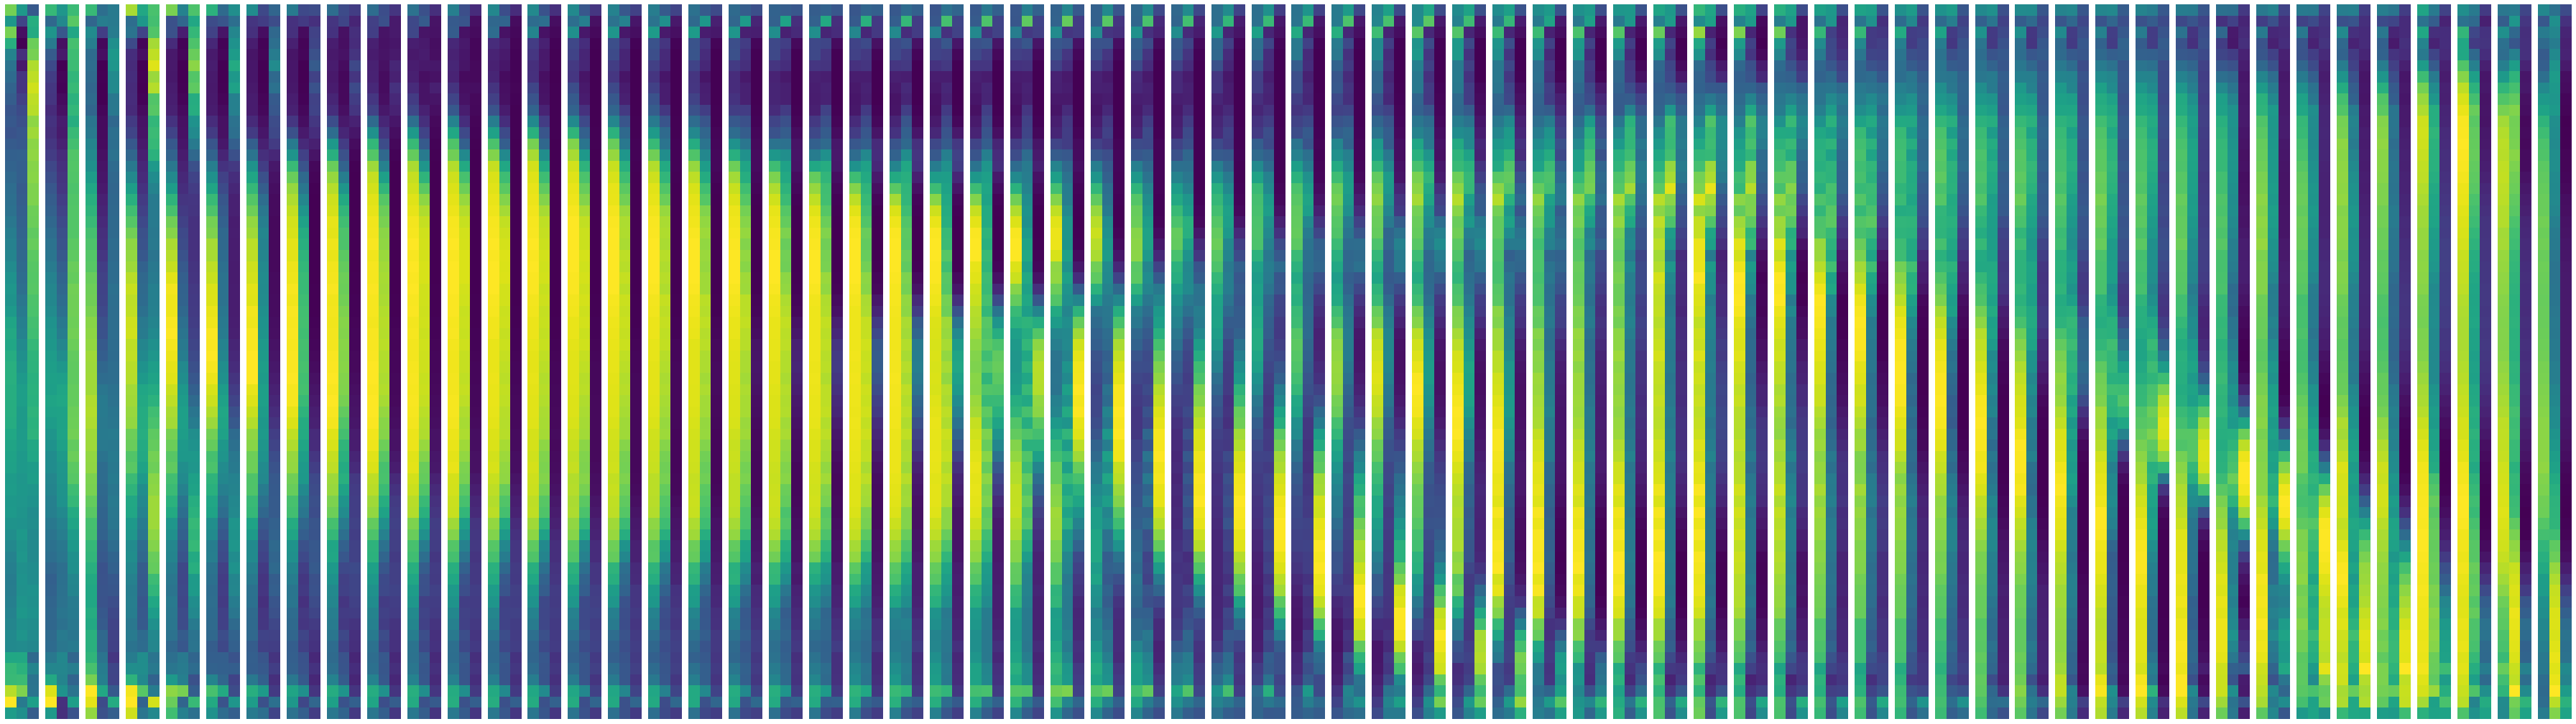

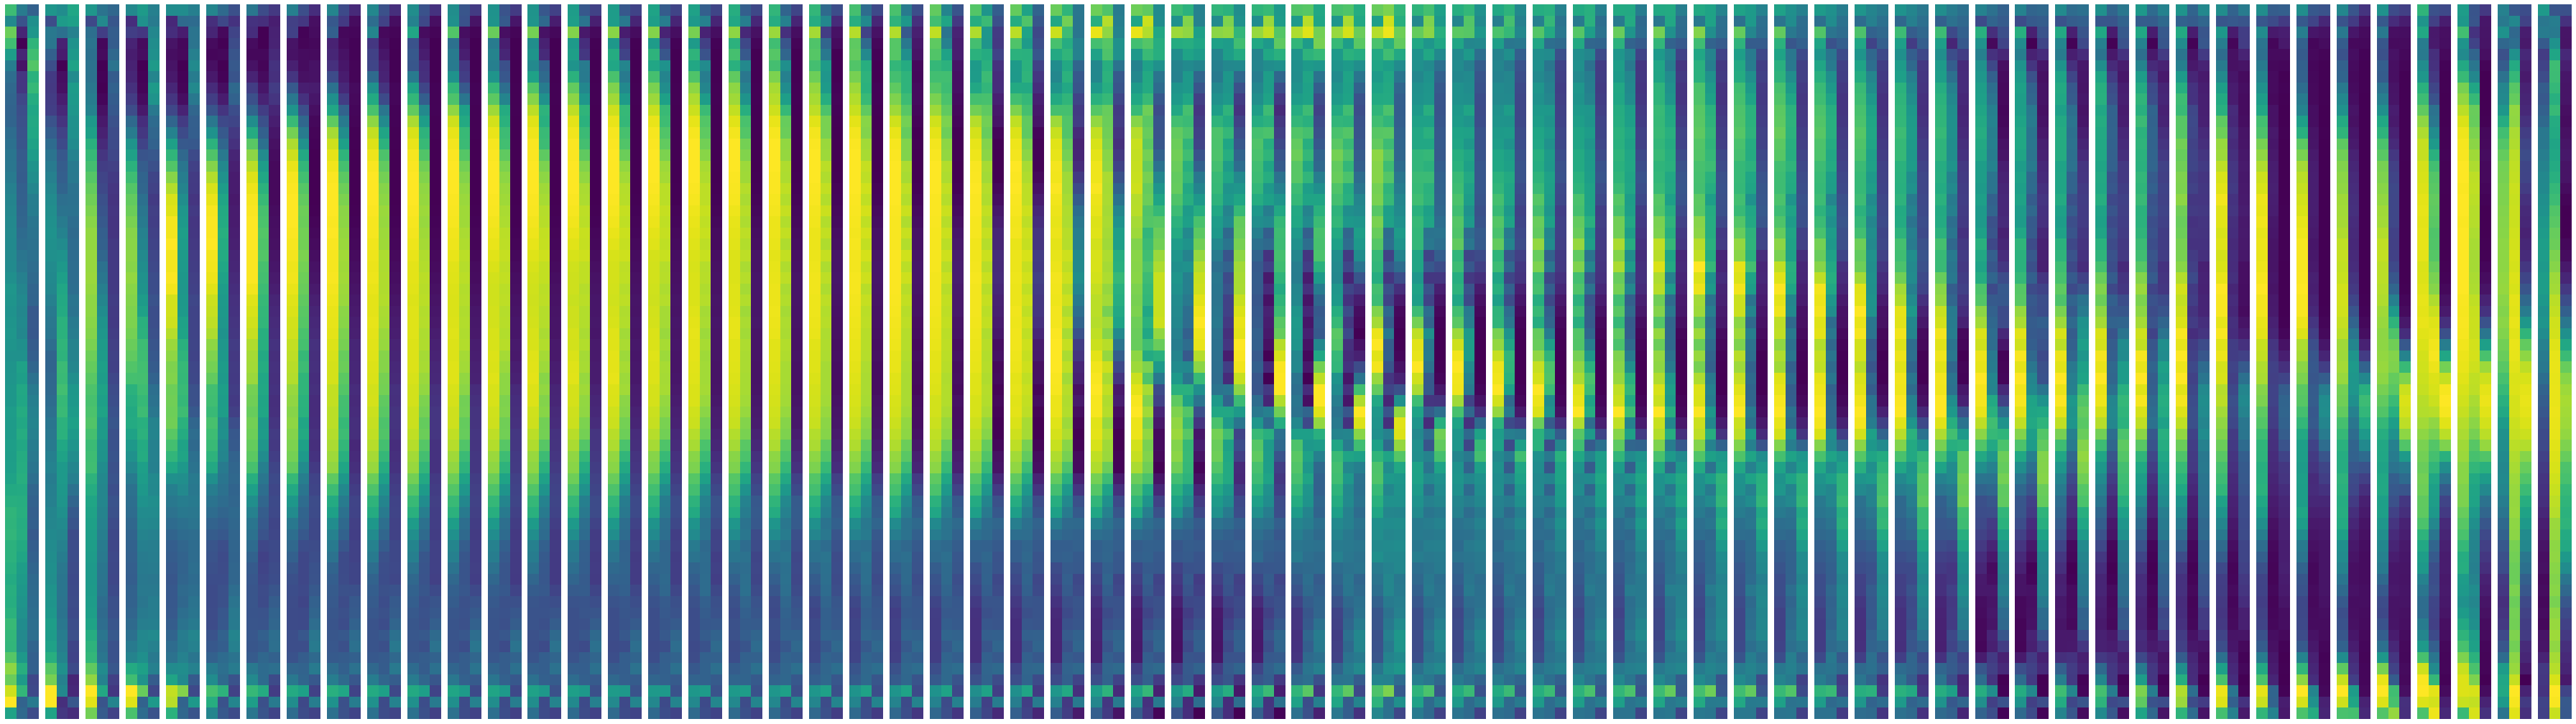

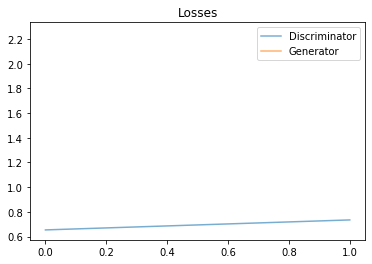

101 [D loss: 0.6632274389266968 | D Accuracy: 62.5] [G loss: 1.8664531707763672]


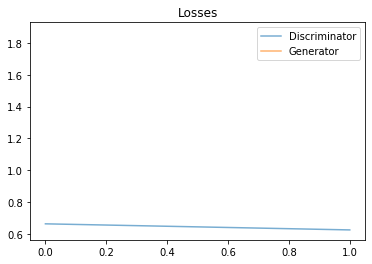

102 [D loss: 0.7598477602005005 | D Accuracy: 60.9375] [G loss: 2.237668752670288]


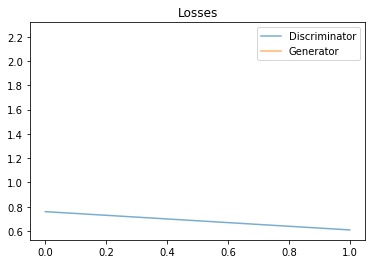

103 [D loss: 0.8802506923675537 | D Accuracy: 51.5625] [G loss: 2.6573638916015625]


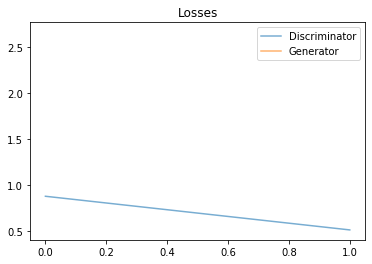

104 [D loss: 0.5517383813858032 | D Accuracy: 70.3125] [G loss: 3.393646478652954]


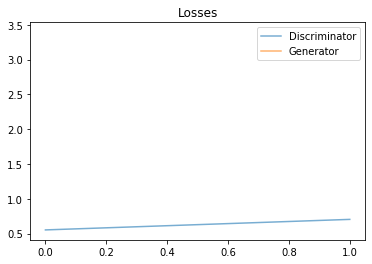

105 [D loss: 0.769993245601654 | D Accuracy: 62.5] [G loss: 2.4545271396636963]


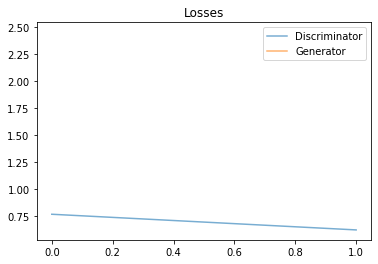

106 [D loss: 0.4070643186569214 | D Accuracy: 82.8125] [G loss: 2.7754578590393066]


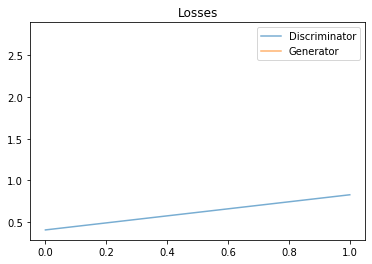

107 [D loss: 0.6420365571975708 | D Accuracy: 73.4375] [G loss: 2.773176908493042]


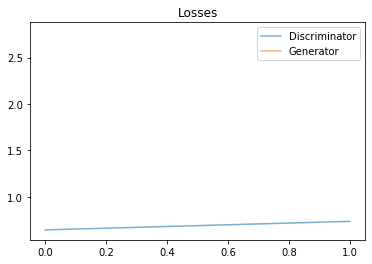

108 [D loss: 0.2614487111568451 | D Accuracy: 92.1875] [G loss: 1.844652771949768]


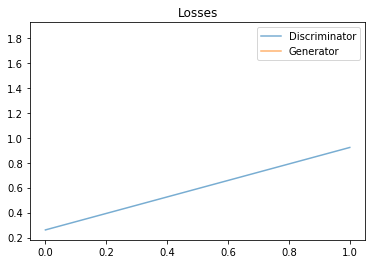

109 [D loss: 0.4561580419540405 | D Accuracy: 79.6875] [G loss: 2.317783832550049]


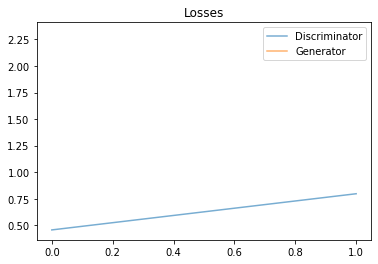

110 [D loss: 0.41529977321624756 | D Accuracy: 89.0625] [G loss: 2.5843286514282227]


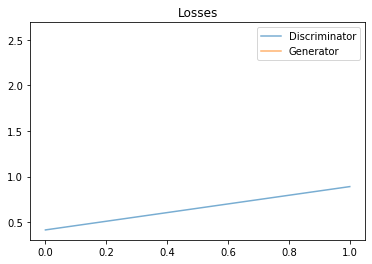

111 [D loss: 0.604103684425354 | D Accuracy: 67.1875] [G loss: 2.429466962814331]


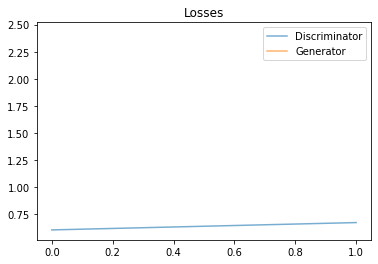

112 [D loss: 0.41181105375289917 | D Accuracy: 82.8125] [G loss: 2.754202365875244]


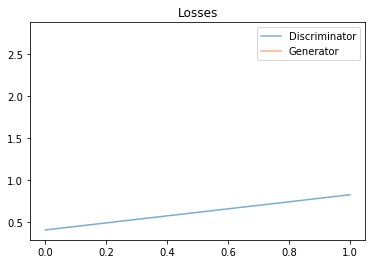

113 [D loss: 0.9582272171974182 | D Accuracy: 56.25] [G loss: 2.2748799324035645]


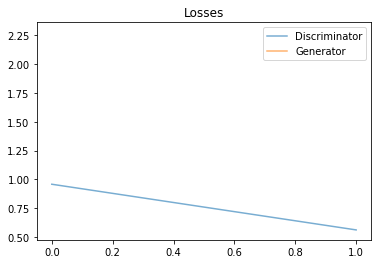

114 [D loss: 0.6588902473449707 | D Accuracy: 65.625] [G loss: 2.940810203552246]


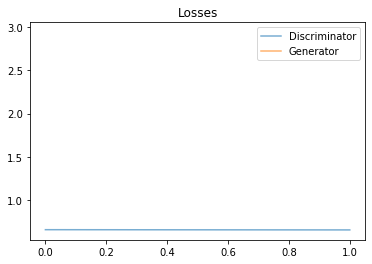

115 [D loss: 0.7673349976539612 | D Accuracy: 64.0625] [G loss: 3.4740986824035645]


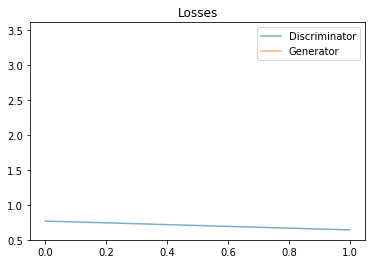

116 [D loss: 0.4437571167945862 | D Accuracy: 73.4375] [G loss: 2.0817840099334717]


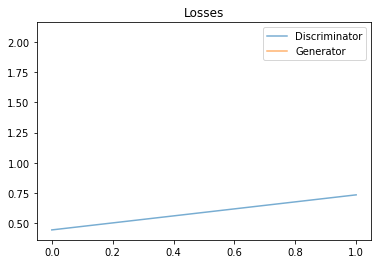

117 [D loss: 0.33472809195518494 | D Accuracy: 85.9375] [G loss: 3.1595139503479004]


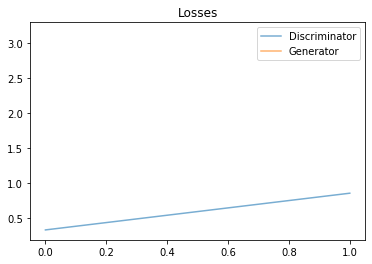

118 [D loss: 0.5010789036750793 | D Accuracy: 71.875] [G loss: 1.95753014087677]


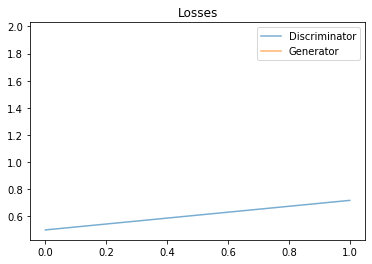

119 [D loss: 0.9219267964363098 | D Accuracy: 60.9375] [G loss: 2.680215358734131]


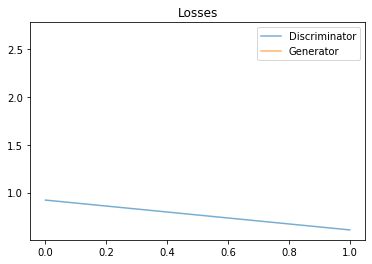

120 [D loss: 0.9316244125366211 | D Accuracy: 59.375] [G loss: 2.6357734203338623]


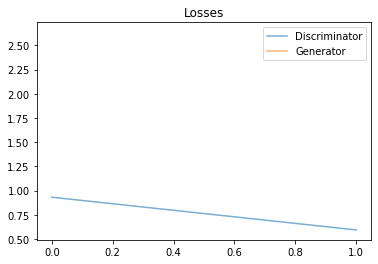

121 [D loss: 0.990526020526886 | D Accuracy: 54.6875] [G loss: 4.016694068908691]


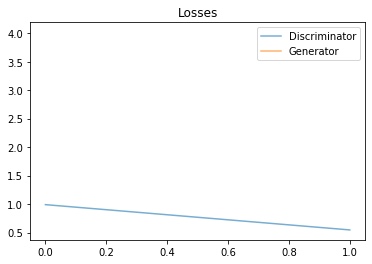

122 [D loss: 0.9496129751205444 | D Accuracy: 35.9375] [G loss: 2.8652477264404297]


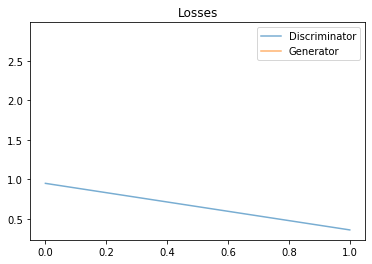

123 [D loss: 0.8778998851776123 | D Accuracy: 50.0] [G loss: 3.0220324993133545]


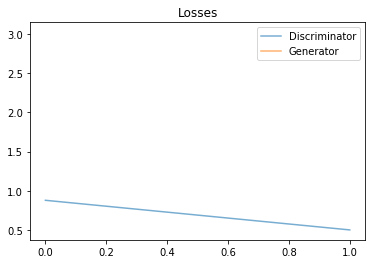

124 [D loss: 1.160717487335205 | D Accuracy: 39.0625] [G loss: 3.089205503463745]


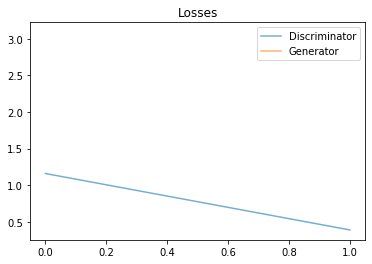

125 [D loss: 0.6910207867622375 | D Accuracy: 60.9375] [G loss: 1.9157707691192627]


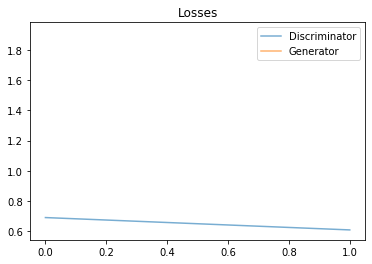

126 [D loss: 0.6001521348953247 | D Accuracy: 75.0] [G loss: 2.5056211948394775]


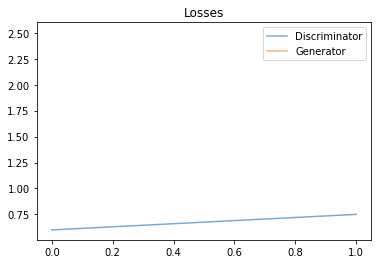

127 [D loss: 0.7983985543251038 | D Accuracy: 50.0] [G loss: 2.5234293937683105]


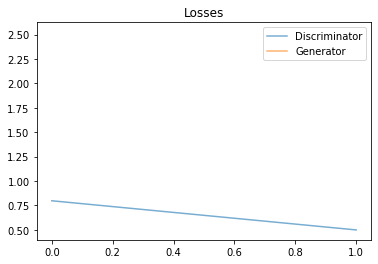

128 [D loss: 0.7150012254714966 | D Accuracy: 60.9375] [G loss: 2.28326416015625]


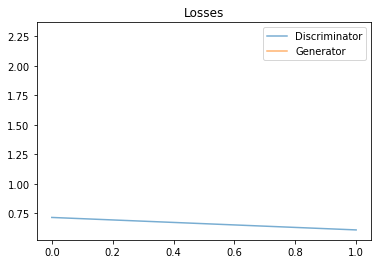

129 [D loss: 0.6929129362106323 | D Accuracy: 65.625] [G loss: 2.0054779052734375]


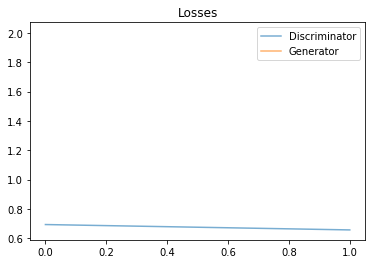

130 [D loss: 0.3682512938976288 | D Accuracy: 85.9375] [G loss: 2.337531328201294]


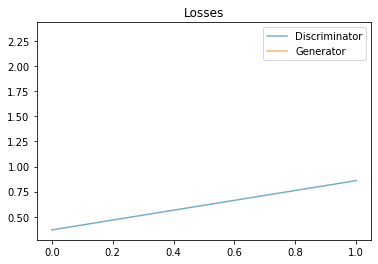

131 [D loss: 0.7713144421577454 | D Accuracy: 62.5] [G loss: 3.0417866706848145]


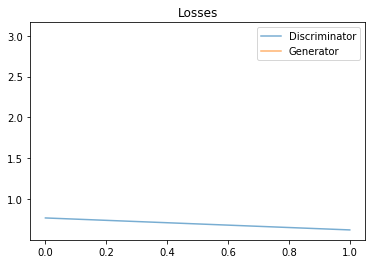

132 [D loss: 0.49880754947662354 | D Accuracy: 71.875] [G loss: 3.2325096130371094]


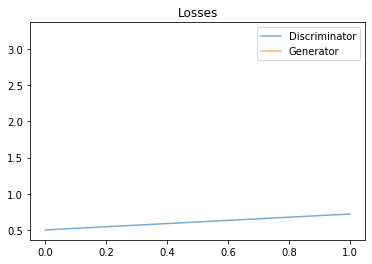

133 [D loss: 1.0144107341766357 | D Accuracy: 56.25] [G loss: 2.6754531860351562]


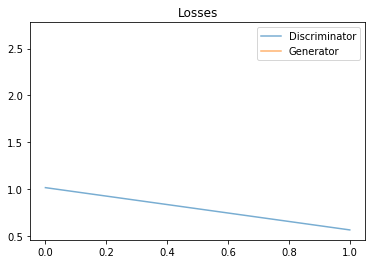

134 [D loss: 0.7027440667152405 | D Accuracy: 62.5] [G loss: 2.3366541862487793]


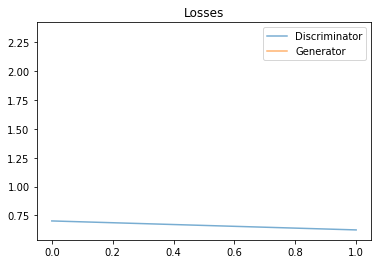

135 [D loss: 0.5604758262634277 | D Accuracy: 75.0] [G loss: 2.730461359024048]


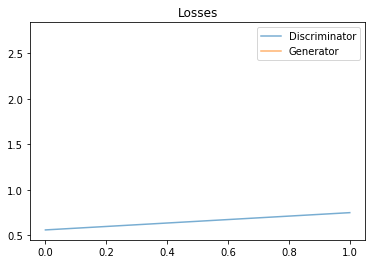

136 [D loss: 0.3827637732028961 | D Accuracy: 84.375] [G loss: 2.2959353923797607]


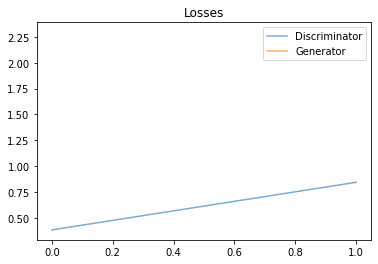

137 [D loss: 0.35004541277885437 | D Accuracy: 82.8125] [G loss: 2.549480438232422]


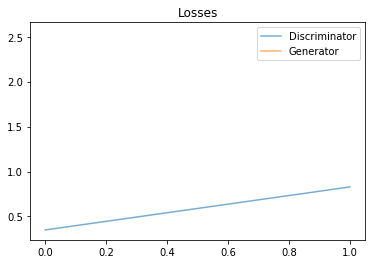

138 [D loss: 0.4342074394226074 | D Accuracy: 84.375] [G loss: 2.4604766368865967]


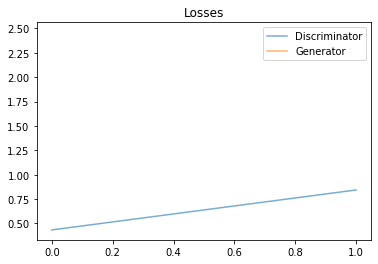

139 [D loss: 0.6860398650169373 | D Accuracy: 62.5] [G loss: 1.7044763565063477]


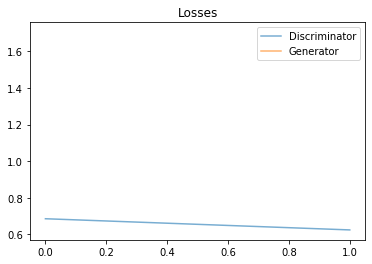

140 [D loss: 0.6140066385269165 | D Accuracy: 70.3125] [G loss: 3.478241443634033]


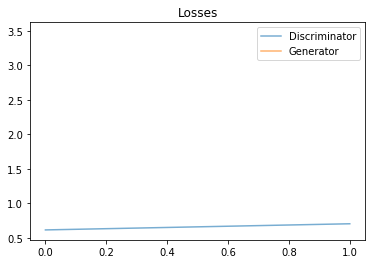

141 [D loss: 0.6934125423431396 | D Accuracy: 64.0625] [G loss: 2.3847594261169434]


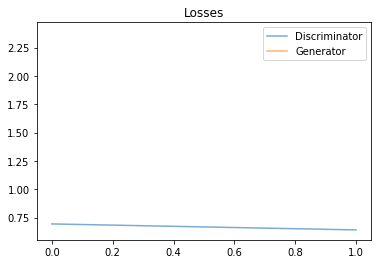

142 [D loss: 0.3665711283683777 | D Accuracy: 82.8125] [G loss: 2.210472345352173]


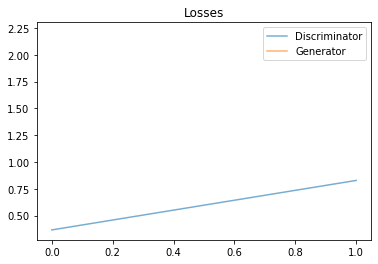

143 [D loss: 0.7243008017539978 | D Accuracy: 54.6875] [G loss: 2.5349340438842773]


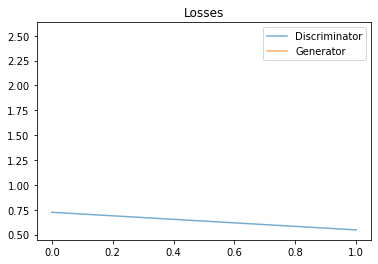

144 [D loss: 0.7798758745193481 | D Accuracy: 56.25] [G loss: 1.686314582824707]


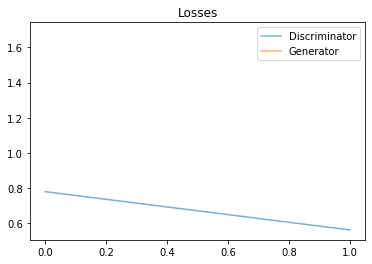

145 [D loss: 0.7324390411376953 | D Accuracy: 71.875] [G loss: 1.8589086532592773]


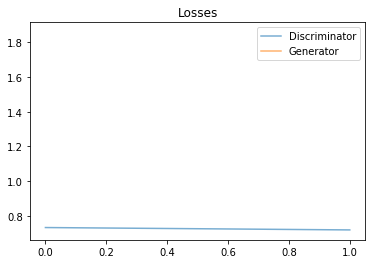

146 [D loss: 0.9914132356643677 | D Accuracy: 45.3125] [G loss: 3.1387786865234375]


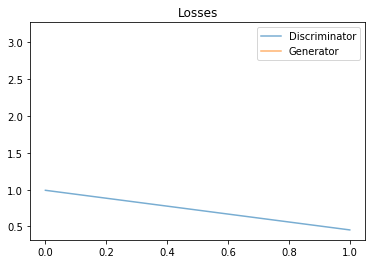

147 [D loss: 0.8266732692718506 | D Accuracy: 50.0] [G loss: 1.595438838005066]


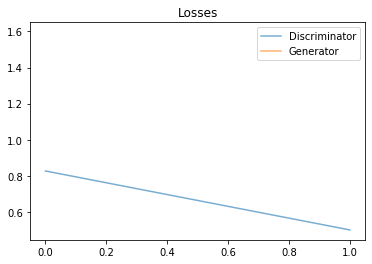

148 [D loss: 1.1182492971420288 | D Accuracy: 42.1875] [G loss: 2.7056517601013184]


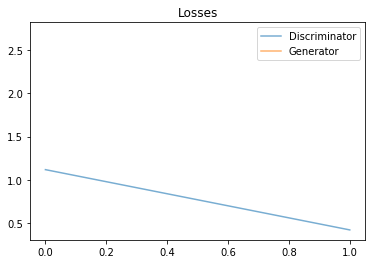

149 [D loss: 1.0968430042266846 | D Accuracy: 46.875] [G loss: 3.2670199871063232]


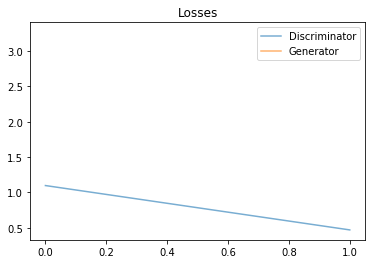

150 [D loss: 0.9049645662307739 | D Accuracy: 48.4375] [G loss: 2.808917999267578]


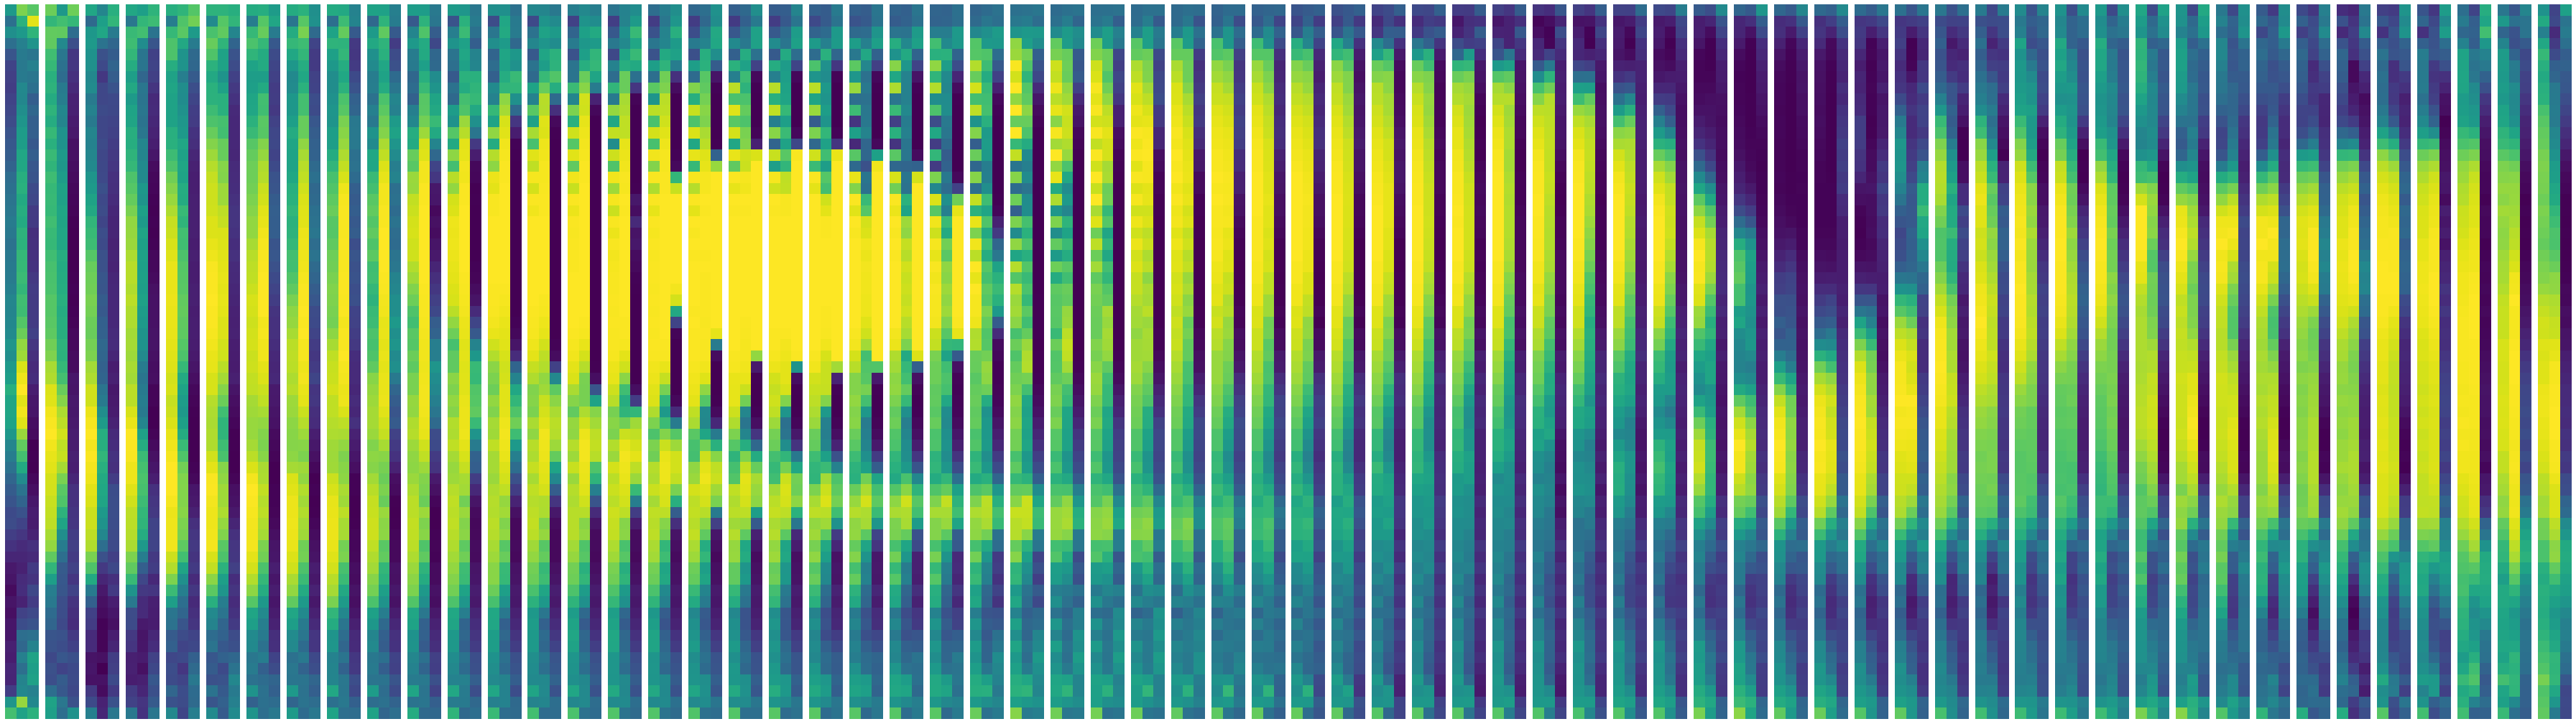

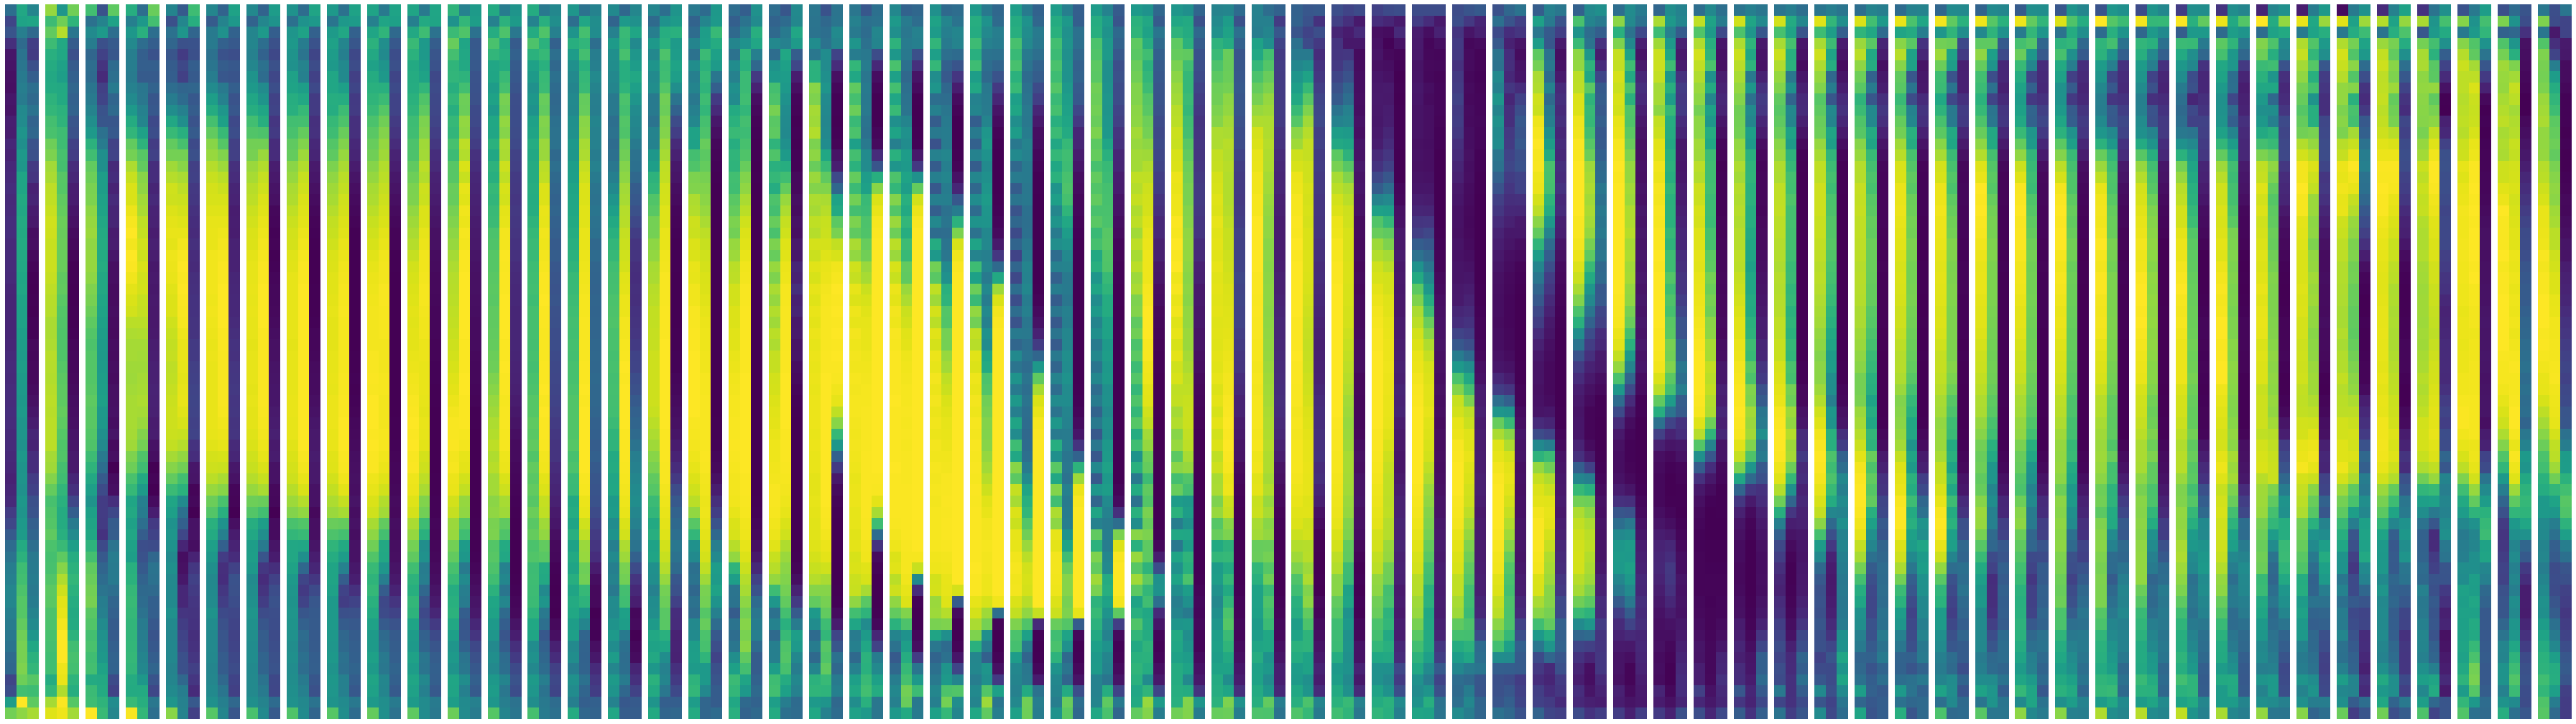

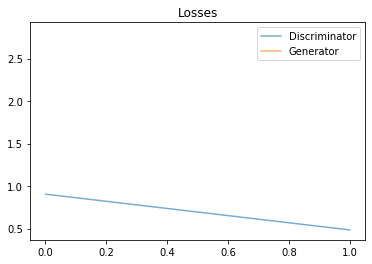

151 [D loss: 1.1091370582580566 | D Accuracy: 40.625] [G loss: 2.9005327224731445]


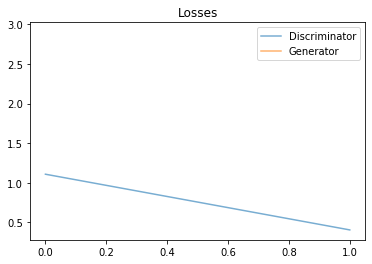

152 [D loss: 0.8177733421325684 | D Accuracy: 46.875] [G loss: 2.535452365875244]


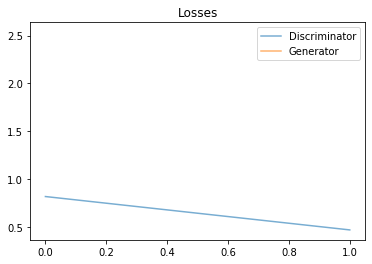

153 [D loss: 0.79213547706604 | D Accuracy: 60.9375] [G loss: 2.4589452743530273]


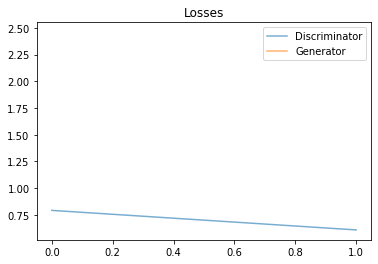

154 [D loss: 0.84548419713974 | D Accuracy: 56.25] [G loss: 2.704425573348999]


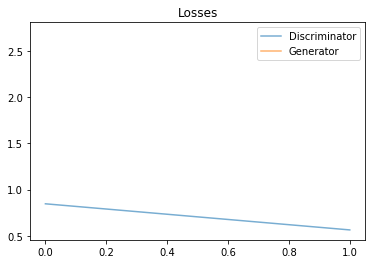

155 [D loss: 0.7411367893218994 | D Accuracy: 57.8125] [G loss: 1.9866536855697632]


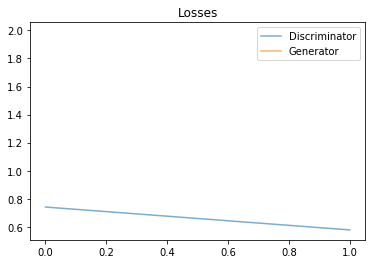

156 [D loss: 0.4586493670940399 | D Accuracy: 73.4375] [G loss: 2.478510856628418]


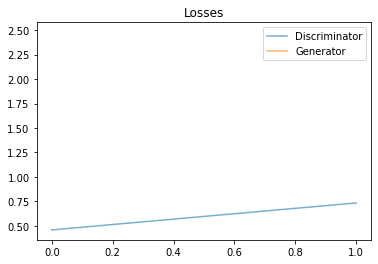

157 [D loss: 0.6531811952590942 | D Accuracy: 65.625] [G loss: 2.1244301795959473]


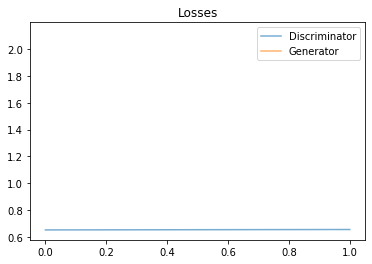

158 [D loss: 0.645256519317627 | D Accuracy: 60.9375] [G loss: 1.9166958332061768]


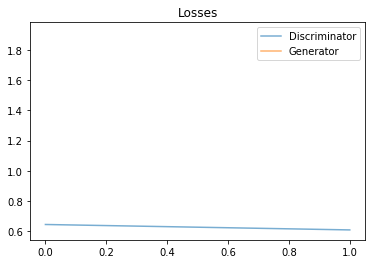

159 [D loss: 0.7334756851196289 | D Accuracy: 54.6875] [G loss: 1.9877798557281494]


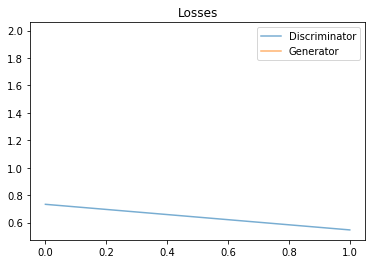

160 [D loss: 0.9319847822189331 | D Accuracy: 54.6875] [G loss: 2.3672704696655273]


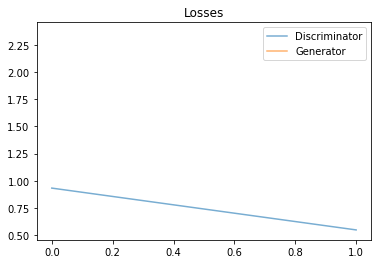

161 [D loss: 0.6815787553787231 | D Accuracy: 64.0625] [G loss: 2.394585609436035]


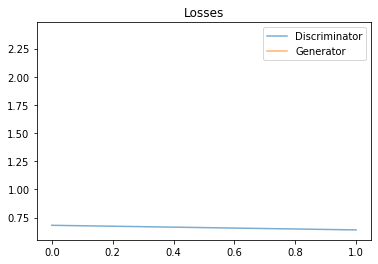

162 [D loss: 1.0156667232513428 | D Accuracy: 39.0625] [G loss: 2.6020584106445312]


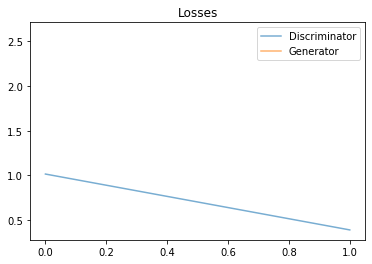

163 [D loss: 0.7222449779510498 | D Accuracy: 62.5] [G loss: 2.5817930698394775]


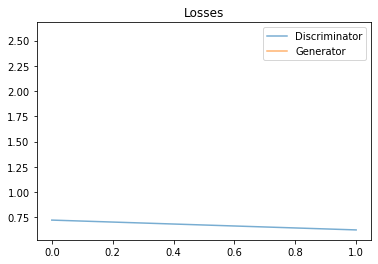

164 [D loss: 0.6438827514648438 | D Accuracy: 67.1875] [G loss: 2.2966272830963135]


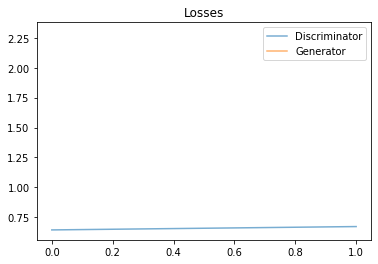

165 [D loss: 0.6398701667785645 | D Accuracy: 68.75] [G loss: 2.3688247203826904]


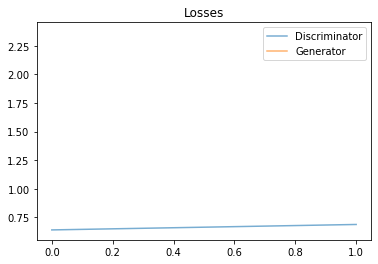

166 [D loss: 0.6897414922714233 | D Accuracy: 65.625] [G loss: 2.364156484603882]


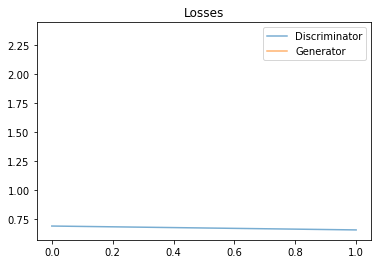

167 [D loss: 0.9254540205001831 | D Accuracy: 50.0] [G loss: 2.80800724029541]


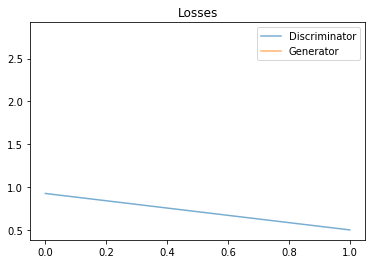

168 [D loss: 0.7377676367759705 | D Accuracy: 70.3125] [G loss: 2.188936710357666]


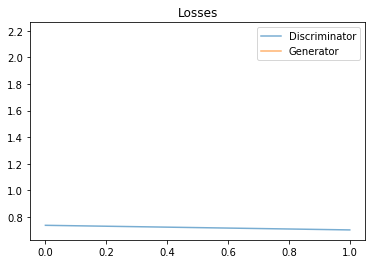

169 [D loss: 0.8356808423995972 | D Accuracy: 56.25] [G loss: 1.7942417860031128]


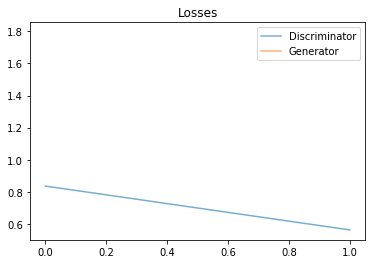

170 [D loss: 0.6800537109375 | D Accuracy: 59.375] [G loss: 2.4560904502868652]


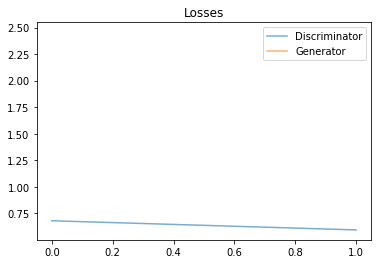

171 [D loss: 0.6536802053451538 | D Accuracy: 65.625] [G loss: 2.1486997604370117]


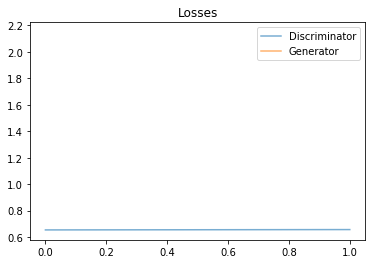

172 [D loss: 0.8090053200721741 | D Accuracy: 60.9375] [G loss: 2.26450252532959]


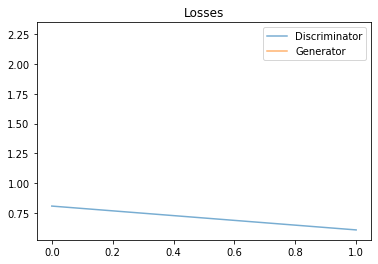

173 [D loss: 0.7208124399185181 | D Accuracy: 54.6875] [G loss: 2.0419816970825195]


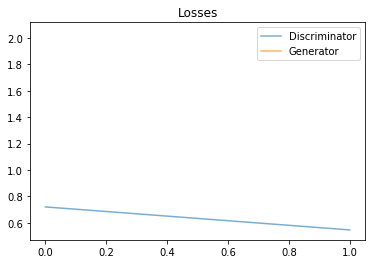

174 [D loss: 0.4838382601737976 | D Accuracy: 82.8125] [G loss: 2.091747522354126]


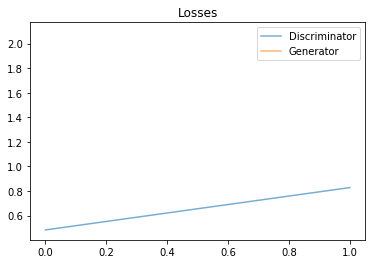

175 [D loss: 0.7289842963218689 | D Accuracy: 60.9375] [G loss: 3.1420745849609375]


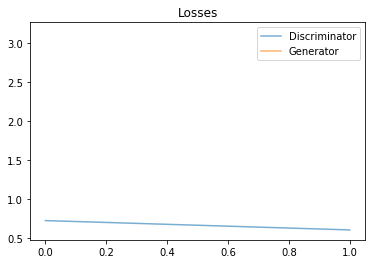

176 [D loss: 0.48870211839675903 | D Accuracy: 75.0] [G loss: 2.678764820098877]


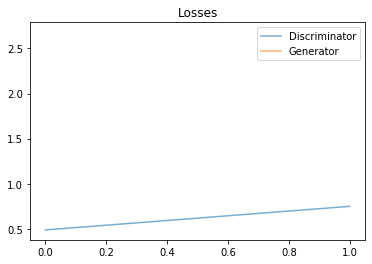

177 [D loss: 0.7056503295898438 | D Accuracy: 65.625] [G loss: 2.4328019618988037]


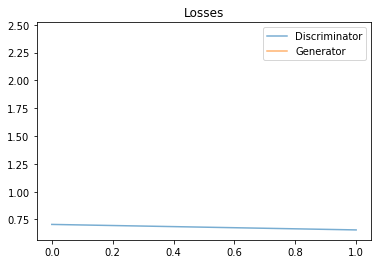

178 [D loss: 0.638887345790863 | D Accuracy: 70.3125] [G loss: 2.4165098667144775]


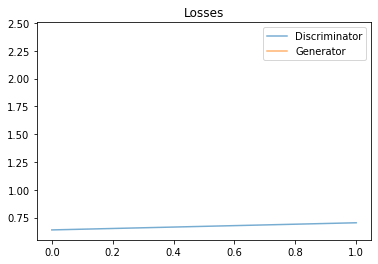

179 [D loss: 0.4384484589099884 | D Accuracy: 75.0] [G loss: 2.8046398162841797]


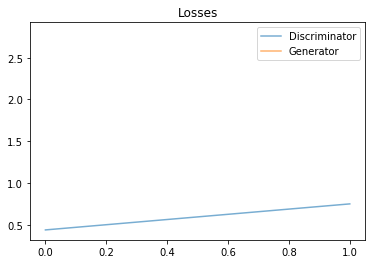

180 [D loss: 0.4954766631126404 | D Accuracy: 73.4375] [G loss: 2.9516491889953613]


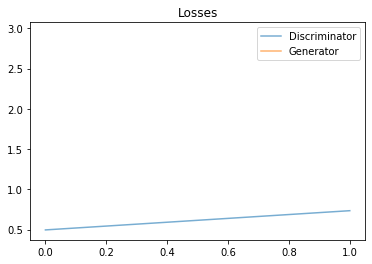

181 [D loss: 0.6530178189277649 | D Accuracy: 64.0625] [G loss: 2.380444049835205]


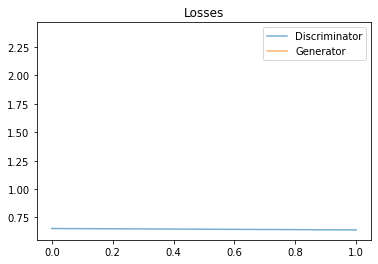

182 [D loss: 0.3638818860054016 | D Accuracy: 81.25] [G loss: 1.7009531259536743]


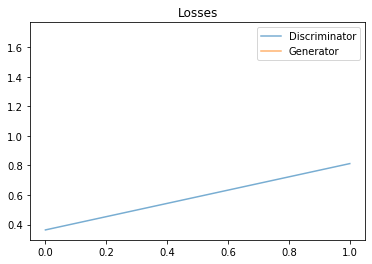

183 [D loss: 0.42136359214782715 | D Accuracy: 84.375] [G loss: 1.1916215419769287]


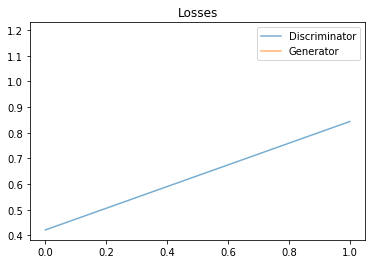

184 [D loss: 0.45471858978271484 | D Accuracy: 82.8125] [G loss: 1.6231377124786377]


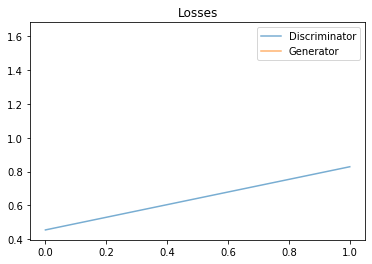

185 [D loss: 0.644393801689148 | D Accuracy: 65.625] [G loss: 1.2771565914154053]


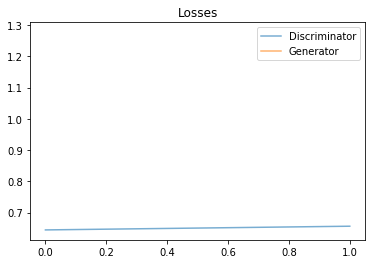

186 [D loss: 0.8561959862709045 | D Accuracy: 48.4375] [G loss: 1.3533858060836792]


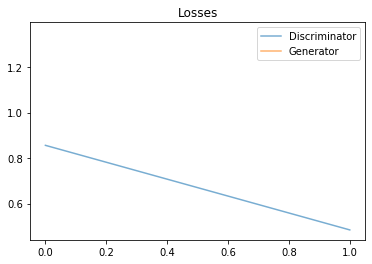

187 [D loss: 0.9670628309249878 | D Accuracy: 53.125] [G loss: 2.0837650299072266]


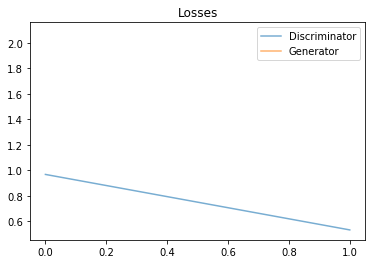

188 [D loss: 0.6115667819976807 | D Accuracy: 78.125] [G loss: 2.13969087600708]


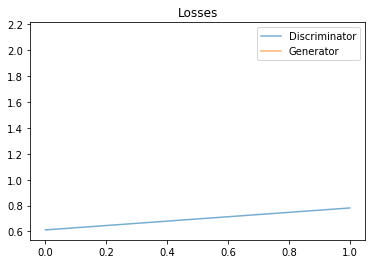

189 [D loss: 0.8559572696685791 | D Accuracy: 57.8125] [G loss: 1.8994243144989014]


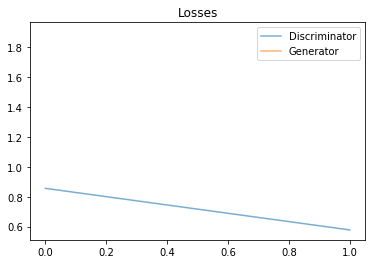

190 [D loss: 0.7641185522079468 | D Accuracy: 54.6875] [G loss: 2.11855149269104]


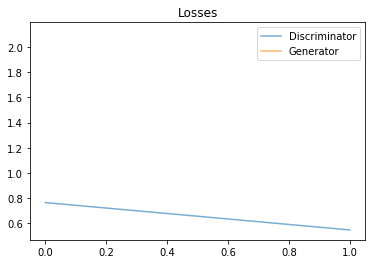

191 [D loss: 0.9051006436347961 | D Accuracy: 53.125] [G loss: 3.02083683013916]


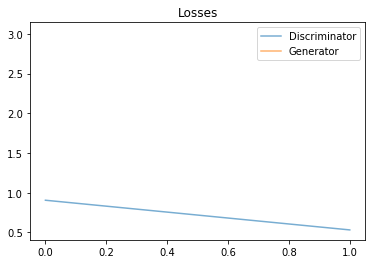

192 [D loss: 0.7589859962463379 | D Accuracy: 59.375] [G loss: 2.1917357444763184]


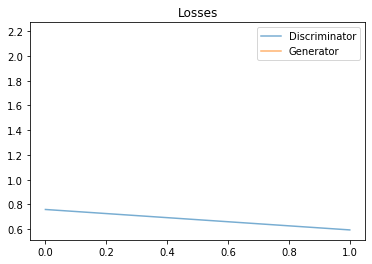

193 [D loss: 0.5916227102279663 | D Accuracy: 70.3125] [G loss: 1.6705317497253418]


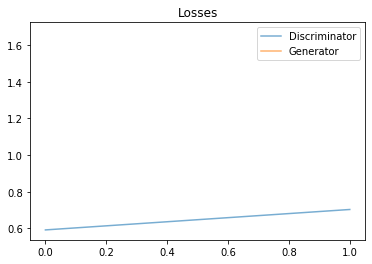

194 [D loss: 0.7121423482894897 | D Accuracy: 59.375] [G loss: 2.238450050354004]


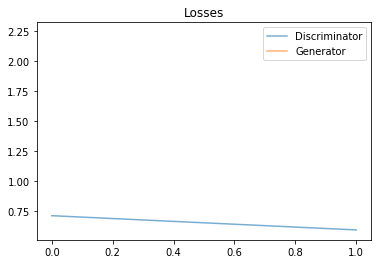

195 [D loss: 0.8710227012634277 | D Accuracy: 60.9375] [G loss: 1.7931246757507324]


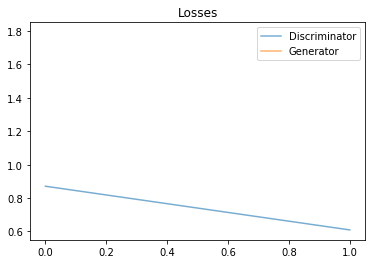

196 [D loss: 0.6796273589134216 | D Accuracy: 75.0] [G loss: 2.1391704082489014]


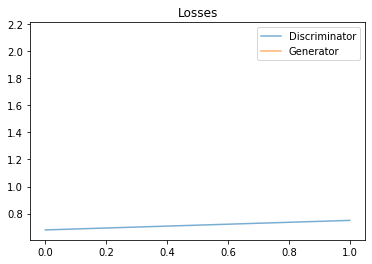

197 [D loss: 0.8757984638214111 | D Accuracy: 51.5625] [G loss: 2.241096019744873]


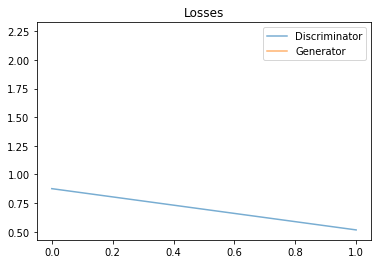

198 [D loss: 0.8530778288841248 | D Accuracy: 45.3125] [G loss: 1.4624309539794922]


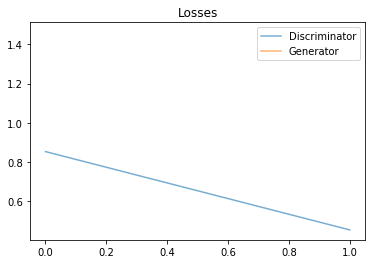

199 [D loss: 0.6320236325263977 | D Accuracy: 62.5] [G loss: 2.3086202144622803]


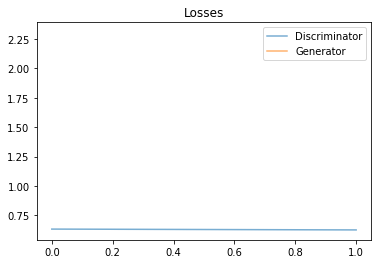

In [15]:
train(200, resized_image_path, batch_size=64 )

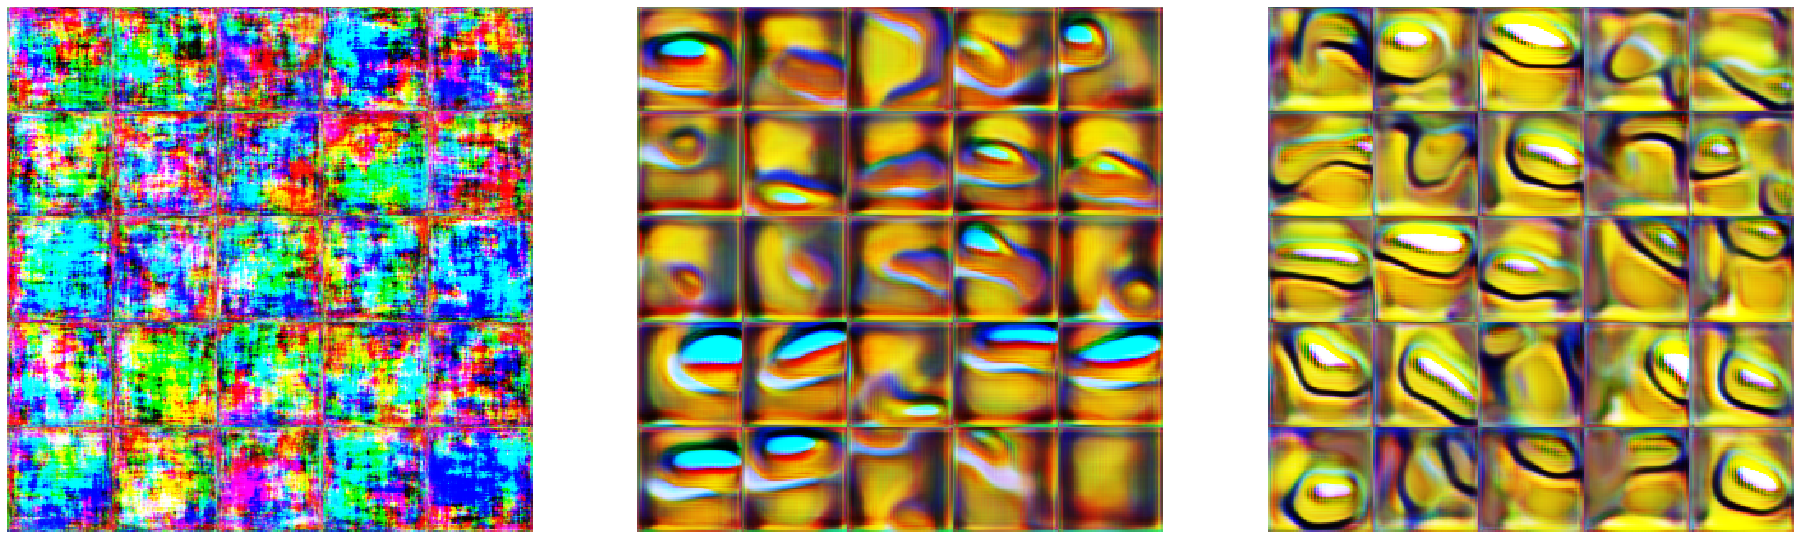

In [25]:
#   image_list = glob.glob(os.path.join('C:\\image_generator-master\\Output\\gallery_generated_64x64', '*.png'))
image_list = load_imgs('C:\\image_generator-master\\Output\\gallery_generated_64x64')
figure, axes = plt.subplots(1, len(image_list), figsize = [32,32])
for index, axis in enumerate(axes):
    axis.axis('off')
    image_array = image_list[index]
    axis.imshow(image_array)
    image = Image.fromarray(image_array)
plt.show()
plt.close()        

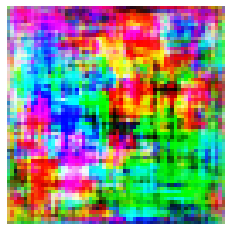

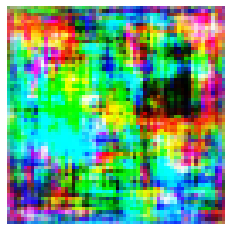

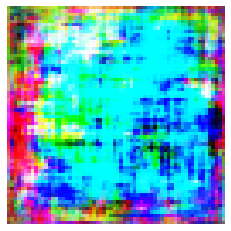

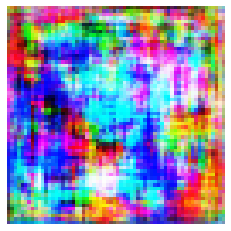

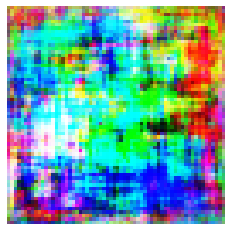

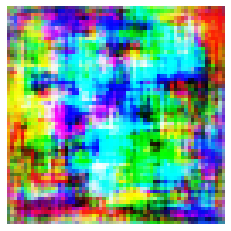

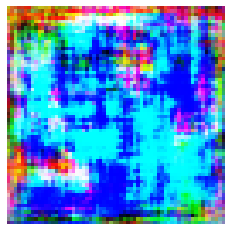

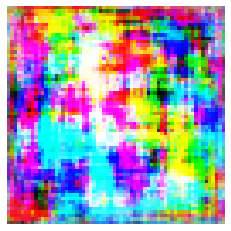

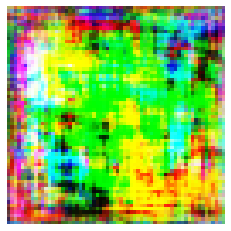

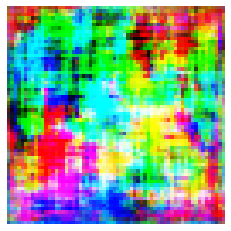

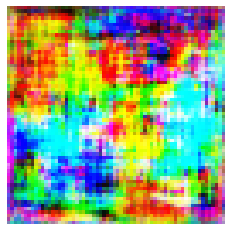

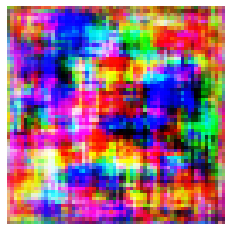

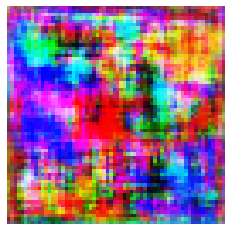

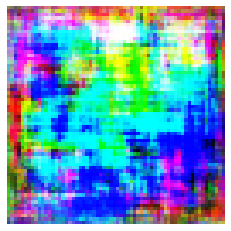

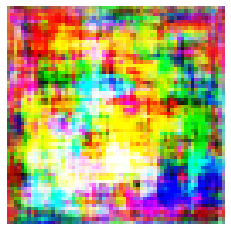

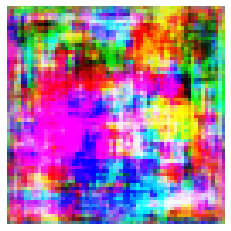

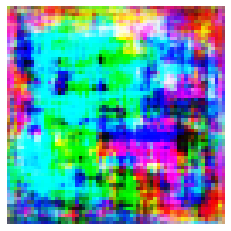

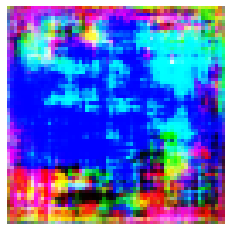

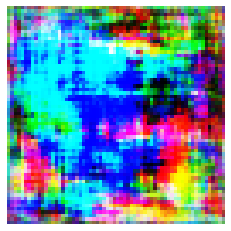

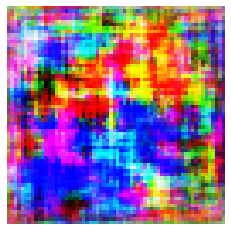

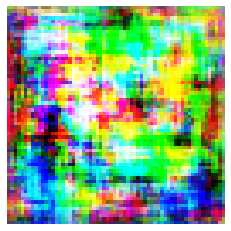

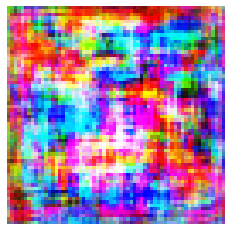

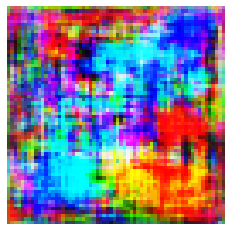

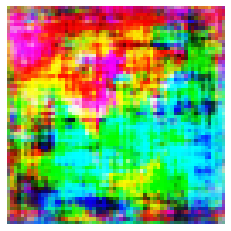

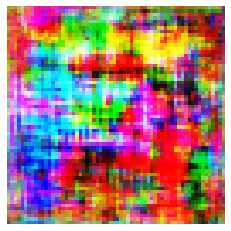

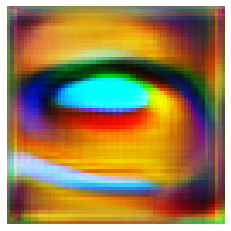

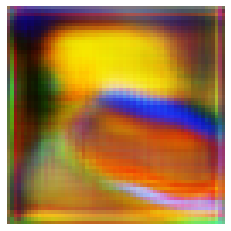

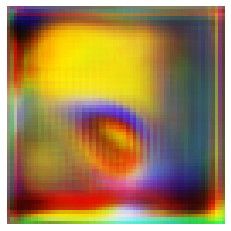

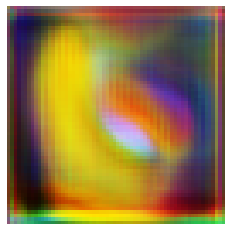

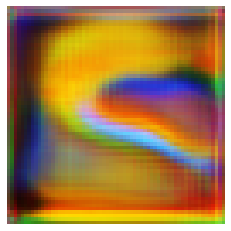

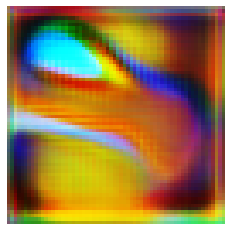

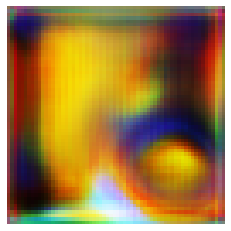

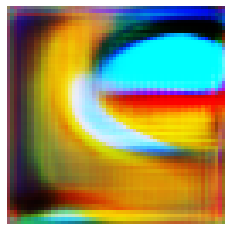

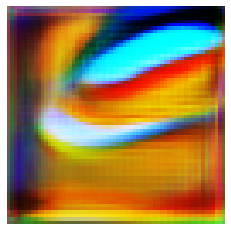

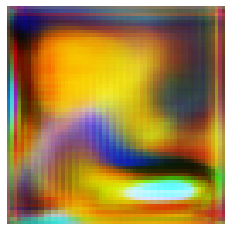

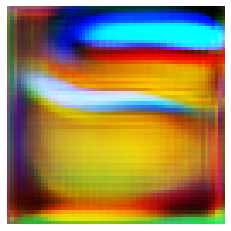

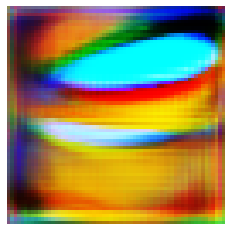

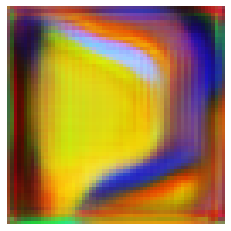

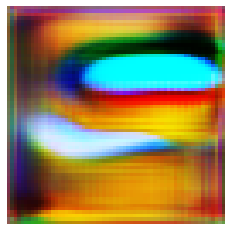

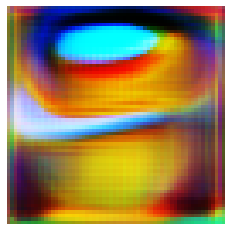

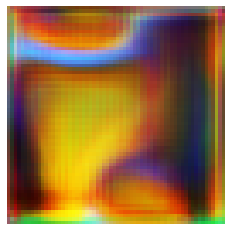

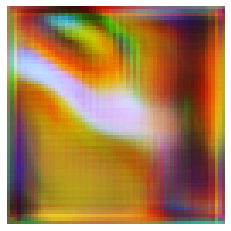

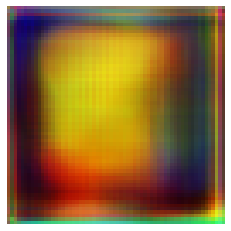

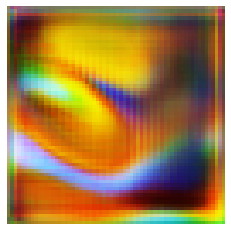

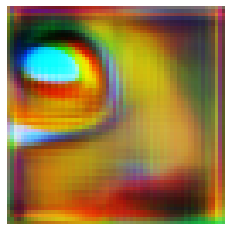

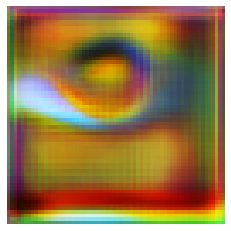

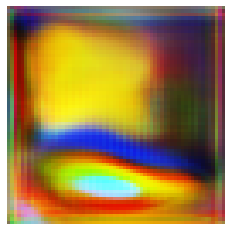

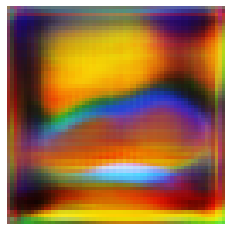

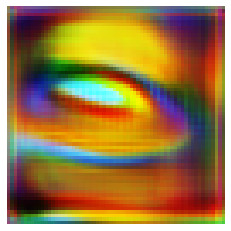

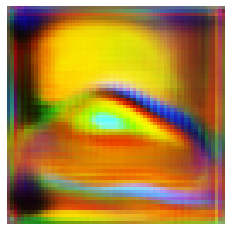

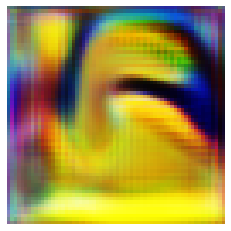

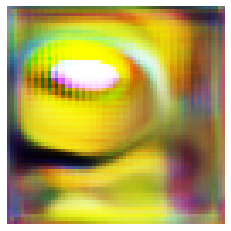

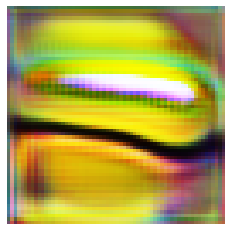

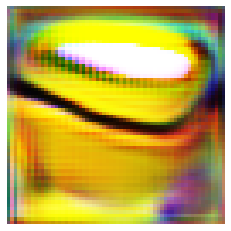

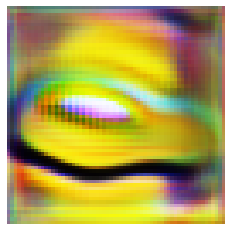

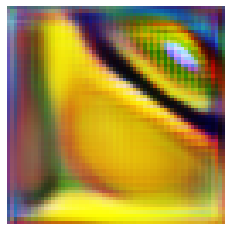

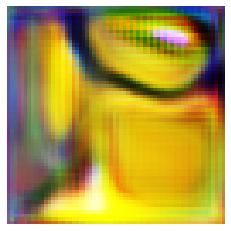

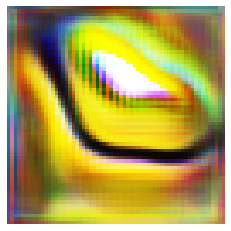

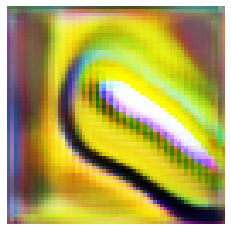

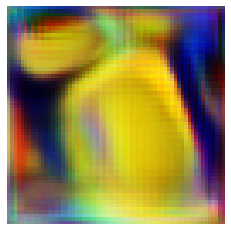

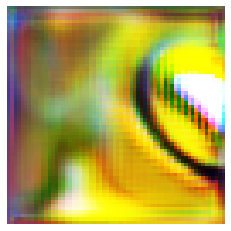

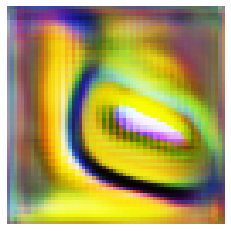

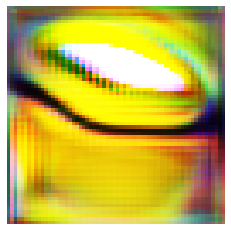

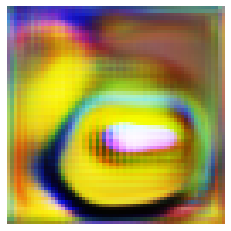

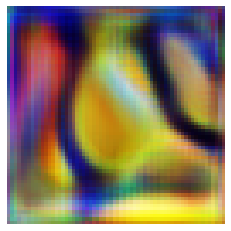

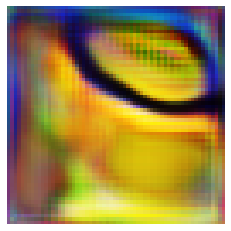

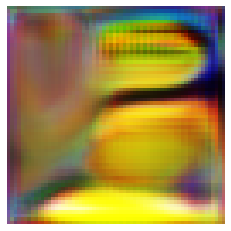

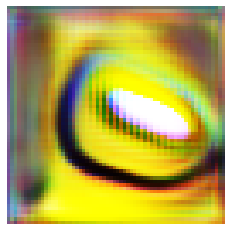

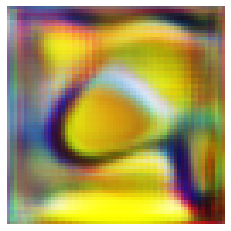

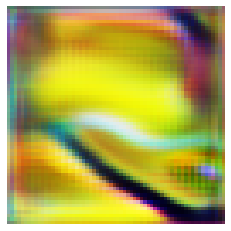

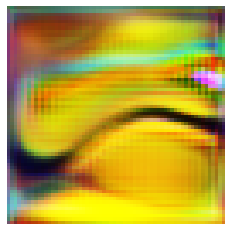

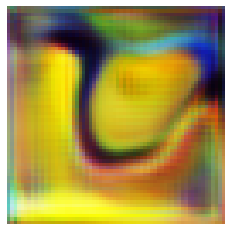

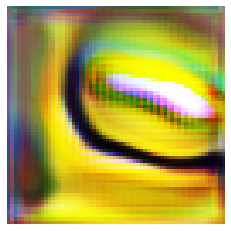

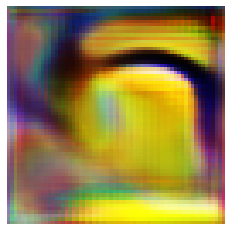

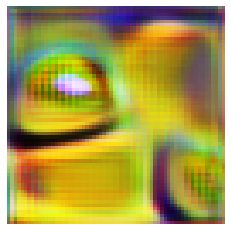

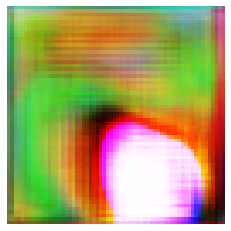

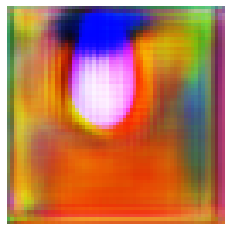

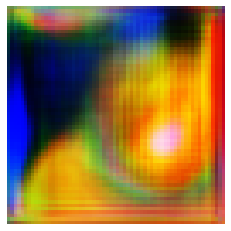

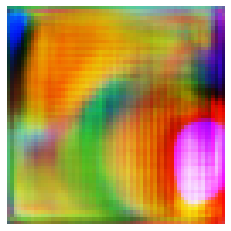

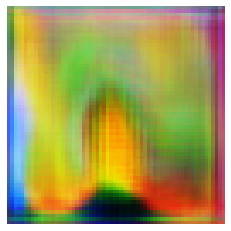

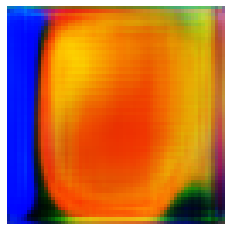

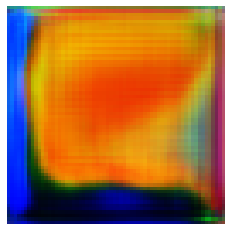

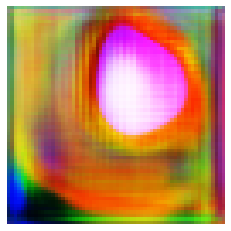

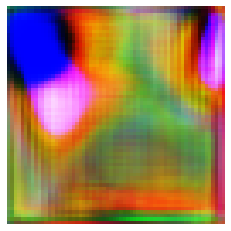

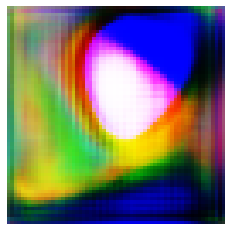

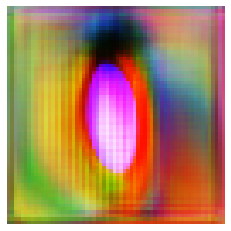

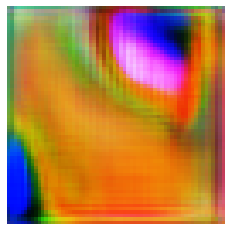

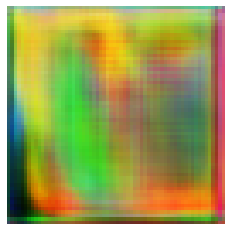

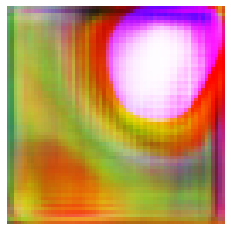

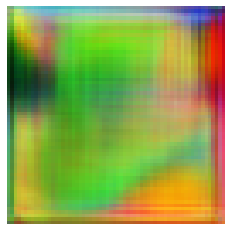

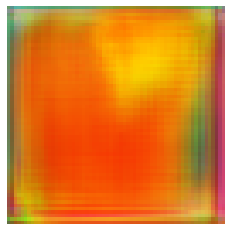

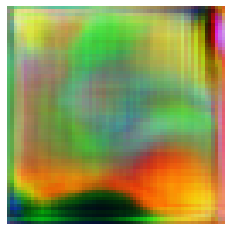

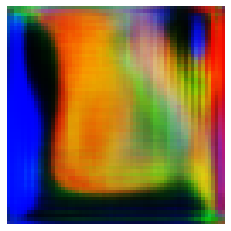

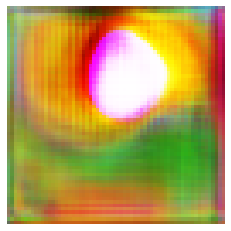

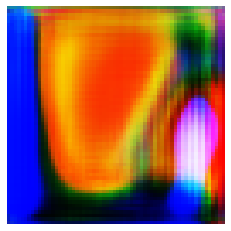

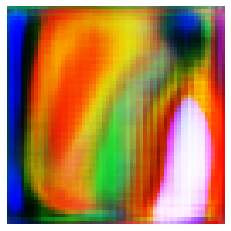

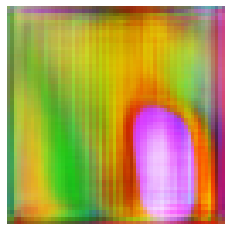

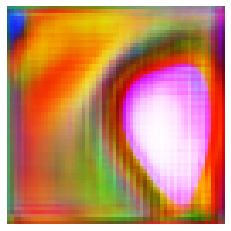

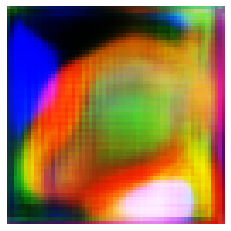

In [23]:
image_list = load_imgs('C:\\image_generator-master\\Output\\generated_64x64')
for img in image_list:
    plt.figure()
    plt.imshow(img)
    plt.axis('off')
    plt.show() 